<div>
<img style="float:left; border-radius:50%" src="https://avatars2.githubusercontent.com/u/58553327?s=460&u=3276252f07fb379c248bc8c9ce344bfdcaed7c45&v=4" width="40px">
<a href="https://github.com/carlosholivan"><img src="https://www.sferalabs.cc/wp-content/uploads/github-logo.png" width=70px style="float: right;"></a>
</div>

<a name="top"></a>

# CNN VAE <a name="top"></a>

In this notebook it is described how to compute different time-frequency inputs with <strong>compute_input_from_audiopath</strong> function.

Author: Carlos Hernández Oliván<br>
Last update: 7 November 2020
  

### Table of Contents <a name="index"></a>
 
0. [Check GPU and Troch versions](#checks)

1. [Preprocessing data](#preprocess)

2. [Create Dataloader](#dataloader)

3. [VAE Model](#model)

4. [Run Training](#training)

5. [Visualizining Latent Spaces](#visualizing)

    5.1. [2 Latent dimensions](#2d)

    5.2. [3 latent dimensions](#3d)
    
    5.3. [Animations](#animations)

6. [Reconstruction](#reconstruction)
    
[References](#references)

In [1]:
import glob
import csv
import sys, os.path

import sklearn
import torch
from torch import optim, nn
from torch.utils.data import DataLoader
from torchvision import transforms
#from torch.utils.tensorboard import SummaryWriter
#from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Our modules
import sys
sys.path.append('.')
sys.path.append('..')

from vae import configs, train, plot_utils, models
from vae.data import build_dataloader
from vae.latent_spaces import dimensionality_reduction, plot_spaces
from vae.reconstructions import plot_reconstructions
from vae.models import model_utils
from vae.train import training

## 0. Check GPU and Troch versions<a name="checks"></a>

In [3]:
torch.__version__

'0.4.1.post2'

In [4]:
!lspci | grep -i nvidia

01:00.0 VGA compatible controller: NVIDIA Corporation GM200 [GeForce GTX 980 Ti] (rev a1)
01:00.1 Audio device: NVIDIA Corporation GM200 High Definition Audio (rev a1)


!sudo apt install nvidia-cuda-toolkit

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
!nvidia-smi

Wed Apr 14 11:52:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 980 Ti  Off  | 00000000:01:00.0 Off |                  N/A |
| 45%   68C    P0    92W / 250W |     48MiB /  6080MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

## 4. RUN TRAINING <a name="training"></a>

In [8]:
tensorboard = False
if tensorboard:
    # Load the TensorBoard notebook extension
    %load_ext tensorboard
    %tensorboard --logdir ../runs

Building dataloaders...
Dataloaders have been built.
Number of files in the training dataset: 11630
Number of files in the validation dataset: 1357


  0%|          | 0/727 [00:00<?, ?it/s]

Start training model on cuda ...
Epoch: 0


100%|██████████| 727/727 [00:09<00:00, 79.46it/s]

training_avg_loss=16729.18
 training_avg_kld1=373663.57
 training_avg_kld2=373663.57
 training_avg_rec=15930.31



val_avg_loss=5703.15



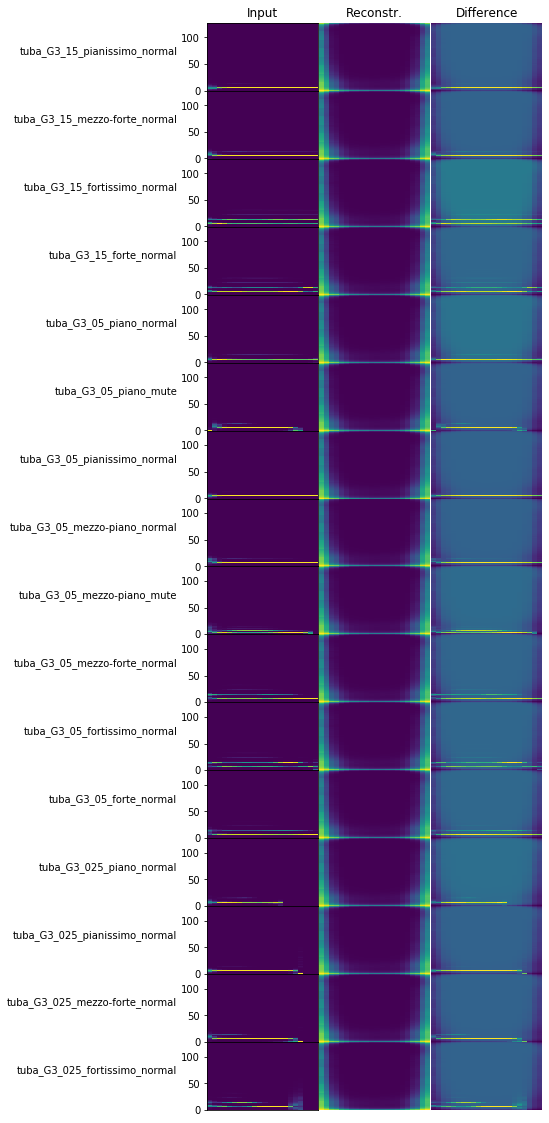

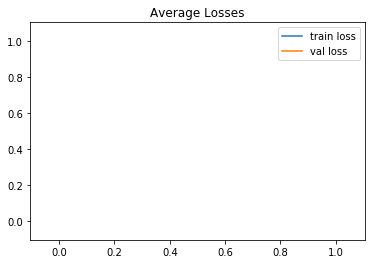

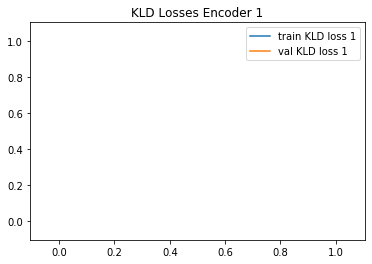

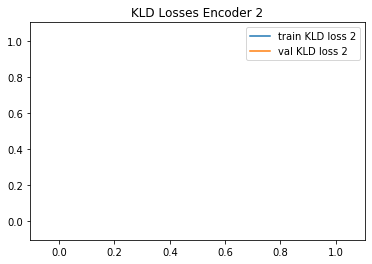

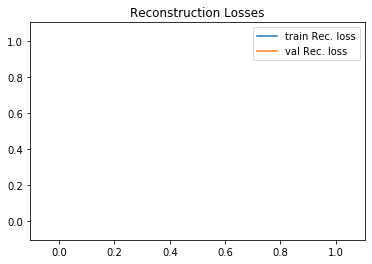

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 1


100%|██████████| 727/727 [00:09<00:00, 76.34it/s]


training_avg_loss=5073.89
 training_avg_kld1=232431.67
 training_avg_kld2=232431.67
 training_avg_rec=4753.81



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4393.97

Epoch: 2


100%|██████████| 727/727 [00:09<00:00, 74.91it/s]


training_avg_loss=4184.02
 training_avg_kld1=180510.03
 training_avg_kld2=180510.03
 training_avg_rec=3967.77



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3789.06

Epoch: 3


100%|██████████| 727/727 [00:09<00:00, 75.31it/s]


training_avg_loss=3786.16
 training_avg_kld1=156430.91
 training_avg_kld2=156430.91
 training_avg_rec=3608.10



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3534.43

Epoch: 4


100%|██████████| 727/727 [00:09<00:00, 75.27it/s]


training_avg_loss=3583.78
 training_avg_kld1=141880.00
 training_avg_kld2=141880.00
 training_avg_rec=3429.98



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3350.24

Epoch: 5


100%|██████████| 727/727 [00:09<00:00, 74.53it/s]

training_avg_loss=3421.62
 training_avg_kld1=149774.84
 training_avg_kld2=149774.84
 training_avg_rec=3267.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3226.41

Epoch: 6


100%|██████████| 727/727 [00:09<00:00, 75.08it/s]


training_avg_loss=3304.54
 training_avg_kld1=148928.68
 training_avg_kld2=148928.68
 training_avg_rec=3150.96



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3149.12

Epoch: 7


100%|██████████| 727/727 [00:09<00:00, 74.83it/s]


training_avg_loss=3225.45
 training_avg_kld1=139541.73
 training_avg_kld2=139541.73
 training_avg_rec=3076.68



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3075.26

Epoch: 8


100%|██████████| 727/727 [00:09<00:00, 74.81it/s]


training_avg_loss=3152.17
 training_avg_kld1=128663.73
 training_avg_kld2=128663.73
 training_avg_rec=3006.38



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3034.30

Epoch: 9


100%|██████████| 727/727 [00:09<00:00, 74.76it/s]


training_avg_loss=3097.04
 training_avg_kld1=122875.85
 training_avg_kld2=122875.85
 training_avg_rec=2954.90



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2988.78

Epoch: 10


100%|██████████| 727/727 [00:09<00:00, 74.96it/s]

training_avg_loss=3054.29
 training_avg_kld1=118053.18
 training_avg_kld2=118053.18
 training_avg_rec=2917.41



val_avg_loss=2972.74



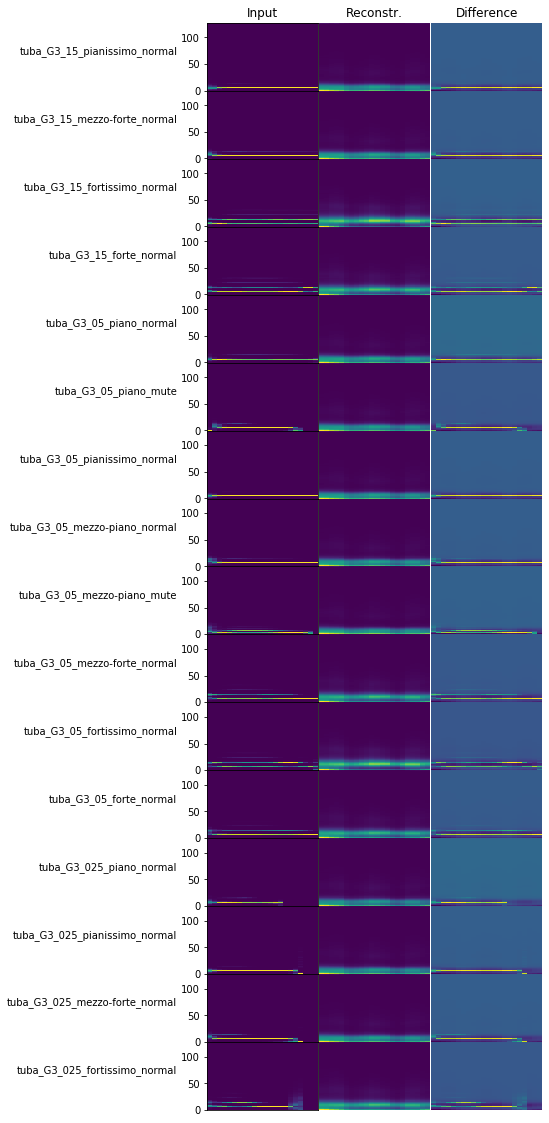

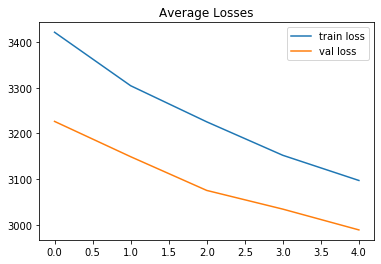

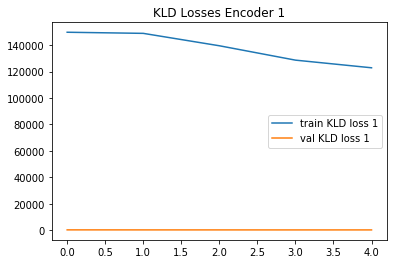

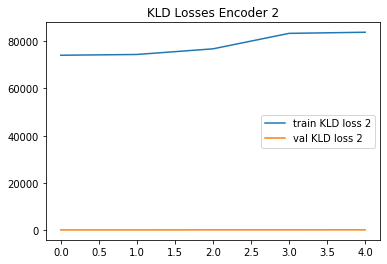

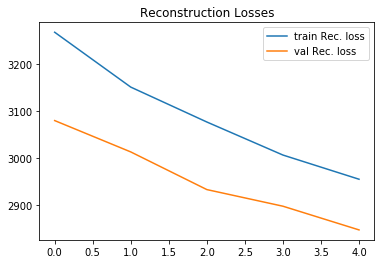

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 11


100%|██████████| 727/727 [00:09<00:00, 76.22it/s]

training_avg_loss=3019.14
 training_avg_kld1=113259.83
 training_avg_kld2=113259.83
 training_avg_rec=2887.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2962.98

Epoch: 12


100%|██████████| 727/727 [00:09<00:00, 75.24it/s]


training_avg_loss=2987.01
 training_avg_kld1=107120.24
 training_avg_kld2=107120.24
 training_avg_rec=2860.46



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2941.95

Epoch: 13


100%|██████████| 727/727 [00:09<00:00, 75.40it/s]

training_avg_loss=2959.05
 training_avg_kld1=103332.78
 training_avg_kld2=103332.78
 training_avg_rec=2836.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2953.92

Epoch: 14


100%|██████████| 727/727 [00:09<00:00, 74.92it/s]

training_avg_loss=2936.34
 training_avg_kld1=99470.24
 training_avg_kld2=99470.24
 training_avg_rec=2816.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2957.75

Epoch: 15


100%|██████████| 727/727 [00:09<00:00, 75.01it/s]


training_avg_loss=2914.39
 training_avg_kld1=98119.44
 training_avg_kld2=98119.44
 training_avg_rec=2794.75



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2921.63

Epoch: 16


100%|██████████| 727/727 [00:09<00:00, 75.33it/s]

training_avg_loss=2892.49
 training_avg_kld1=97875.01
 training_avg_kld2=97875.01
 training_avg_rec=2771.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2931.78

Epoch: 17


100%|██████████| 727/727 [00:09<00:00, 75.35it/s]


training_avg_loss=2865.35
 training_avg_kld1=96132.40
 training_avg_kld2=96132.40
 training_avg_rec=2744.30



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2911.11

Epoch: 18


100%|██████████| 727/727 [00:09<00:00, 75.00it/s]

training_avg_loss=2842.71
 training_avg_kld1=97649.95
 training_avg_kld2=97649.95
 training_avg_rec=2717.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2901.98

Epoch: 19


100%|██████████| 727/727 [00:09<00:00, 75.02it/s]

training_avg_loss=2814.93
 training_avg_kld1=99071.11
 training_avg_kld2=99071.11
 training_avg_rec=2686.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2892.18

Epoch: 20


100%|██████████| 727/727 [00:09<00:00, 75.11it/s]

training_avg_loss=2790.79
 training_avg_kld1=100564.83
 training_avg_kld2=100564.83
 training_avg_rec=2659.78



val_avg_loss=2853.60



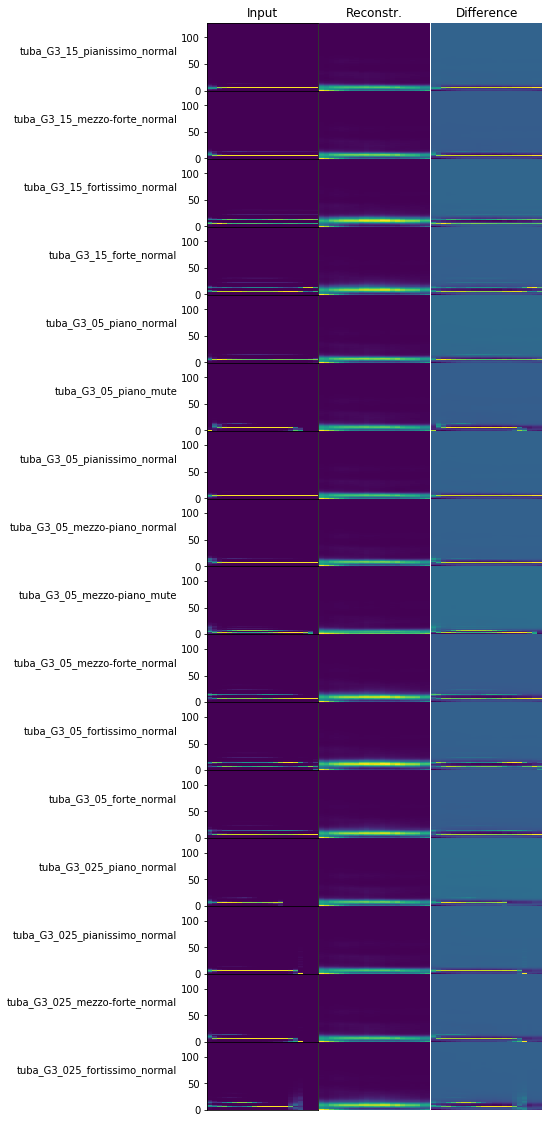

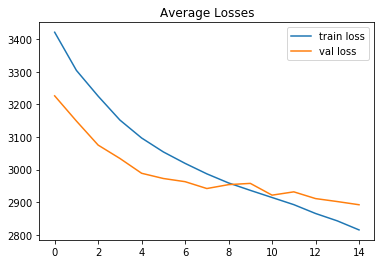

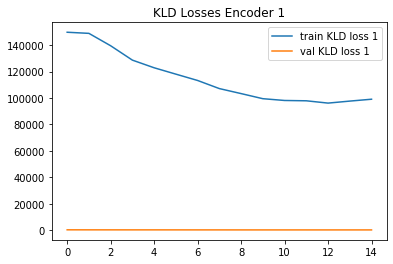

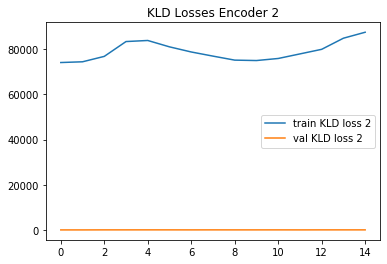

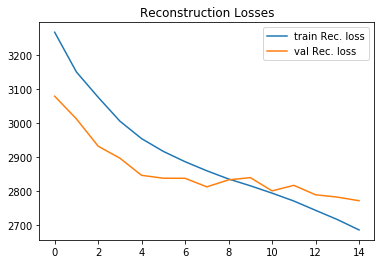

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 21


100%|██████████| 727/727 [00:09<00:00, 76.55it/s]

training_avg_loss=2769.11
 training_avg_kld1=101714.30
 training_avg_kld2=101714.30
 training_avg_rec=2635.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2818.50

Epoch: 22


100%|██████████| 727/727 [00:09<00:00, 74.85it/s]


training_avg_loss=2747.01
 training_avg_kld1=101606.23
 training_avg_kld2=101606.23
 training_avg_rec=2612.09



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2828.17

Epoch: 23


100%|██████████| 727/727 [00:09<00:00, 74.79it/s]

training_avg_loss=2726.95
 training_avg_kld1=102911.75
 training_avg_kld2=102911.75
 training_avg_rec=2589.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2797.75

Epoch: 24


100%|██████████| 727/727 [00:09<00:00, 74.98it/s]


training_avg_loss=2706.64
 training_avg_kld1=102488.63
 training_avg_kld2=102488.63
 training_avg_rec=2565.24



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2790.63

Epoch: 25


100%|██████████| 727/727 [00:09<00:00, 75.20it/s]


training_avg_loss=2680.24
 training_avg_kld1=102711.98
 training_avg_kld2=102711.98
 training_avg_rec=2535.34



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2764.37

Epoch: 26


100%|██████████| 727/727 [00:09<00:00, 75.12it/s]

training_avg_loss=2653.72
 training_avg_kld1=102423.16
 training_avg_kld2=102423.16
 training_avg_rec=2503.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2726.41

Epoch: 27


100%|██████████| 727/727 [00:09<00:00, 75.38it/s]

training_avg_loss=2625.24
 training_avg_kld1=101848.45
 training_avg_kld2=101848.45
 training_avg_rec=2472.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2693.40

Epoch: 28


100%|██████████| 727/727 [00:09<00:00, 74.75it/s]

training_avg_loss=2604.08
 training_avg_kld1=101833.15
 training_avg_kld2=101833.15
 training_avg_rec=2448.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2674.24

Epoch: 29


100%|██████████| 727/727 [00:09<00:00, 74.83it/s]


training_avg_loss=2583.86
 training_avg_kld1=101666.84
 training_avg_kld2=101666.84
 training_avg_rec=2426.70



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2657.09

Epoch: 30


100%|██████████| 727/727 [00:09<00:00, 74.68it/s]


training_avg_loss=2565.83
 training_avg_kld1=100541.14
 training_avg_kld2=100541.14
 training_avg_rec=2408.77

val_avg_loss=2623.26



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

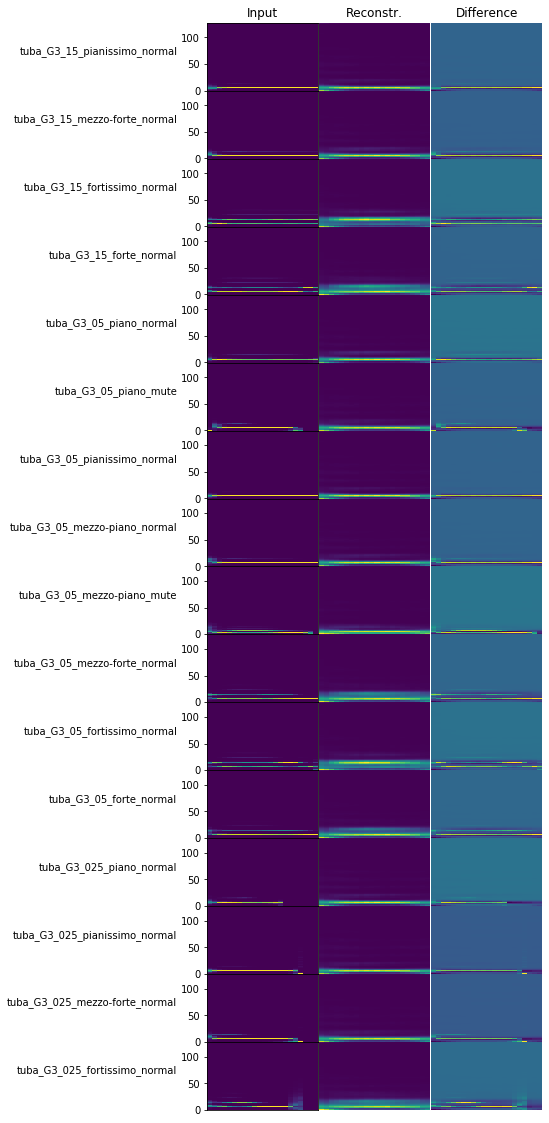

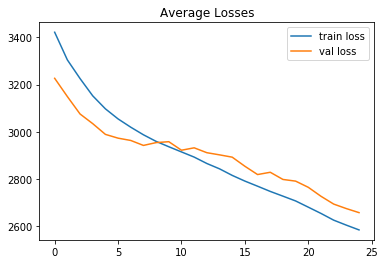

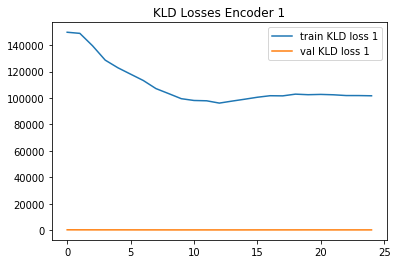

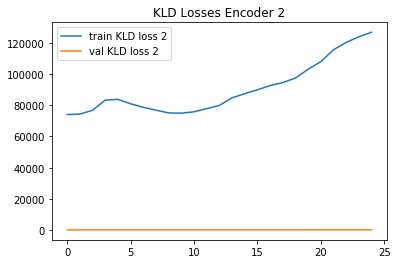

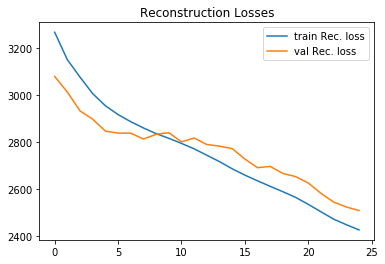

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 31


100%|██████████| 727/727 [00:09<00:00, 75.81it/s]

training_avg_loss=2552.36
 training_avg_kld1=101951.54
 training_avg_kld2=101951.54
 training_avg_rec=2392.88




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2609.95

Epoch: 32


100%|██████████| 727/727 [00:09<00:00, 74.77it/s]

training_avg_loss=2536.83
 training_avg_kld1=101479.55
 training_avg_kld2=101479.55
 training_avg_rec=2377.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2577.25

Epoch: 33


100%|██████████| 727/727 [00:09<00:00, 75.12it/s]


training_avg_loss=2522.20
 training_avg_kld1=101868.20
 training_avg_kld2=101868.20
 training_avg_rec=2362.11



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2562.30

Epoch: 34


100%|██████████| 727/727 [00:09<00:00, 74.97it/s]

training_avg_loss=2510.16
 training_avg_kld1=100885.39
 training_avg_kld2=100885.39
 training_avg_rec=2349.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2544.60

Epoch: 35


100%|██████████| 727/727 [00:09<00:00, 75.13it/s]


training_avg_loss=2498.79
 training_avg_kld1=100293.48
 training_avg_kld2=100293.48
 training_avg_rec=2337.86



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2533.44

Epoch: 36


100%|██████████| 727/727 [00:09<00:00, 75.03it/s]


training_avg_loss=2485.64
 training_avg_kld1=99564.19
 training_avg_kld2=99564.19
 training_avg_rec=2324.82



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2518.35

Epoch: 37


100%|██████████| 727/727 [00:09<00:00, 75.02it/s]


training_avg_loss=2475.23
 training_avg_kld1=99387.62
 training_avg_kld2=99387.62
 training_avg_rec=2312.27



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2516.39

Epoch: 38


100%|██████████| 727/727 [00:09<00:00, 74.76it/s]

training_avg_loss=2465.45
 training_avg_kld1=99499.78
 training_avg_kld2=99499.78
 training_avg_rec=2301.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2479.27

Epoch: 39


100%|██████████| 727/727 [00:09<00:00, 75.00it/s]

training_avg_loss=2454.73
 training_avg_kld1=99853.53
 training_avg_kld2=99853.53
 training_avg_rec=2290.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2468.77

Epoch: 40


100%|██████████| 727/727 [00:09<00:00, 74.92it/s]

training_avg_loss=2446.74
 training_avg_kld1=99722.60
 training_avg_kld2=99722.60
 training_avg_rec=2280.53



val_avg_loss=2456.94



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

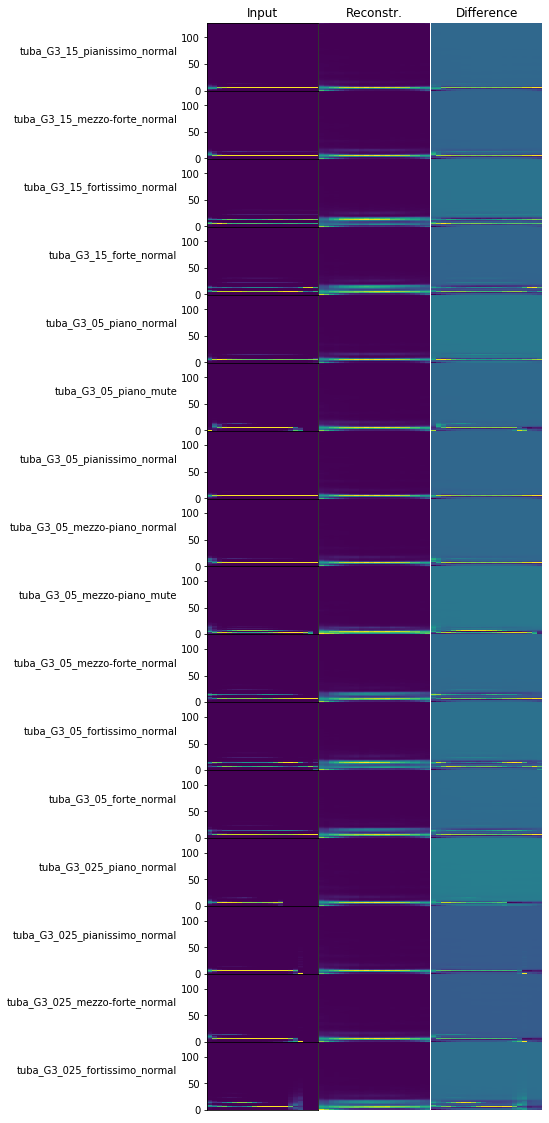

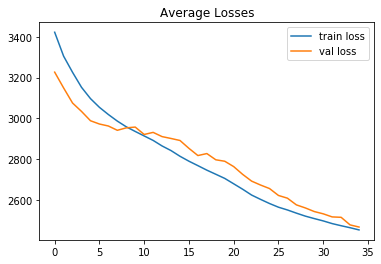

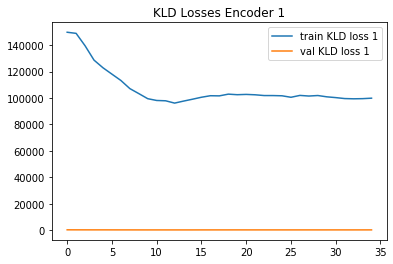

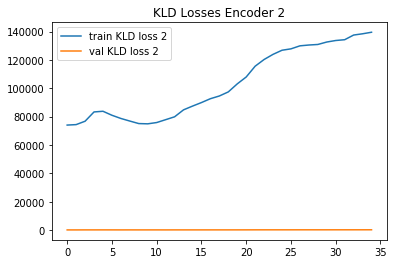

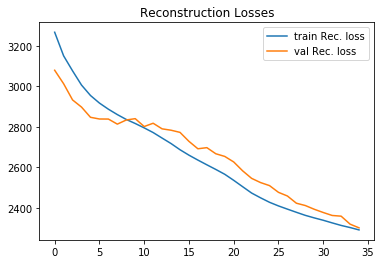

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 41


100%|██████████| 727/727 [00:09<00:00, 76.04it/s]

training_avg_loss=2437.51
 training_avg_kld1=99244.34
 training_avg_kld2=99244.34
 training_avg_rec=2272.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2452.37

Epoch: 42


100%|██████████| 727/727 [00:09<00:00, 74.98it/s]

training_avg_loss=2430.31
 training_avg_kld1=99596.75
 training_avg_kld2=99596.75
 training_avg_rec=2262.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2439.87

Epoch: 43


100%|██████████| 727/727 [00:09<00:00, 74.65it/s]

training_avg_loss=2419.54
 training_avg_kld1=98440.68
 training_avg_kld2=98440.68
 training_avg_rec=2252.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2426.32

Epoch: 44


100%|██████████| 727/727 [00:09<00:00, 75.29it/s]


training_avg_loss=2412.65
 training_avg_kld1=98408.18
 training_avg_kld2=98408.18
 training_avg_rec=2244.55



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2419.99

Epoch: 45


100%|██████████| 727/727 [00:09<00:00, 75.21it/s]

training_avg_loss=2403.95
 training_avg_kld1=97728.40
 training_avg_kld2=97728.40
 training_avg_rec=2235.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2421.91

Epoch: 46


100%|██████████| 727/727 [00:09<00:00, 74.95it/s]


training_avg_loss=2399.85
 training_avg_kld1=98103.16
 training_avg_kld2=98103.16
 training_avg_rec=2229.49



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2399.50

Epoch: 47


100%|██████████| 727/727 [00:09<00:00, 74.90it/s]

training_avg_loss=2390.84
 training_avg_kld1=97085.33
 training_avg_kld2=97085.33
 training_avg_rec=2220.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2402.78

Epoch: 48


100%|██████████| 727/727 [00:09<00:00, 75.07it/s]

training_avg_loss=2385.37
 training_avg_kld1=96278.47
 training_avg_kld2=96278.47
 training_avg_rec=2215.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2388.05

Epoch: 49


100%|██████████| 727/727 [00:09<00:00, 74.97it/s]


training_avg_loss=2376.80
 training_avg_kld1=96138.66
 training_avg_kld2=96138.66
 training_avg_rec=2206.13



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2383.95

Epoch: 50


100%|██████████| 727/727 [00:09<00:00, 74.68it/s]

training_avg_loss=2374.20
 training_avg_kld1=96375.02
 training_avg_kld2=96375.02
 training_avg_rec=2201.58



val_avg_loss=2379.62



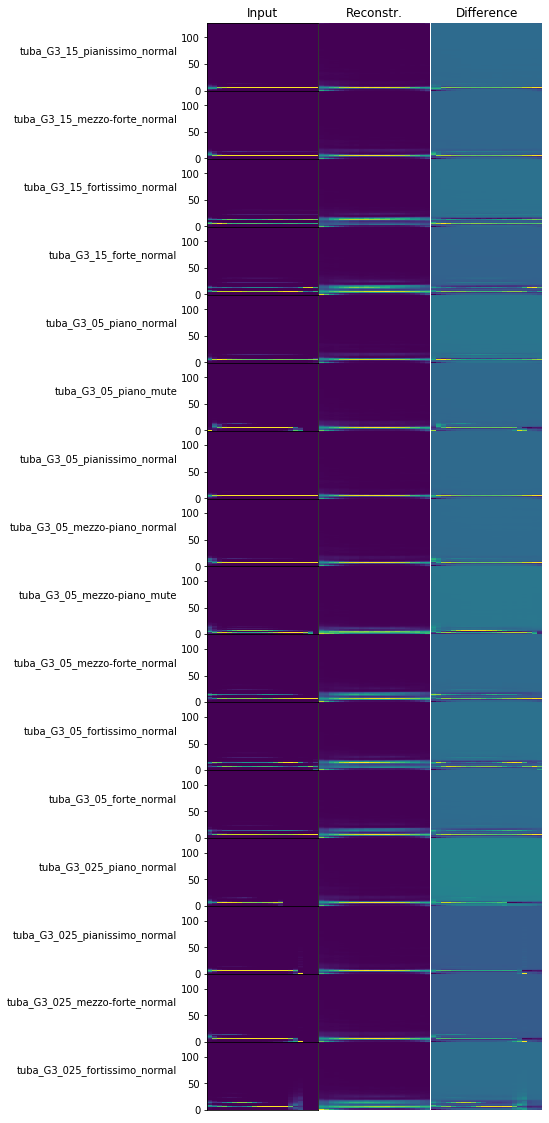

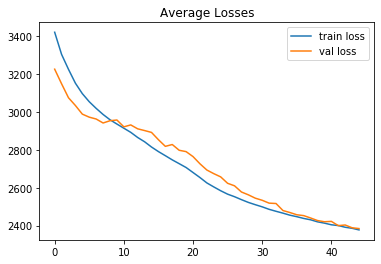

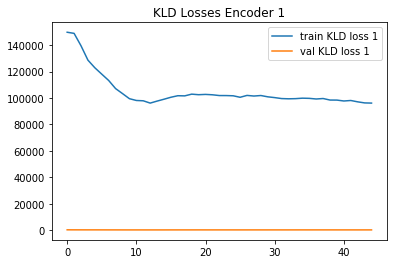

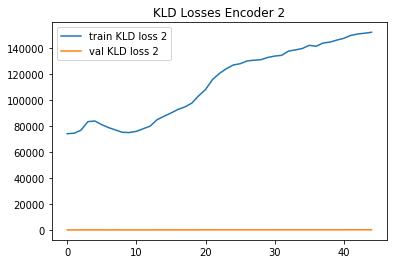

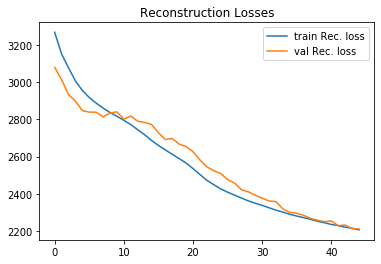

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 51


100%|██████████| 727/727 [00:09<00:00, 75.73it/s]

training_avg_loss=2366.30
 training_avg_kld1=96570.24
 training_avg_kld2=96570.24
 training_avg_rec=2193.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2374.98

Epoch: 52


100%|██████████| 727/727 [00:09<00:00, 74.69it/s]

training_avg_loss=2361.13
 training_avg_kld1=96504.93
 training_avg_kld2=96504.93
 training_avg_rec=2187.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2379.98

Epoch: 53


100%|██████████| 727/727 [00:09<00:00, 74.91it/s]


training_avg_loss=2357.32
 training_avg_kld1=96118.59
 training_avg_kld2=96118.59
 training_avg_rec=2182.92



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2366.66

Epoch: 54


100%|██████████| 727/727 [00:09<00:00, 74.91it/s]

training_avg_loss=2347.62
 training_avg_kld1=95161.41
 training_avg_kld2=95161.41
 training_avg_rec=2173.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2358.40

Epoch: 55


100%|██████████| 727/727 [00:09<00:00, 74.59it/s]


training_avg_loss=2345.01
 training_avg_kld1=95703.19
 training_avg_kld2=95703.19
 training_avg_rec=2169.41



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2351.59

Epoch: 56


100%|██████████| 727/727 [00:09<00:00, 74.74it/s]


training_avg_loss=2340.59
 training_avg_kld1=95320.96
 training_avg_kld2=95320.96
 training_avg_rec=2164.51



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2345.38

Epoch: 57


100%|██████████| 727/727 [00:09<00:00, 74.53it/s]


training_avg_loss=2335.52
 training_avg_kld1=95967.30
 training_avg_kld2=95967.30
 training_avg_rec=2157.33



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2342.22

Epoch: 58


100%|██████████| 727/727 [00:09<00:00, 74.90it/s]

training_avg_loss=2327.92
 training_avg_kld1=95724.92
 training_avg_kld2=95724.92
 training_avg_rec=2150.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2344.90

Epoch: 59


100%|██████████| 727/727 [00:09<00:00, 74.86it/s]

training_avg_loss=2323.08
 training_avg_kld1=94988.65
 training_avg_kld2=94988.65
 training_avg_rec=2145.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2336.01

Epoch: 60


100%|██████████| 727/727 [00:09<00:00, 75.03it/s]

training_avg_loss=2320.17
 training_avg_kld1=94703.65
 training_avg_kld2=94703.65
 training_avg_rec=2141.11



val_avg_loss=2333.32



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

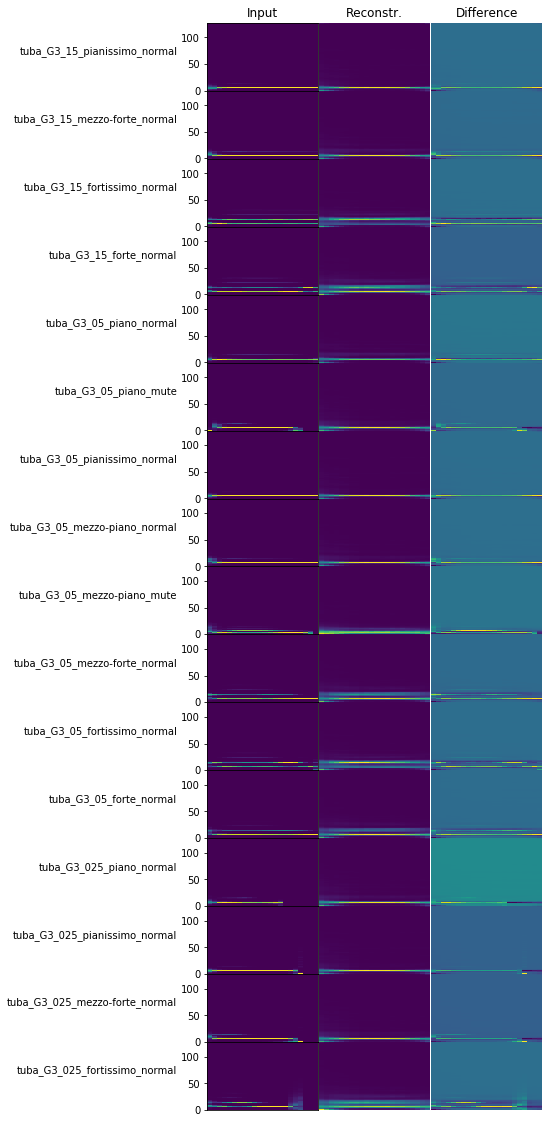

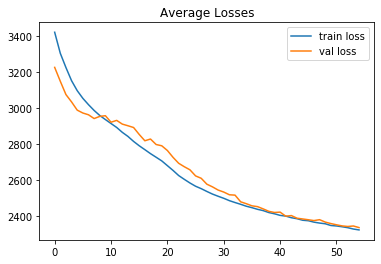

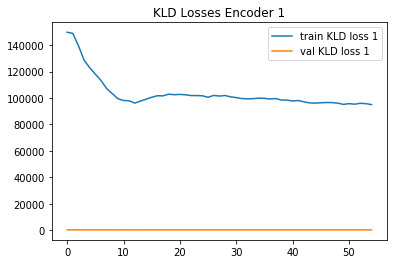

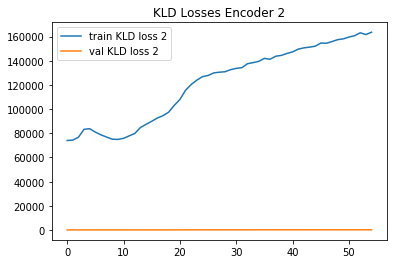

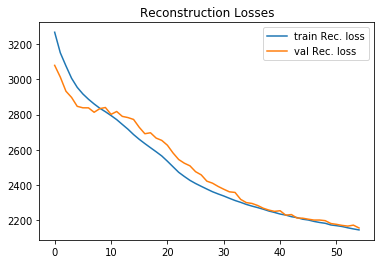

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 61


100%|██████████| 727/727 [00:09<00:00, 78.99it/s]

training_avg_loss=2312.87
 training_avg_kld1=95324.26
 training_avg_kld2=95324.26
 training_avg_rec=2133.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2319.62

Epoch: 62


100%|██████████| 727/727 [00:09<00:00, 75.04it/s]


training_avg_loss=2310.48
 training_avg_kld1=95119.81
 training_avg_kld2=95119.81
 training_avg_rec=2130.59



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2313.87

Epoch: 63


100%|██████████| 727/727 [00:09<00:00, 75.49it/s]

training_avg_loss=2308.11
 training_avg_kld1=95844.11
 training_avg_kld2=95844.11
 training_avg_rec=2125.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2311.36

Epoch: 64


100%|██████████| 727/727 [00:09<00:00, 74.55it/s]

training_avg_loss=2299.27
 training_avg_kld1=95052.43
 training_avg_kld2=95052.43
 training_avg_rec=2118.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2311.44

Epoch: 65


100%|██████████| 727/727 [00:09<00:00, 74.67it/s]

training_avg_loss=2295.03
 training_avg_kld1=94569.30
 training_avg_kld2=94569.30
 training_avg_rec=2113.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2300.05

Epoch: 66


100%|██████████| 727/727 [00:09<00:00, 74.97it/s]

training_avg_loss=2294.33
 training_avg_kld1=93672.37
 training_avg_kld2=93672.37
 training_avg_rec=2111.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2310.48

Epoch: 67


100%|██████████| 727/727 [00:09<00:00, 74.71it/s]

training_avg_loss=2288.40
 training_avg_kld1=94896.45
 training_avg_kld2=94896.45
 training_avg_rec=2104.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2297.63

Epoch: 68


100%|██████████| 727/727 [00:09<00:00, 75.02it/s]


training_avg_loss=2283.28
 training_avg_kld1=94328.09
 training_avg_kld2=94328.09
 training_avg_rec=2100.24



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2301.91

Epoch: 69


100%|██████████| 727/727 [00:09<00:00, 74.88it/s]

training_avg_loss=2279.29
 training_avg_kld1=94490.04
 training_avg_kld2=94490.04
 training_avg_rec=2096.00




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2292.48

Epoch: 70


100%|██████████| 727/727 [00:09<00:00, 74.96it/s]


training_avg_loss=2274.10
 training_avg_kld1=93443.79
 training_avg_kld2=93443.79
 training_avg_rec=2090.25

val_avg_loss=2284.84



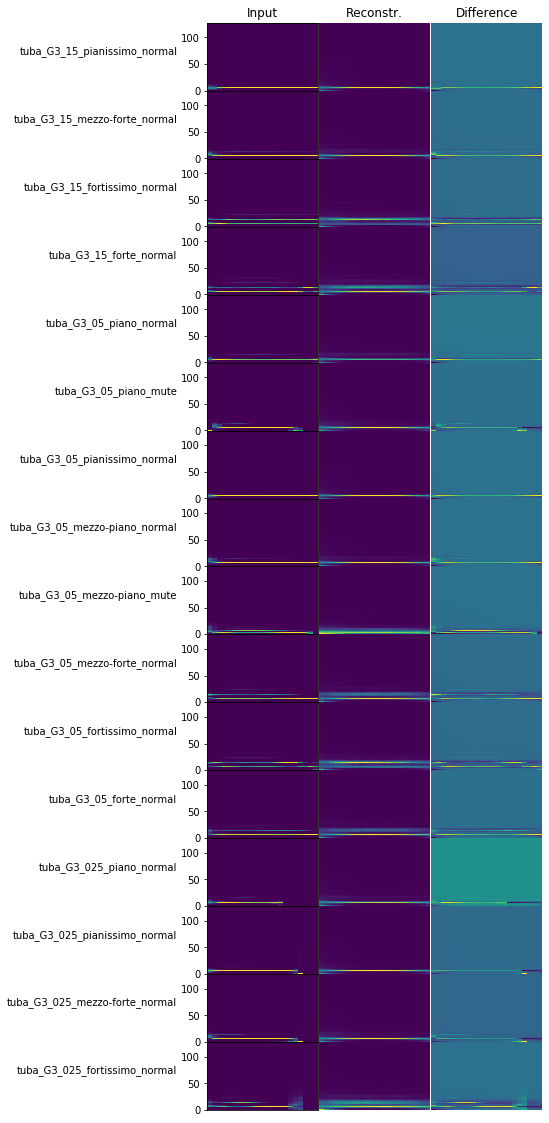

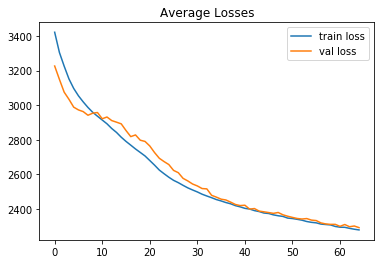

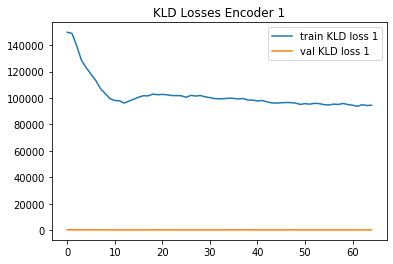

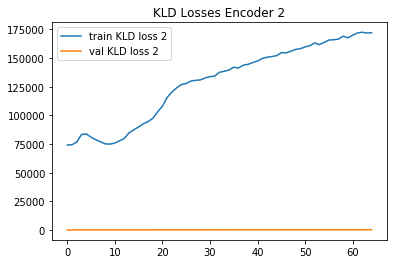

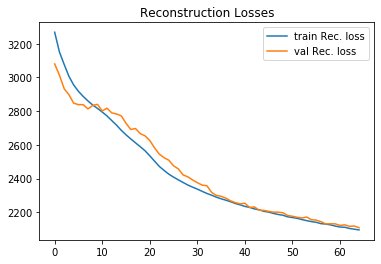

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 71


100%|██████████| 727/727 [00:09<00:00, 75.79it/s]

training_avg_loss=2271.94
 training_avg_kld1=93320.08
 training_avg_kld2=93320.08
 training_avg_rec=2088.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2282.93

Epoch: 72


100%|██████████| 727/727 [00:09<00:00, 74.81it/s]


training_avg_loss=2267.20
 training_avg_kld1=93551.36
 training_avg_kld2=93551.36
 training_avg_rec=2082.58



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2274.92

Epoch: 73


100%|██████████| 727/727 [00:09<00:00, 75.16it/s]

training_avg_loss=2264.64
 training_avg_kld1=93404.97
 training_avg_kld2=93404.97
 training_avg_rec=2080.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2284.51

Epoch: 74


100%|██████████| 727/727 [00:09<00:00, 74.76it/s]

training_avg_loss=2261.27
 training_avg_kld1=92658.21
 training_avg_kld2=92658.21
 training_avg_rec=2076.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2273.55

Epoch: 75


100%|██████████| 727/727 [00:09<00:00, 75.14it/s]

training_avg_loss=2259.13
 training_avg_kld1=93467.43
 training_avg_kld2=93467.43
 training_avg_rec=2073.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2273.04

Epoch: 76


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]


training_avg_loss=2254.48
 training_avg_kld1=92623.55
 training_avg_kld2=92623.55
 training_avg_rec=2069.26



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2282.04

Epoch: 77


100%|██████████| 727/727 [00:09<00:00, 75.08it/s]

training_avg_loss=2252.03
 training_avg_kld1=92851.55
 training_avg_kld2=92851.55
 training_avg_rec=2065.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2261.16

Epoch: 78


100%|██████████| 727/727 [00:09<00:00, 75.10it/s]


training_avg_loss=2248.10
 training_avg_kld1=92039.88
 training_avg_kld2=92039.88
 training_avg_rec=2061.81



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2265.03

Epoch: 79


100%|██████████| 727/727 [00:09<00:00, 75.08it/s]


training_avg_loss=2243.94
 training_avg_kld1=91251.01
 training_avg_kld2=91251.01
 training_avg_rec=2058.40



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2265.51

Epoch: 80


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]

training_avg_loss=2242.90
 training_avg_kld1=92249.54
 training_avg_kld2=92249.54
 training_avg_rec=2055.95



val_avg_loss=2261.56



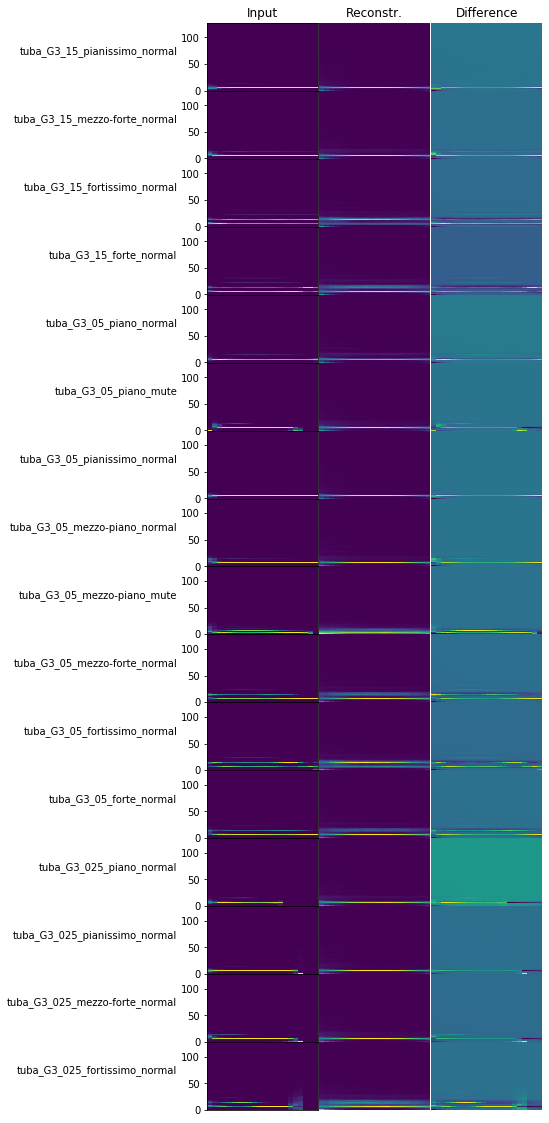

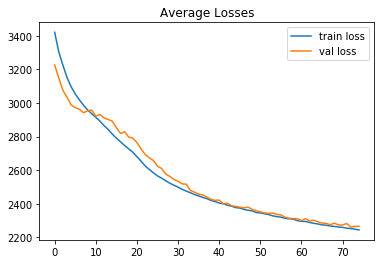

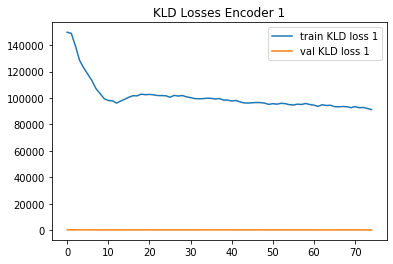

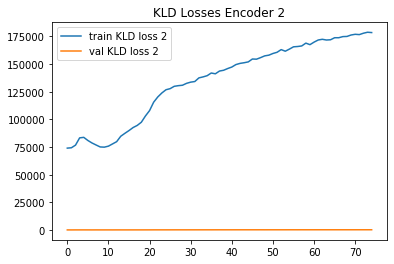

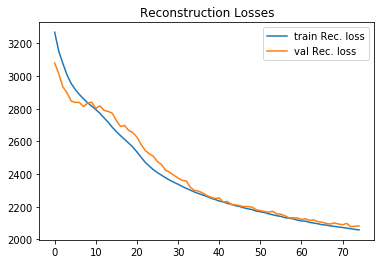

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 81


100%|██████████| 727/727 [00:09<00:00, 75.92it/s]

training_avg_loss=2237.82
 training_avg_kld1=91294.36
 training_avg_kld2=91294.36
 training_avg_rec=2051.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2252.91

Epoch: 82


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]

training_avg_loss=2237.93
 training_avg_kld1=91271.89
 training_avg_kld2=91271.89
 training_avg_rec=2050.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2255.19

Epoch: 83


100%|██████████| 727/727 [00:09<00:00, 74.78it/s]

training_avg_loss=2234.78
 training_avg_kld1=91886.14
 training_avg_kld2=91886.14
 training_avg_rec=2047.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2255.44

Epoch: 84


100%|██████████| 727/727 [00:09<00:00, 75.00it/s]

training_avg_loss=2230.47
 training_avg_kld1=90583.83
 training_avg_kld2=90583.83
 training_avg_rec=2042.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2249.89

Epoch: 85


100%|██████████| 727/727 [00:09<00:00, 75.09it/s]

training_avg_loss=2230.26
 training_avg_kld1=90834.78
 training_avg_kld2=90834.78
 training_avg_rec=2041.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2240.45

Epoch: 86


100%|██████████| 727/727 [00:09<00:00, 74.87it/s]


training_avg_loss=2227.65
 training_avg_kld1=90054.47
 training_avg_kld2=90054.47
 training_avg_rec=2039.64



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2249.37

Epoch: 87


100%|██████████| 727/727 [00:09<00:00, 74.69it/s]

training_avg_loss=2226.69
 training_avg_kld1=90663.17
 training_avg_kld2=90663.17
 training_avg_rec=2037.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2244.90

Epoch: 88


100%|██████████| 727/727 [00:09<00:00, 74.66it/s]


training_avg_loss=2222.48
 training_avg_kld1=90650.55
 training_avg_kld2=90650.55
 training_avg_rec=2033.28



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2247.26

Epoch: 89


100%|██████████| 727/727 [00:09<00:00, 75.08it/s]


training_avg_loss=2219.90
 training_avg_kld1=90410.22
 training_avg_kld2=90410.22
 training_avg_rec=2030.54



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2239.87

Epoch: 90


100%|██████████| 727/727 [00:09<00:00, 74.71it/s]


training_avg_loss=2217.42
 training_avg_kld1=89140.96
 training_avg_kld2=89140.96
 training_avg_rec=2027.87

val_avg_loss=2246.06



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

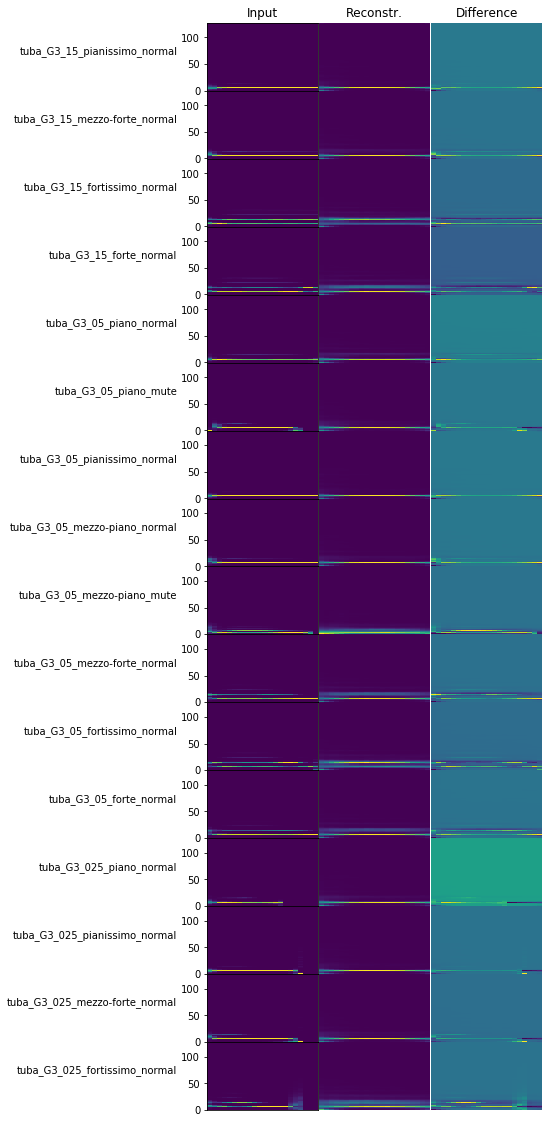

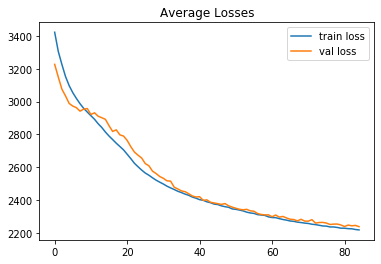

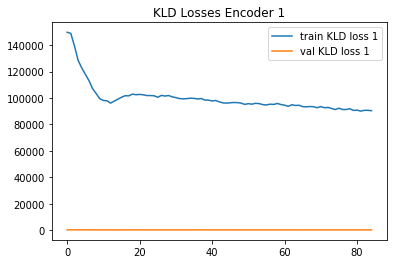

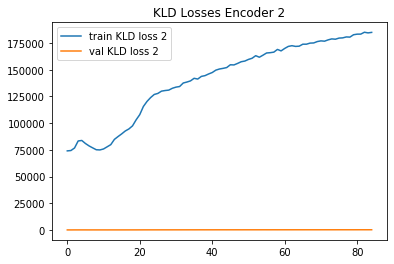

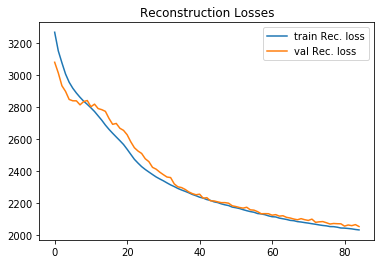

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 91


100%|██████████| 727/727 [00:09<00:00, 78.96it/s]

training_avg_loss=2213.96
 training_avg_kld1=89092.70
 training_avg_kld2=89092.70
 training_avg_rec=2025.16




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2243.05

Epoch: 92


100%|██████████| 727/727 [00:09<00:00, 75.03it/s]

training_avg_loss=2211.28
 training_avg_kld1=88677.05
 training_avg_kld2=88677.05
 training_avg_rec=2022.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2238.44

Epoch: 93


100%|██████████| 727/727 [00:09<00:00, 74.78it/s]

training_avg_loss=2208.33
 training_avg_kld1=88343.95
 training_avg_kld2=88343.95
 training_avg_rec=2018.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2241.92

Epoch: 94


100%|██████████| 727/727 [00:09<00:00, 74.72it/s]

training_avg_loss=2208.06
 training_avg_kld1=88347.59
 training_avg_kld2=88347.59
 training_avg_rec=2018.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2237.86

Epoch: 95


100%|██████████| 727/727 [00:09<00:00, 75.00it/s]

training_avg_loss=2205.71
 training_avg_kld1=88179.12
 training_avg_kld2=88179.12
 training_avg_rec=2015.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2221.77

Epoch: 96


100%|██████████| 727/727 [00:09<00:00, 74.97it/s]

training_avg_loss=2201.01
 training_avg_kld1=88236.10
 training_avg_kld2=88236.10
 training_avg_rec=2011.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2227.00

Epoch: 97


100%|██████████| 727/727 [00:09<00:00, 74.59it/s]


training_avg_loss=2200.92
 training_avg_kld1=88093.33
 training_avg_kld2=88093.33
 training_avg_rec=2010.29



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2218.29

Epoch: 98


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]


training_avg_loss=2197.06
 training_avg_kld1=87649.82
 training_avg_kld2=87649.82
 training_avg_rec=2007.46



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2230.26

Epoch: 99


100%|██████████| 727/727 [00:09<00:00, 74.85it/s]

training_avg_loss=2196.47
 training_avg_kld1=87169.77
 training_avg_kld2=87169.77
 training_avg_rec=2005.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2227.74

Epoch: 100


100%|██████████| 727/727 [00:09<00:00, 74.85it/s]


training_avg_loss=2193.71
 training_avg_kld1=87393.64
 training_avg_kld2=87393.64
 training_avg_rec=2002.54

val_avg_loss=2218.31



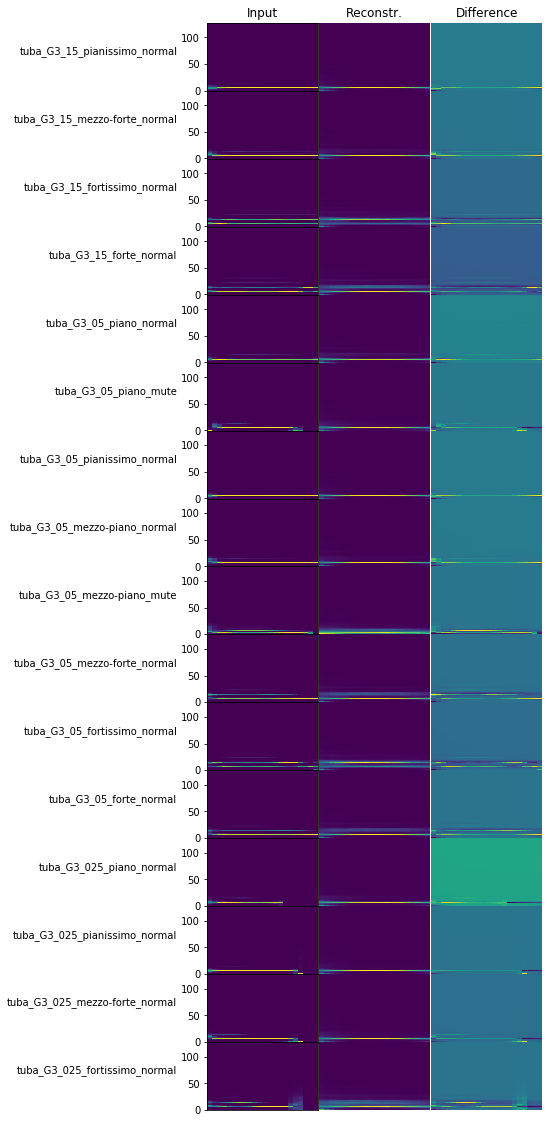

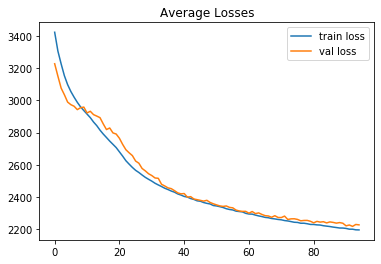

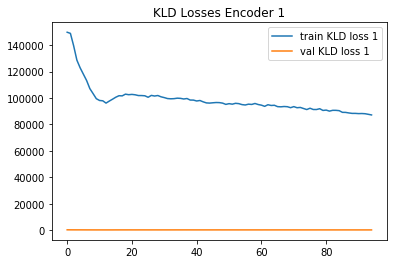

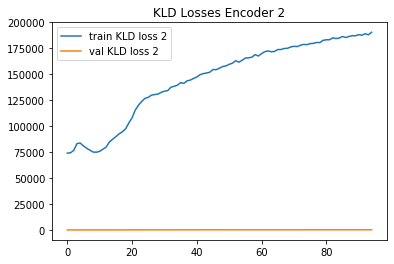

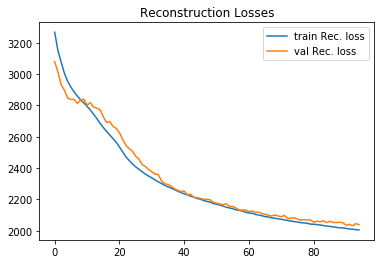

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 101


100%|██████████| 727/727 [00:09<00:00, 75.98it/s]

training_avg_loss=2192.40
 training_avg_kld1=86268.28
 training_avg_kld2=86268.28
 training_avg_rec=2001.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2217.27

Epoch: 102


100%|██████████| 727/727 [00:09<00:00, 75.08it/s]


training_avg_loss=2188.83
 training_avg_kld1=87022.81
 training_avg_kld2=87022.81
 training_avg_rec=1998.12



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2221.30

Epoch: 103


100%|██████████| 727/727 [00:09<00:00, 75.18it/s]


training_avg_loss=2186.76
 training_avg_kld1=86472.12
 training_avg_kld2=86472.12
 training_avg_rec=1995.90



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2226.73

Epoch: 104


100%|██████████| 727/727 [00:09<00:00, 75.06it/s]

training_avg_loss=2183.57
 training_avg_kld1=85644.75
 training_avg_kld2=85644.75
 training_avg_rec=1993.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2220.41

Epoch: 105


100%|██████████| 727/727 [00:09<00:00, 75.04it/s]

training_avg_loss=2181.09
 training_avg_kld1=85357.46
 training_avg_kld2=85357.46
 training_avg_rec=1990.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2213.07

Epoch: 106


100%|██████████| 727/727 [00:09<00:00, 74.70it/s]

training_avg_loss=2179.25
 training_avg_kld1=85558.61
 training_avg_kld2=85558.61
 training_avg_rec=1989.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2213.17

Epoch: 107


100%|██████████| 727/727 [00:09<00:00, 74.80it/s]


training_avg_loss=2176.46
 training_avg_kld1=85043.86
 training_avg_kld2=85043.86
 training_avg_rec=1986.32



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2219.46

Epoch: 108


100%|██████████| 727/727 [00:09<00:00, 75.07it/s]

training_avg_loss=2175.24
 training_avg_kld1=84549.33
 training_avg_kld2=84549.33
 training_avg_rec=1984.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2215.84

Epoch: 109


100%|██████████| 727/727 [00:09<00:00, 74.87it/s]

training_avg_loss=2174.53
 training_avg_kld1=84980.60
 training_avg_kld2=84980.60
 training_avg_rec=1983.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2207.94

Epoch: 110


100%|██████████| 727/727 [00:09<00:00, 74.79it/s]


training_avg_loss=2171.72
 training_avg_kld1=84958.89
 training_avg_kld2=84958.89
 training_avg_rec=1980.47

val_avg_loss=2208.09



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

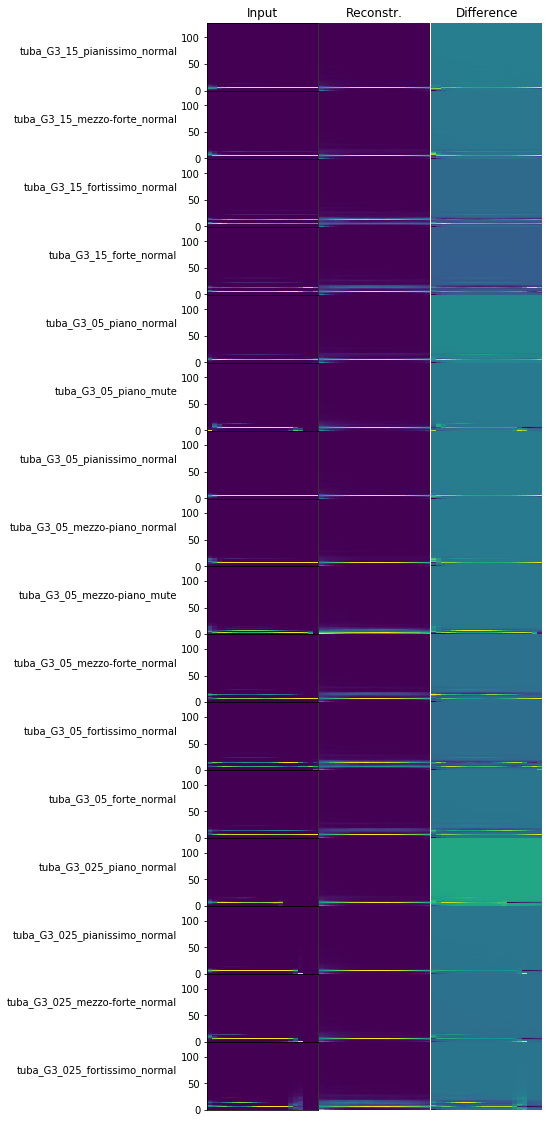

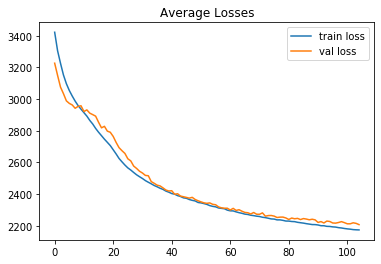

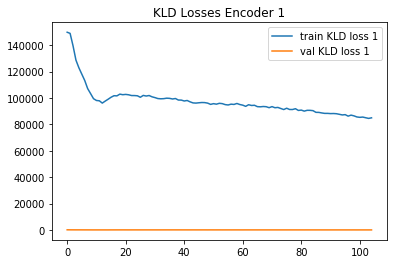

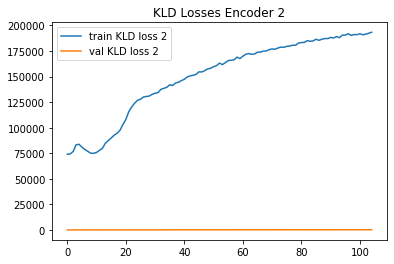

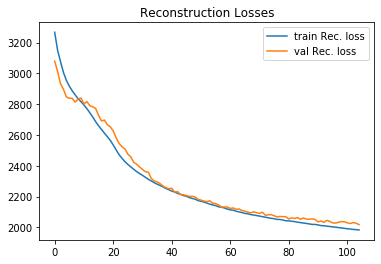

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 111


100%|██████████| 727/727 [00:09<00:00, 75.63it/s]

training_avg_loss=2170.29
 training_avg_kld1=84778.98
 training_avg_kld2=84778.98
 training_avg_rec=1979.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2208.20

Epoch: 112


100%|██████████| 727/727 [00:09<00:00, 74.62it/s]

training_avg_loss=2168.20
 training_avg_kld1=84203.57
 training_avg_kld2=84203.57
 training_avg_rec=1977.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2215.37

Epoch: 113


100%|██████████| 727/727 [00:09<00:00, 74.51it/s]

training_avg_loss=2164.47
 training_avg_kld1=83584.27
 training_avg_kld2=83584.27
 training_avg_rec=1974.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2191.86

Epoch: 114


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]

training_avg_loss=2165.13
 training_avg_kld1=83527.14
 training_avg_kld2=83527.14
 training_avg_rec=1974.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2201.63

Epoch: 115


100%|██████████| 727/727 [00:09<00:00, 74.85it/s]


training_avg_loss=2163.94
 training_avg_kld1=83868.40
 training_avg_kld2=83868.40
 training_avg_rec=1971.61



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2200.02

Epoch: 116


100%|██████████| 727/727 [00:09<00:00, 75.21it/s]

training_avg_loss=2160.57
 training_avg_kld1=83737.74
 training_avg_kld2=83737.74
 training_avg_rec=1968.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2198.00

Epoch: 117


100%|██████████| 727/727 [00:09<00:00, 74.84it/s]


training_avg_loss=2159.82
 training_avg_kld1=83451.33
 training_avg_kld2=83451.33
 training_avg_rec=1968.08



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2191.18

Epoch: 118


100%|██████████| 727/727 [00:09<00:00, 74.55it/s]

training_avg_loss=2155.94
 training_avg_kld1=83204.02
 training_avg_kld2=83204.02
 training_avg_rec=1964.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2196.90

Epoch: 119


100%|██████████| 727/727 [00:09<00:00, 74.72it/s]

training_avg_loss=2155.04
 training_avg_kld1=83059.36
 training_avg_kld2=83059.36
 training_avg_rec=1963.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2190.30

Epoch: 120


100%|██████████| 727/727 [00:09<00:00, 74.62it/s]


training_avg_loss=2152.18
 training_avg_kld1=83013.50
 training_avg_kld2=83013.50
 training_avg_rec=1961.23

val_avg_loss=2183.48



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

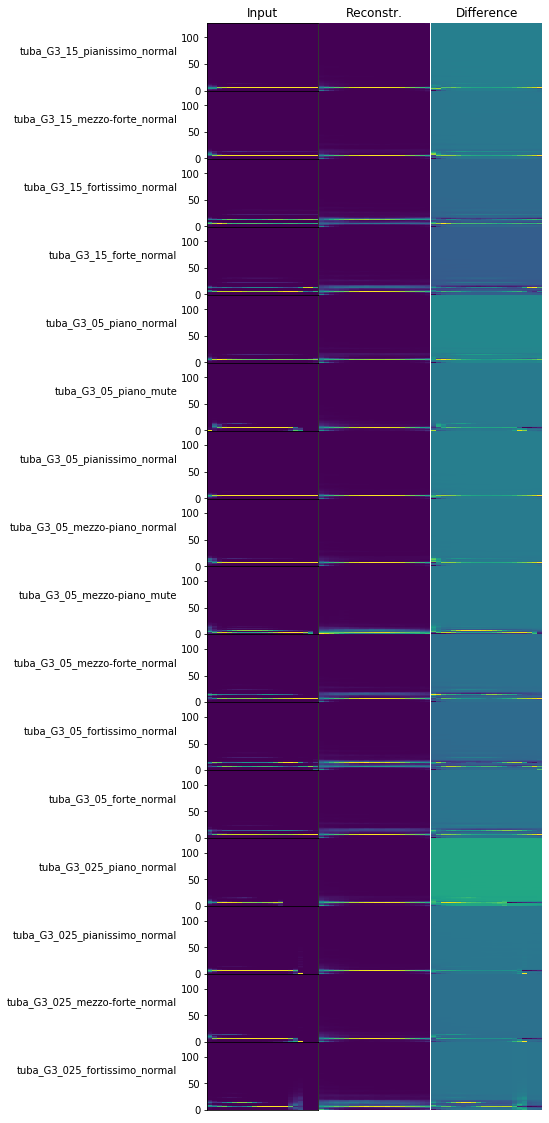

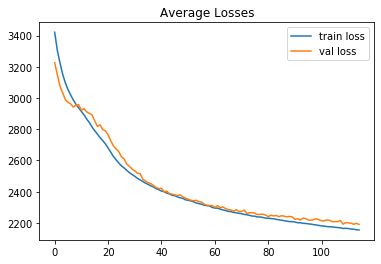

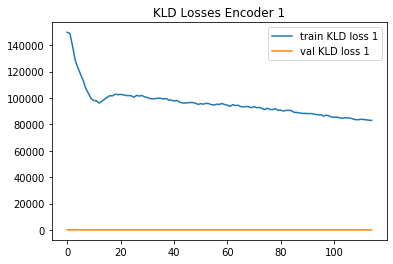

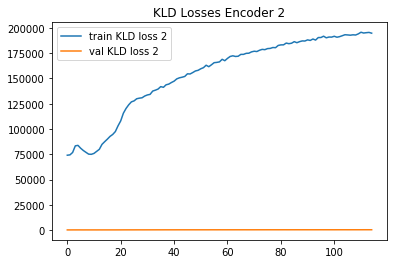

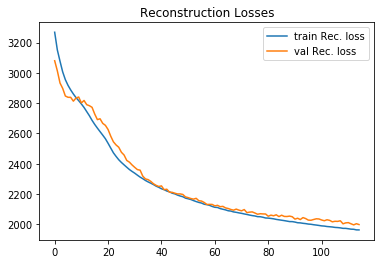

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 121


100%|██████████| 727/727 [00:09<00:00, 75.74it/s]

training_avg_loss=2151.49
 training_avg_kld1=82976.50
 training_avg_kld2=82976.50
 training_avg_rec=1960.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2189.21

Epoch: 122


100%|██████████| 727/727 [00:09<00:00, 74.95it/s]

training_avg_loss=2148.33
 training_avg_kld1=82581.76
 training_avg_kld2=82581.76
 training_avg_rec=1957.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2179.88

Epoch: 123


100%|██████████| 727/727 [00:09<00:00, 74.38it/s]

training_avg_loss=2148.84
 training_avg_kld1=82835.19
 training_avg_kld2=82835.19
 training_avg_rec=1957.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2186.41

Epoch: 124


100%|██████████| 727/727 [00:09<00:00, 74.63it/s]


training_avg_loss=2147.85
 training_avg_kld1=82359.46
 training_avg_kld2=82359.46
 training_avg_rec=1955.86



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2181.54

Epoch: 125


100%|██████████| 727/727 [00:09<00:00, 74.66it/s]

training_avg_loss=2145.45
 training_avg_kld1=82387.30
 training_avg_kld2=82387.30
 training_avg_rec=1953.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2190.82

Epoch: 126


100%|██████████| 727/727 [00:09<00:00, 74.69it/s]

training_avg_loss=2142.43
 training_avg_kld1=82504.21
 training_avg_kld2=82504.21
 training_avg_rec=1950.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2186.11

Epoch: 127


100%|██████████| 727/727 [00:09<00:00, 74.44it/s]

training_avg_loss=2142.53
 training_avg_kld1=81039.07
 training_avg_kld2=81039.07
 training_avg_rec=1951.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2182.57

Epoch: 128


100%|██████████| 727/727 [00:09<00:00, 74.50it/s]


training_avg_loss=2139.80
 training_avg_kld1=81674.05
 training_avg_kld2=81674.05
 training_avg_rec=1948.29



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2179.81

Epoch: 129


100%|██████████| 727/727 [00:09<00:00, 74.85it/s]


training_avg_loss=2139.38
 training_avg_kld1=80816.89
 training_avg_kld2=80816.89
 training_avg_rec=1948.09



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2179.93

Epoch: 130


100%|██████████| 727/727 [00:09<00:00, 74.96it/s]


training_avg_loss=2136.21
 training_avg_kld1=81063.91
 training_avg_kld2=81063.91
 training_avg_rec=1944.89

val_avg_loss=2180.61



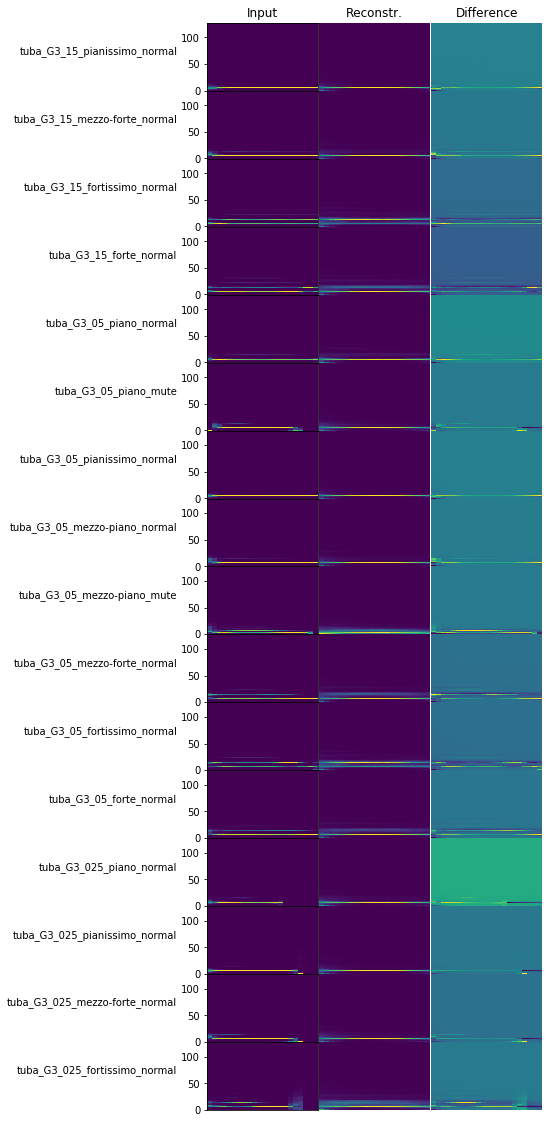

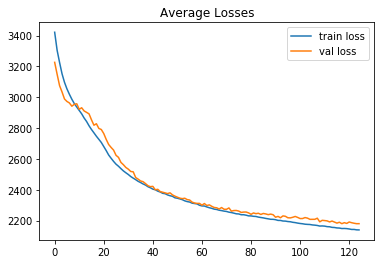

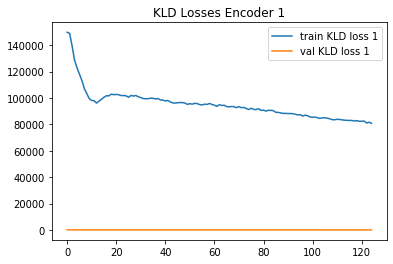

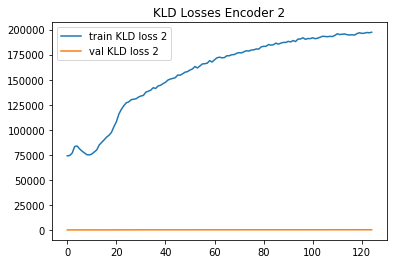

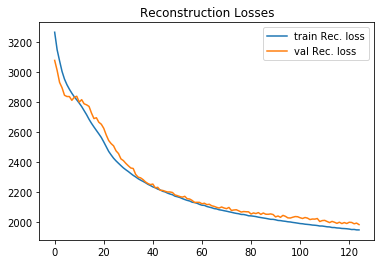

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 131


100%|██████████| 727/727 [00:09<00:00, 79.22it/s]

training_avg_loss=2133.68
 training_avg_kld1=80841.24
 training_avg_kld2=80841.24
 training_avg_rec=1942.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2174.72

Epoch: 132


100%|██████████| 727/727 [00:09<00:00, 74.56it/s]

training_avg_loss=2130.39
 training_avg_kld1=80343.37
 training_avg_kld2=80343.37
 training_avg_rec=1940.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2178.02

Epoch: 133


100%|██████████| 727/727 [00:09<00:00, 74.76it/s]

training_avg_loss=2129.53
 training_avg_kld1=80597.26
 training_avg_kld2=80597.26
 training_avg_rec=1939.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2168.38

Epoch: 134


100%|██████████| 727/727 [00:09<00:00, 74.90it/s]


training_avg_loss=2130.44
 training_avg_kld1=80396.49
 training_avg_kld2=80396.49
 training_avg_rec=1939.36



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2177.07

Epoch: 135


100%|██████████| 727/727 [00:09<00:00, 75.11it/s]


training_avg_loss=2127.75
 training_avg_kld1=80773.45
 training_avg_kld2=80773.45
 training_avg_rec=1936.36



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2165.44

Epoch: 136


100%|██████████| 727/727 [00:09<00:00, 75.00it/s]


training_avg_loss=2126.72
 training_avg_kld1=80636.05
 training_avg_kld2=80636.05
 training_avg_rec=1935.32



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2166.18

Epoch: 137


100%|██████████| 727/727 [00:09<00:00, 74.63it/s]

training_avg_loss=2125.11
 training_avg_kld1=80492.53
 training_avg_kld2=80492.53
 training_avg_rec=1933.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2173.32

Epoch: 138


100%|██████████| 727/727 [00:09<00:00, 75.32it/s]


training_avg_loss=2121.51
 training_avg_kld1=79684.85
 training_avg_kld2=79684.85
 training_avg_rec=1931.42



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2166.87

Epoch: 139


100%|██████████| 727/727 [00:09<00:00, 74.53it/s]

training_avg_loss=2120.67
 training_avg_kld1=78816.67
 training_avg_kld2=78816.67
 training_avg_rec=1930.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2164.65

Epoch: 140


100%|██████████| 727/727 [00:09<00:00, 74.90it/s]


training_avg_loss=2118.91
 training_avg_kld1=79030.08
 training_avg_kld2=79030.08
 training_avg_rec=1928.98

val_avg_loss=2171.95



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

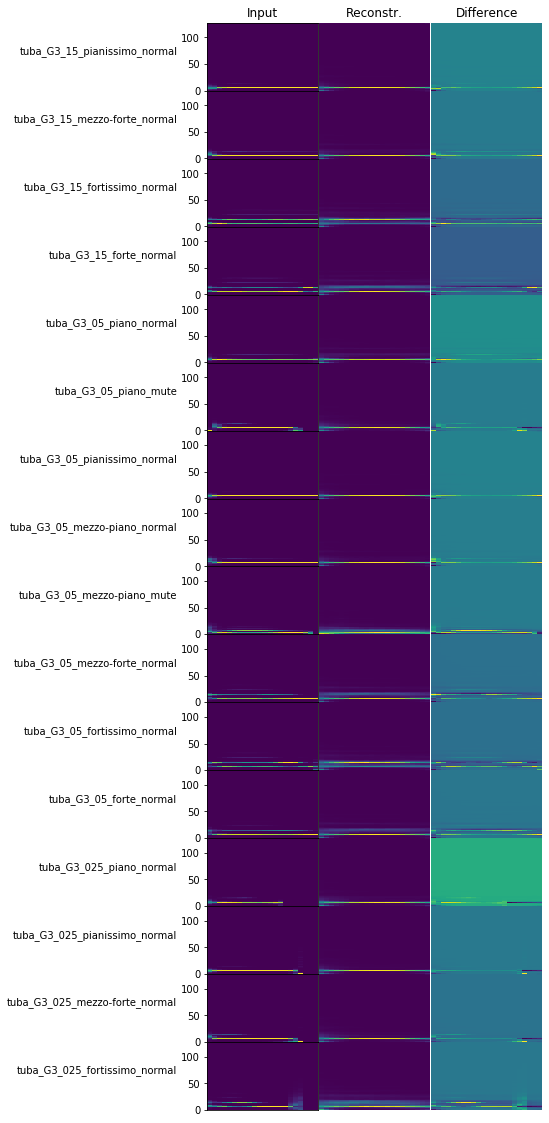

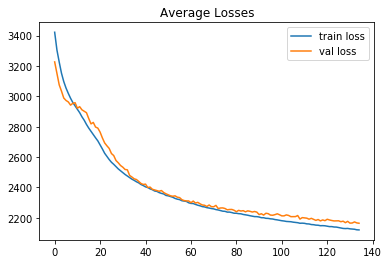

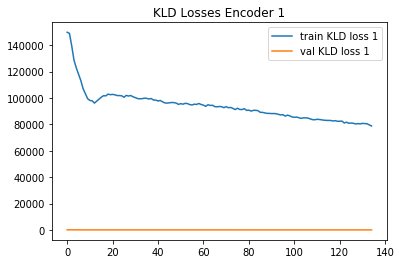

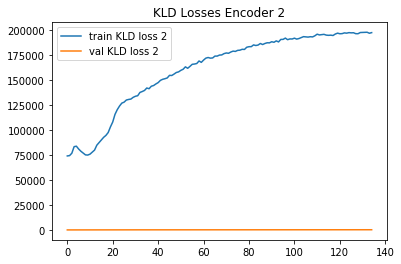

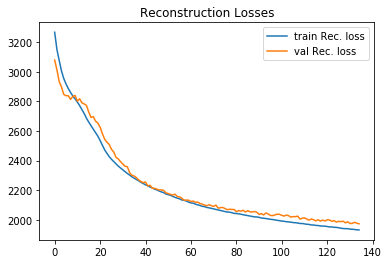

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 141


100%|██████████| 727/727 [00:09<00:00, 75.55it/s]

training_avg_loss=2119.01
 training_avg_kld1=79339.07
 training_avg_kld2=79339.07
 training_avg_rec=1928.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2161.59

Epoch: 142


100%|██████████| 727/727 [00:09<00:00, 74.48it/s]


training_avg_loss=2116.10
 training_avg_kld1=79327.36
 training_avg_kld2=79327.36
 training_avg_rec=1925.64



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2173.21

Epoch: 143


100%|██████████| 727/727 [00:09<00:00, 74.81it/s]

training_avg_loss=2113.86
 training_avg_kld1=78747.76
 training_avg_kld2=78747.76
 training_avg_rec=1924.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2158.75

Epoch: 144


100%|██████████| 727/727 [00:09<00:00, 74.93it/s]

training_avg_loss=2113.91
 training_avg_kld1=78503.33
 training_avg_kld2=78503.33
 training_avg_rec=1923.98




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2166.91

Epoch: 145


100%|██████████| 727/727 [00:09<00:00, 74.76it/s]

training_avg_loss=2110.72
 training_avg_kld1=78675.95
 training_avg_kld2=78675.95
 training_avg_rec=1920.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2154.09

Epoch: 146


100%|██████████| 727/727 [00:09<00:00, 74.55it/s]


training_avg_loss=2111.56
 training_avg_kld1=78256.81
 training_avg_kld2=78256.81
 training_avg_rec=1921.31



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2163.84

Epoch: 147


100%|██████████| 727/727 [00:09<00:00, 74.48it/s]

training_avg_loss=2108.70
 training_avg_kld1=77969.93
 training_avg_kld2=77969.93
 training_avg_rec=1919.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2163.16

Epoch: 148


100%|██████████| 727/727 [00:09<00:00, 74.84it/s]


training_avg_loss=2106.58
 training_avg_kld1=77401.85
 training_avg_kld2=77401.85
 training_avg_rec=1917.53



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2156.09

Epoch: 149


100%|██████████| 727/727 [00:09<00:00, 74.46it/s]


training_avg_loss=2106.04
 training_avg_kld1=77935.88
 training_avg_kld2=77935.88
 training_avg_rec=1915.97



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2160.08

Epoch: 150


100%|██████████| 727/727 [00:09<00:00, 74.39it/s]


training_avg_loss=2103.07
 training_avg_kld1=78194.49
 training_avg_kld2=78194.49
 training_avg_rec=1914.04

val_avg_loss=2151.30



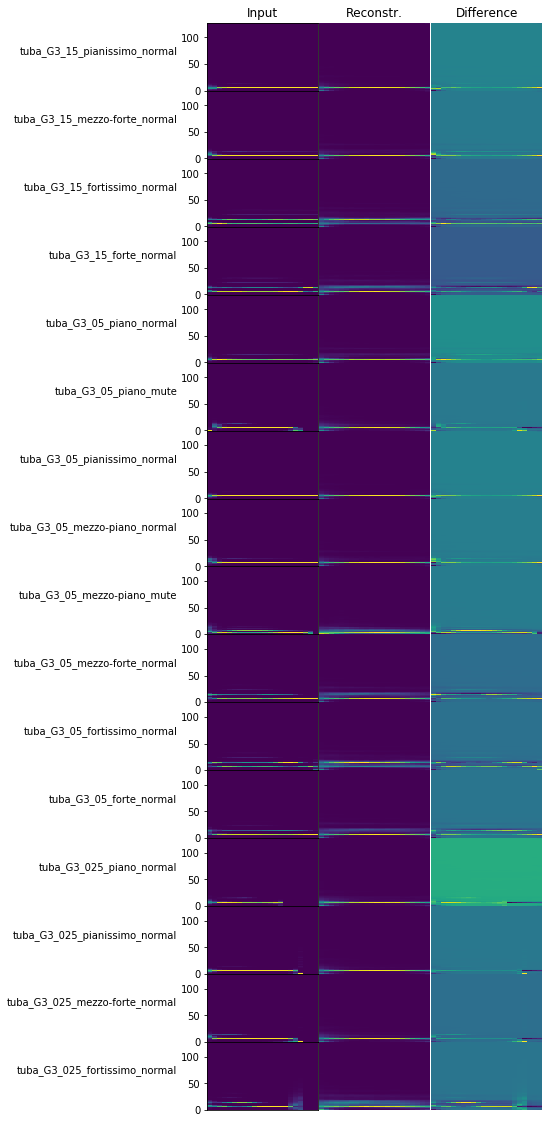

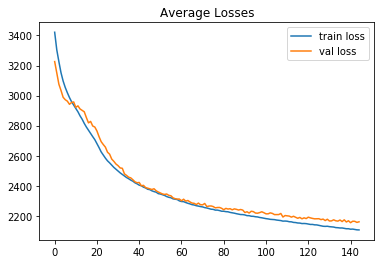

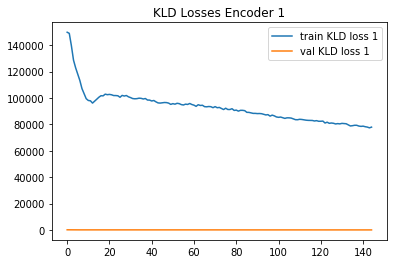

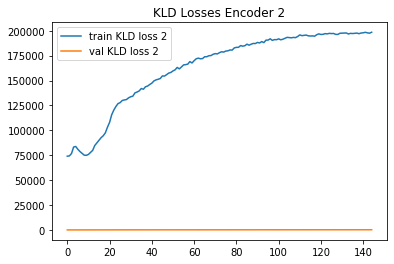

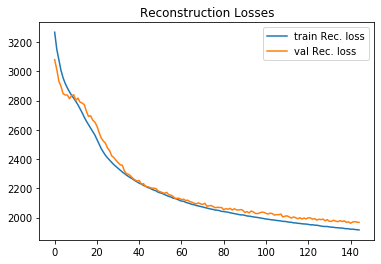

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 151


100%|██████████| 727/727 [00:09<00:00, 75.65it/s]

training_avg_loss=2100.89
 training_avg_kld1=77600.15
 training_avg_kld2=77600.15
 training_avg_rec=1912.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2153.52

Epoch: 152


100%|██████████| 727/727 [00:09<00:00, 74.80it/s]

training_avg_loss=2100.71
 training_avg_kld1=76932.04
 training_avg_kld2=76932.04
 training_avg_rec=1912.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2152.84

Epoch: 153


100%|██████████| 727/727 [00:09<00:00, 74.95it/s]

training_avg_loss=2099.82
 training_avg_kld1=76808.85
 training_avg_kld2=76808.85
 training_avg_rec=1910.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2149.28

Epoch: 154


100%|██████████| 727/727 [00:09<00:00, 74.66it/s]

training_avg_loss=2097.64
 training_avg_kld1=77221.13
 training_avg_kld2=77221.13
 training_avg_rec=1909.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2144.55

Epoch: 155


100%|██████████| 727/727 [00:09<00:00, 74.11it/s]

training_avg_loss=2094.72
 training_avg_kld1=75909.84
 training_avg_kld2=75909.84
 training_avg_rec=1906.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2149.14

Epoch: 156


100%|██████████| 727/727 [00:09<00:00, 74.50it/s]

training_avg_loss=2095.23
 training_avg_kld1=76583.58
 training_avg_kld2=76583.58
 training_avg_rec=1906.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2147.93

Epoch: 157


100%|██████████| 727/727 [00:09<00:00, 74.51it/s]


training_avg_loss=2093.30
 training_avg_kld1=76245.22
 training_avg_kld2=76245.22
 training_avg_rec=1905.42



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2142.07

Epoch: 158


100%|██████████| 727/727 [00:09<00:00, 74.59it/s]

training_avg_loss=2091.96
 training_avg_kld1=75801.33
 training_avg_kld2=75801.33
 training_avg_rec=1904.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2141.51

Epoch: 159


100%|██████████| 727/727 [00:09<00:00, 74.53it/s]


training_avg_loss=2090.06
 training_avg_kld1=76851.63
 training_avg_kld2=76851.63
 training_avg_rec=1902.02



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2143.70

Epoch: 160


100%|██████████| 727/727 [00:09<00:00, 74.90it/s]


training_avg_loss=2089.30
 training_avg_kld1=75571.91
 training_avg_kld2=75571.91
 training_avg_rec=1901.07

val_avg_loss=2138.50



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

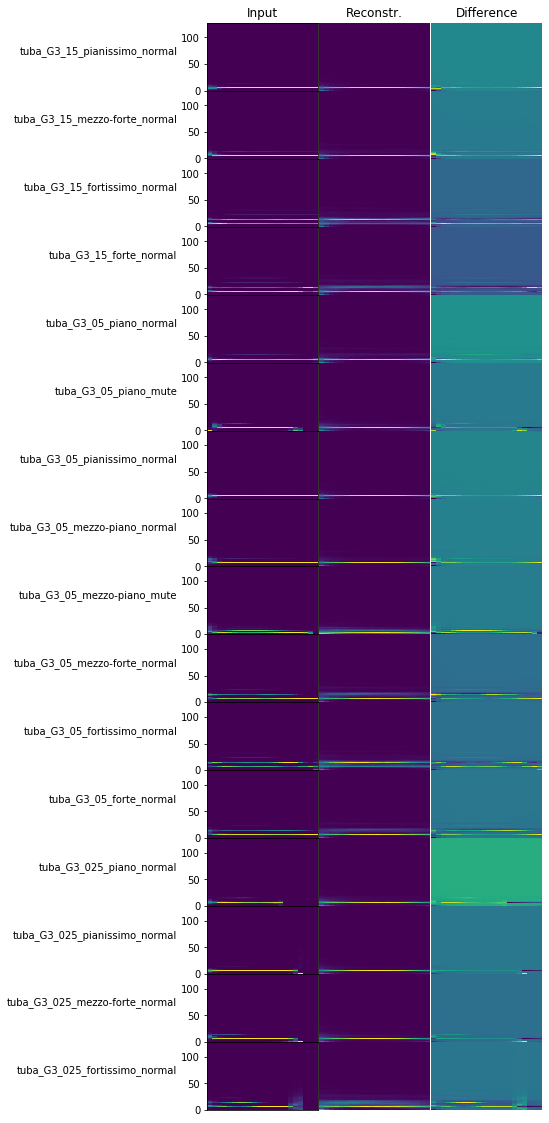

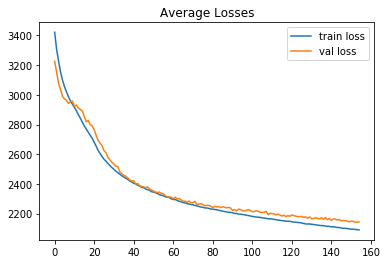

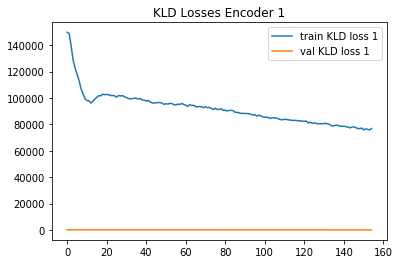

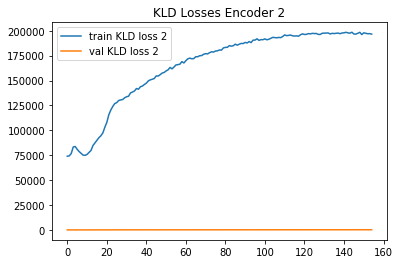

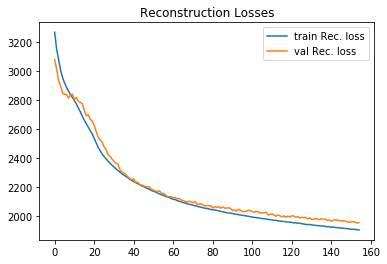

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 161


100%|██████████| 727/727 [00:09<00:00, 79.06it/s]

training_avg_loss=2086.07
 training_avg_kld1=75439.57
 training_avg_kld2=75439.57
 training_avg_rec=1898.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2144.87

Epoch: 162


100%|██████████| 727/727 [00:09<00:00, 74.90it/s]

training_avg_loss=2086.16
 training_avg_kld1=75948.94
 training_avg_kld2=75948.94
 training_avg_rec=1897.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2134.71

Epoch: 163


100%|██████████| 727/727 [00:09<00:00, 74.62it/s]

training_avg_loss=2083.25
 training_avg_kld1=75167.61
 training_avg_kld2=75167.61
 training_avg_rec=1896.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2131.77

Epoch: 164


100%|██████████| 727/727 [00:09<00:00, 74.57it/s]

training_avg_loss=2083.17
 training_avg_kld1=75174.81
 training_avg_kld2=75174.81
 training_avg_rec=1895.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2132.37

Epoch: 165


100%|██████████| 727/727 [00:09<00:00, 74.96it/s]


training_avg_loss=2079.95
 training_avg_kld1=74892.40
 training_avg_kld2=74892.40
 training_avg_rec=1893.86



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2139.25

Epoch: 166


100%|██████████| 727/727 [00:09<00:00, 74.64it/s]

training_avg_loss=2081.90
 training_avg_kld1=74561.87
 training_avg_kld2=74561.87
 training_avg_rec=1894.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2135.91

Epoch: 167


100%|██████████| 727/727 [00:09<00:00, 75.04it/s]

training_avg_loss=2078.09
 training_avg_kld1=74577.32
 training_avg_kld2=74577.32
 training_avg_rec=1891.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2130.69

Epoch: 168


100%|██████████| 727/727 [00:09<00:00, 74.44it/s]


training_avg_loss=2078.68
 training_avg_kld1=74498.50
 training_avg_kld2=74498.50
 training_avg_rec=1891.71



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2129.75

Epoch: 169


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]


training_avg_loss=2075.31
 training_avg_kld1=73643.64
 training_avg_kld2=73643.64
 training_avg_rec=1889.63



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2126.33

Epoch: 170


100%|██████████| 727/727 [00:09<00:00, 74.59it/s]

training_avg_loss=2073.80
 training_avg_kld1=73650.10
 training_avg_kld2=73650.10
 training_avg_rec=1887.78



val_avg_loss=2131.71



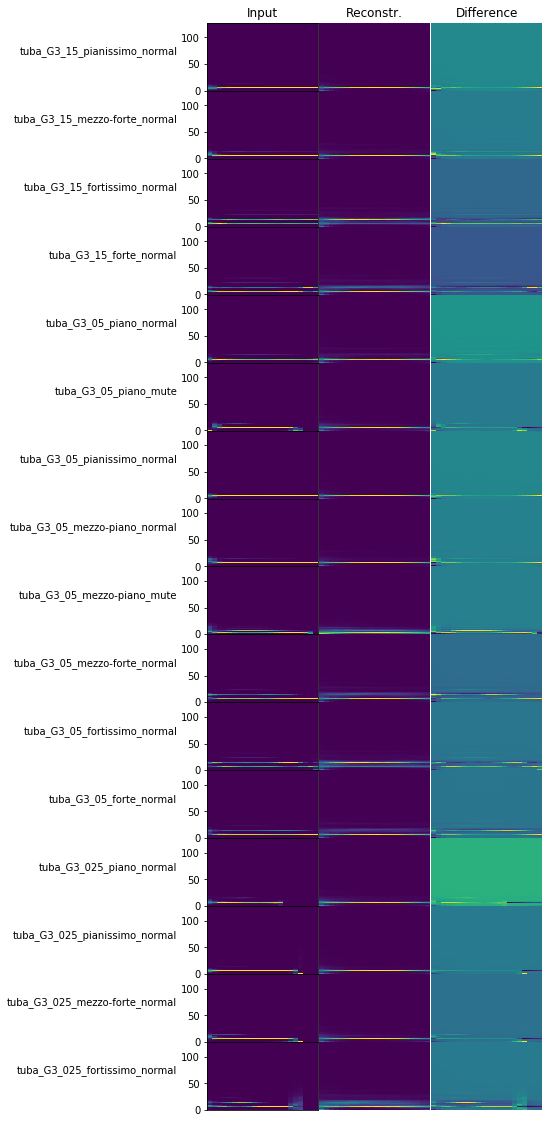

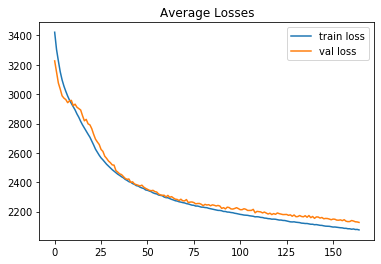

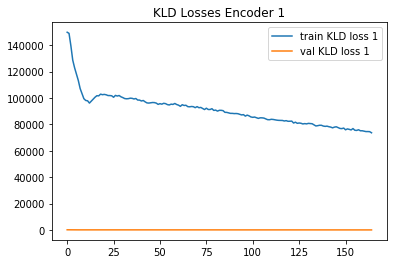

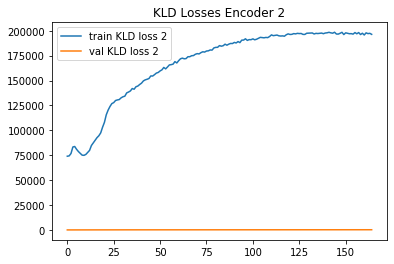

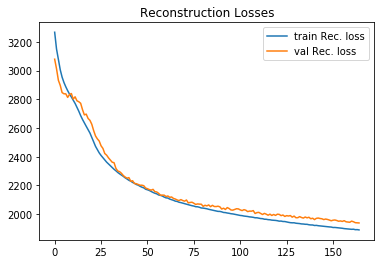

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 171


100%|██████████| 727/727 [00:09<00:00, 75.53it/s]

training_avg_loss=2073.54
 training_avg_kld1=73404.20
 training_avg_kld2=73404.20
 training_avg_rec=1887.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2132.04

Epoch: 172


100%|██████████| 727/727 [00:09<00:00, 74.45it/s]


training_avg_loss=2072.08
 training_avg_kld1=73805.34
 training_avg_kld2=73805.34
 training_avg_rec=1885.79



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2125.03

Epoch: 173


100%|██████████| 727/727 [00:09<00:00, 74.38it/s]


training_avg_loss=2069.75
 training_avg_kld1=73464.40
 training_avg_kld2=73464.40
 training_avg_rec=1884.27



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2126.50

Epoch: 174


100%|██████████| 727/727 [00:09<00:00, 74.95it/s]


training_avg_loss=2071.10
 training_avg_kld1=74000.87
 training_avg_kld2=74000.87
 training_avg_rec=1884.83



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2130.33

Epoch: 175


100%|██████████| 727/727 [00:09<00:00, 74.55it/s]

training_avg_loss=2067.77
 training_avg_kld1=73740.81
 training_avg_kld2=73740.81
 training_avg_rec=1882.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2127.39

Epoch: 176


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]

training_avg_loss=2065.88
 training_avg_kld1=73387.01
 training_avg_kld2=73387.01
 training_avg_rec=1880.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2125.75

Epoch: 177


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]


training_avg_loss=2064.77
 training_avg_kld1=72457.99
 training_avg_kld2=72457.99
 training_avg_rec=1880.01



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2123.83

Epoch: 178


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]

training_avg_loss=2064.25
 training_avg_kld1=72506.23
 training_avg_kld2=72506.23
 training_avg_rec=1879.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2128.71

Epoch: 179


100%|██████████| 727/727 [00:09<00:00, 74.43it/s]

training_avg_loss=2060.83
 training_avg_kld1=72451.32
 training_avg_kld2=72451.32
 training_avg_rec=1876.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2123.60

Epoch: 180


100%|██████████| 727/727 [00:09<00:00, 74.62it/s]

training_avg_loss=2060.73
 training_avg_kld1=72199.84
 training_avg_kld2=72199.84
 training_avg_rec=1876.67



val_avg_loss=2119.07



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

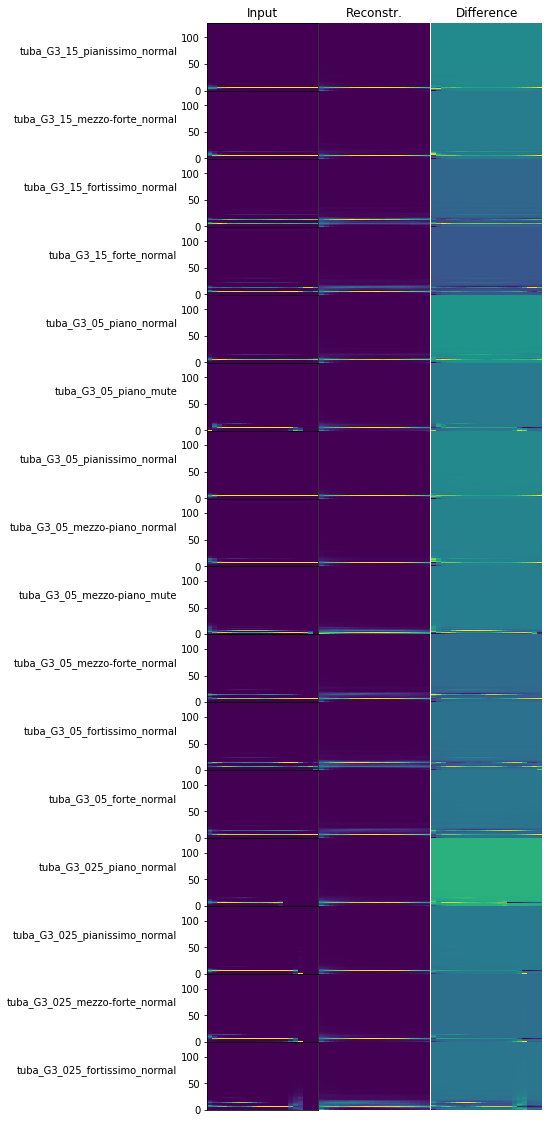

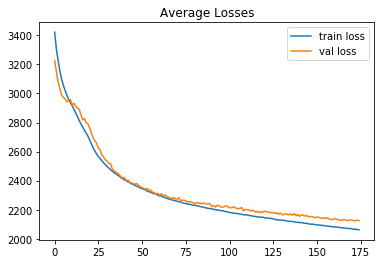

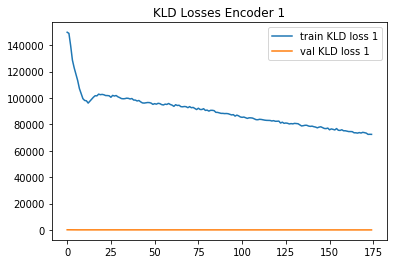

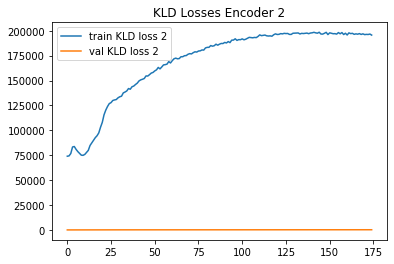

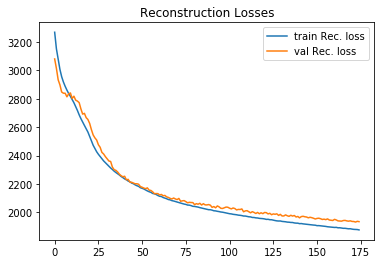

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 181


100%|██████████| 727/727 [00:09<00:00, 75.75it/s]

training_avg_loss=2059.29
 training_avg_kld1=72072.28
 training_avg_kld2=72072.28
 training_avg_rec=1875.16




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2116.07

Epoch: 182


100%|██████████| 727/727 [00:09<00:00, 74.20it/s]


training_avg_loss=2056.80
 training_avg_kld1=71547.42
 training_avg_kld2=71547.42
 training_avg_rec=1873.61



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2125.27

Epoch: 183


100%|██████████| 727/727 [00:09<00:00, 74.60it/s]

training_avg_loss=2057.61
 training_avg_kld1=72261.76
 training_avg_kld2=72261.76
 training_avg_rec=1873.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2118.11

Epoch: 184


100%|██████████| 727/727 [00:09<00:00, 74.69it/s]


training_avg_loss=2055.97
 training_avg_kld1=71490.26
 training_avg_kld2=71490.26
 training_avg_rec=1872.48



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2121.20

Epoch: 185


100%|██████████| 727/727 [00:09<00:00, 74.23it/s]


training_avg_loss=2053.67
 training_avg_kld1=71632.24
 training_avg_kld2=71632.24
 training_avg_rec=1870.13



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2112.00

Epoch: 186


100%|██████████| 727/727 [00:09<00:00, 74.57it/s]


training_avg_loss=2053.12
 training_avg_kld1=70849.27
 training_avg_kld2=70849.27
 training_avg_rec=1869.53



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2109.01

Epoch: 187


100%|██████████| 727/727 [00:09<00:00, 74.75it/s]


training_avg_loss=2053.01
 training_avg_kld1=71329.61
 training_avg_kld2=71329.61
 training_avg_rec=1868.78



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2118.32

Epoch: 188


100%|██████████| 727/727 [00:09<00:00, 74.88it/s]

training_avg_loss=2050.89
 training_avg_kld1=71298.79
 training_avg_kld2=71298.79
 training_avg_rec=1867.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2114.68

Epoch: 189


100%|██████████| 727/727 [00:09<00:00, 74.59it/s]


training_avg_loss=2050.54
 training_avg_kld1=71557.44
 training_avg_kld2=71557.44
 training_avg_rec=1866.96



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2108.36

Epoch: 190


100%|██████████| 727/727 [00:09<00:00, 74.70it/s]


training_avg_loss=2047.10
 training_avg_kld1=71422.88
 training_avg_kld2=71422.88
 training_avg_rec=1864.25

val_avg_loss=2109.50



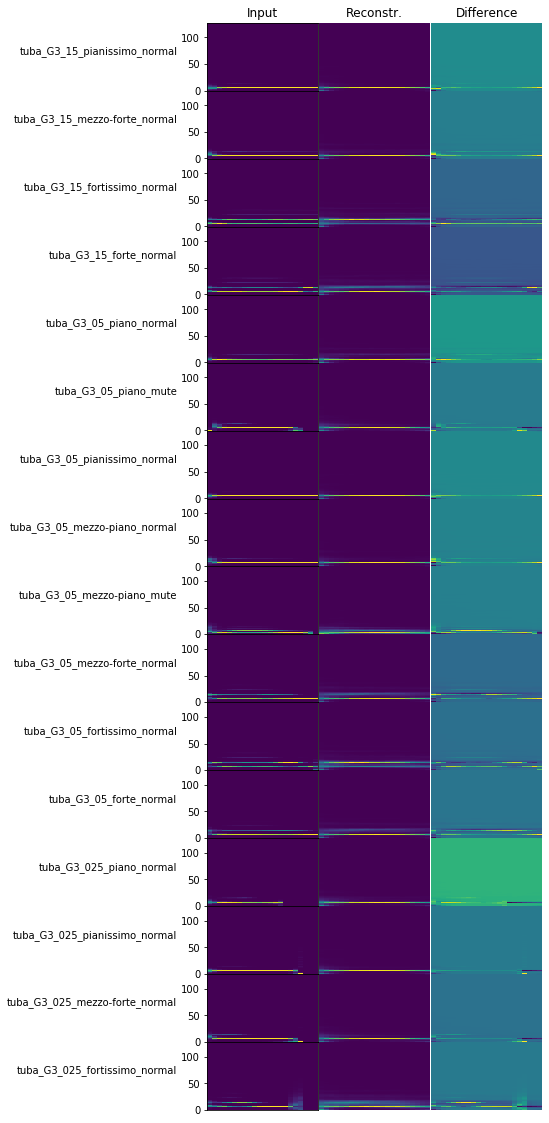

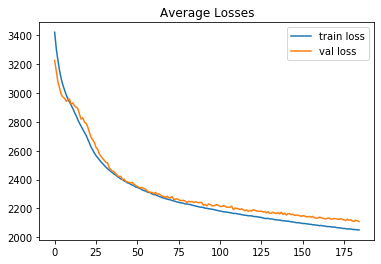

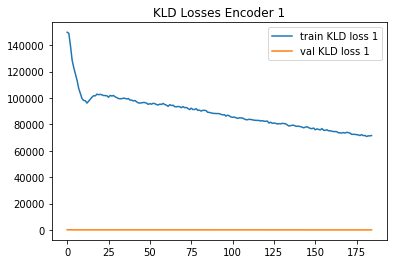

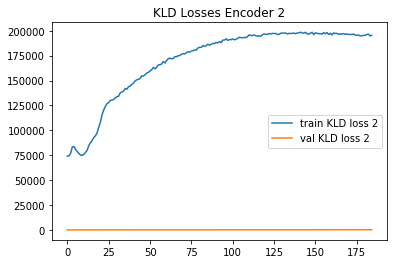

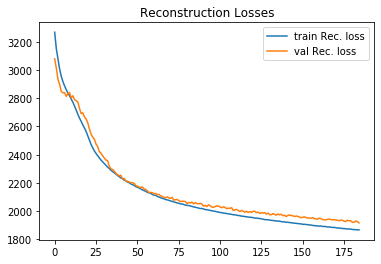

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 191


100%|██████████| 727/727 [00:09<00:00, 75.57it/s]

training_avg_loss=2045.73
 training_avg_kld1=70322.12
 training_avg_kld2=70322.12
 training_avg_rec=1863.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2117.99

Epoch: 192


100%|██████████| 727/727 [00:09<00:00, 74.40it/s]


training_avg_loss=2045.91
 training_avg_kld1=70655.66
 training_avg_kld2=70655.66
 training_avg_rec=1863.03



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2108.57

Epoch: 193


100%|██████████| 727/727 [00:09<00:00, 74.83it/s]

training_avg_loss=2045.95
 training_avg_kld1=70812.66
 training_avg_kld2=70812.66
 training_avg_rec=1862.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2118.99

Epoch: 194


100%|██████████| 727/727 [00:09<00:00, 74.51it/s]

training_avg_loss=2042.36
 training_avg_kld1=69979.47
 training_avg_kld2=69979.47
 training_avg_rec=1860.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2111.34

Epoch: 195


100%|██████████| 727/727 [00:09<00:00, 74.95it/s]

training_avg_loss=2041.31
 training_avg_kld1=69857.88
 training_avg_kld2=69857.88
 training_avg_rec=1859.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2119.25

Epoch: 196


100%|██████████| 727/727 [00:09<00:00, 74.51it/s]


training_avg_loss=2041.02
 training_avg_kld1=69789.61
 training_avg_kld2=69789.61
 training_avg_rec=1858.49



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2104.10

Epoch: 197


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]


training_avg_loss=2039.05
 training_avg_kld1=70044.70
 training_avg_kld2=70044.70
 training_avg_rec=1857.56



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2105.83

Epoch: 198


100%|██████████| 727/727 [00:09<00:00, 74.57it/s]

training_avg_loss=2038.22
 training_avg_kld1=70024.29
 training_avg_kld2=70024.29
 training_avg_rec=1855.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2102.22

Epoch: 199


100%|██████████| 727/727 [00:09<00:00, 74.76it/s]

training_avg_loss=2036.81
 training_avg_kld1=69744.79
 training_avg_kld2=69744.79
 training_avg_rec=1855.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2101.87

Epoch: 200


100%|██████████| 727/727 [00:09<00:00, 74.70it/s]


training_avg_loss=2036.90
 training_avg_kld1=69632.97
 training_avg_kld2=69632.97
 training_avg_rec=1854.96

val_avg_loss=2107.74



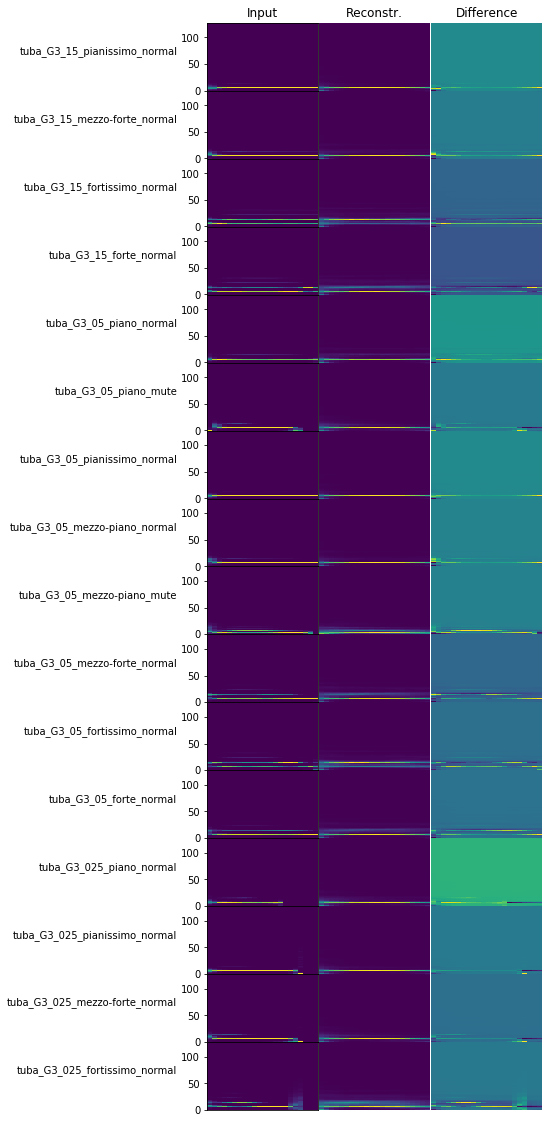

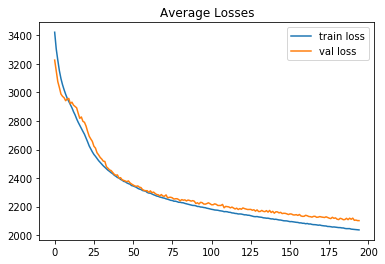

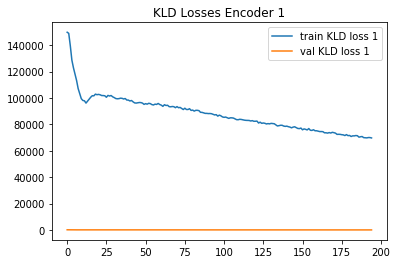

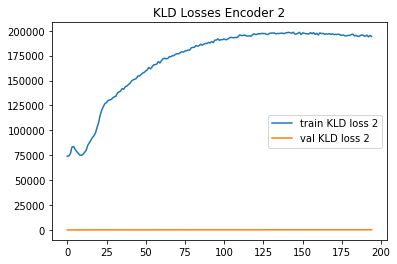

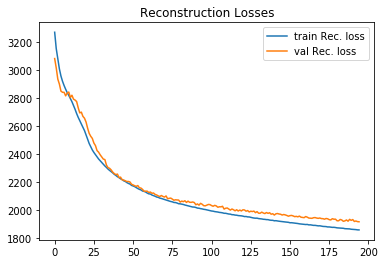

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 201


100%|██████████| 727/727 [00:09<00:00, 75.82it/s]

training_avg_loss=2032.45
 training_avg_kld1=68754.44
 training_avg_kld2=68754.44
 training_avg_rec=1852.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2099.12

Epoch: 202


100%|██████████| 727/727 [00:09<00:00, 74.50it/s]

training_avg_loss=2033.64
 training_avg_kld1=69110.31
 training_avg_kld2=69110.31
 training_avg_rec=1852.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2101.09

Epoch: 203


100%|██████████| 727/727 [00:09<00:00, 74.40it/s]

training_avg_loss=2032.85
 training_avg_kld1=68692.85
 training_avg_kld2=68692.85
 training_avg_rec=1851.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2107.40

Epoch: 204


100%|██████████| 727/727 [00:09<00:00, 74.74it/s]


training_avg_loss=2029.86
 training_avg_kld1=68526.66
 training_avg_kld2=68526.66
 training_avg_rec=1850.22



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2097.43

Epoch: 205


100%|██████████| 727/727 [00:09<00:00, 74.39it/s]

training_avg_loss=2030.95
 training_avg_kld1=68727.60
 training_avg_kld2=68727.60
 training_avg_rec=1849.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2104.14

Epoch: 206


100%|██████████| 727/727 [00:09<00:00, 74.48it/s]

training_avg_loss=2030.06
 training_avg_kld1=68782.96
 training_avg_kld2=68782.96
 training_avg_rec=1849.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2107.68

Epoch: 207


100%|██████████| 727/727 [00:09<00:00, 74.39it/s]

training_avg_loss=2026.62
 training_avg_kld1=67663.02
 training_avg_kld2=67663.02
 training_avg_rec=1846.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2088.43

Epoch: 208


100%|██████████| 727/727 [00:09<00:00, 74.34it/s]

training_avg_loss=2027.74
 training_avg_kld1=68521.94
 training_avg_kld2=68521.94
 training_avg_rec=1846.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2092.03

Epoch: 209


100%|██████████| 727/727 [00:09<00:00, 74.50it/s]

training_avg_loss=2025.65
 training_avg_kld1=68231.37
 training_avg_kld2=68231.37
 training_avg_rec=1845.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2094.17

Epoch: 210


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]


training_avg_loss=2024.32
 training_avg_kld1=67821.06
 training_avg_kld2=67821.06
 training_avg_rec=1844.33

val_avg_loss=2092.79



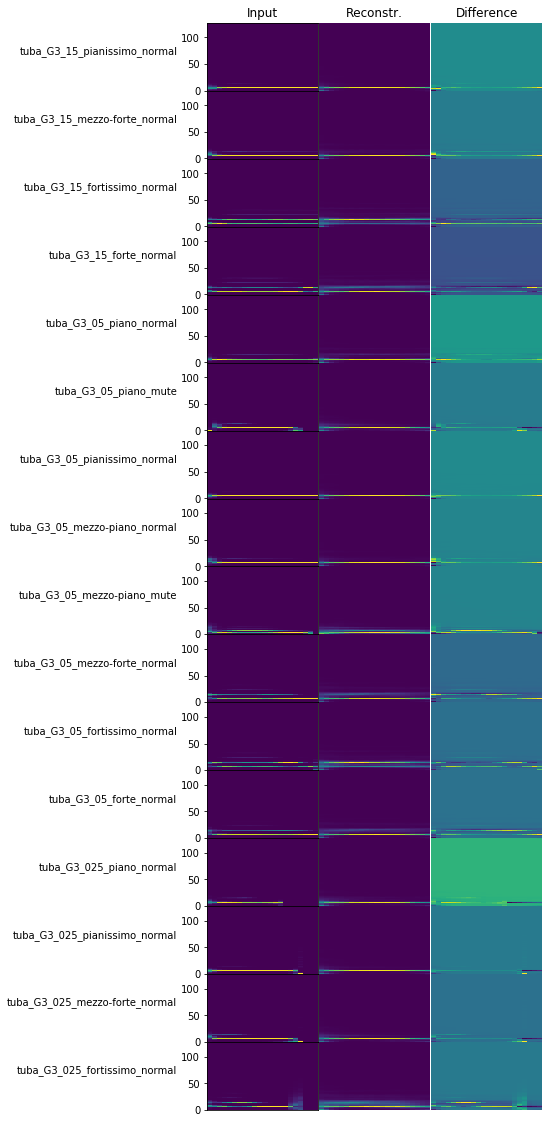

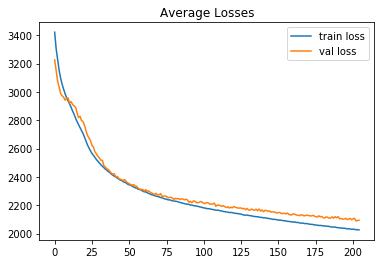

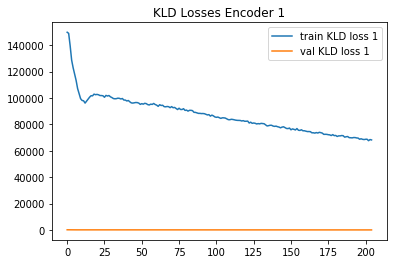

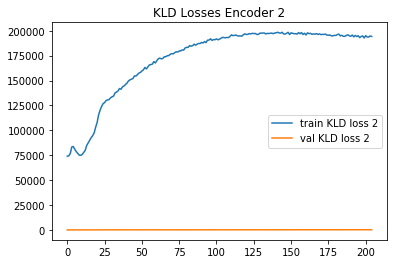

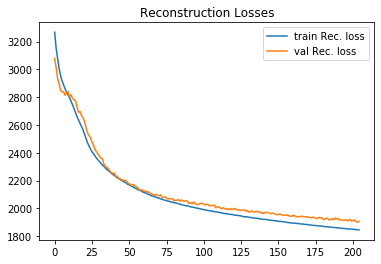

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 211


100%|██████████| 727/727 [00:09<00:00, 75.53it/s]

training_avg_loss=2022.88
 training_avg_kld1=67483.71
 training_avg_kld2=67483.71
 training_avg_rec=1843.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2091.14

Epoch: 212


100%|██████████| 727/727 [00:09<00:00, 74.57it/s]

training_avg_loss=2021.68
 training_avg_kld1=67670.72
 training_avg_kld2=67670.72
 training_avg_rec=1841.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2088.66

Epoch: 213


100%|██████████| 727/727 [00:09<00:00, 74.61it/s]

training_avg_loss=2021.43
 training_avg_kld1=67737.43
 training_avg_kld2=67737.43
 training_avg_rec=1841.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2088.20

Epoch: 214


100%|██████████| 727/727 [00:09<00:00, 74.37it/s]


training_avg_loss=2020.23
 training_avg_kld1=67829.59
 training_avg_kld2=67829.59
 training_avg_rec=1840.42



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2083.41

Epoch: 215


100%|██████████| 727/727 [00:09<00:00, 74.66it/s]


training_avg_loss=2017.84
 training_avg_kld1=66977.02
 training_avg_kld2=66977.02
 training_avg_rec=1839.01



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2092.83

Epoch: 216


100%|██████████| 727/727 [00:09<00:00, 74.30it/s]

training_avg_loss=2017.83
 training_avg_kld1=66792.28
 training_avg_kld2=66792.28
 training_avg_rec=1838.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2086.30

Epoch: 217


100%|██████████| 727/727 [00:09<00:00, 74.60it/s]


training_avg_loss=2017.12
 training_avg_kld1=67024.80
 training_avg_kld2=67024.80
 training_avg_rec=1838.50



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2085.75

Epoch: 218


100%|██████████| 727/727 [00:09<00:00, 74.34it/s]

training_avg_loss=2014.96
 training_avg_kld1=67599.33
 training_avg_kld2=67599.33
 training_avg_rec=1836.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2087.75

Epoch: 219


100%|██████████| 727/727 [00:09<00:00, 74.42it/s]


training_avg_loss=2012.79
 training_avg_kld1=67172.63
 training_avg_kld2=67172.63
 training_avg_rec=1834.42



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2090.33

Epoch: 220


100%|██████████| 727/727 [00:09<00:00, 74.55it/s]

training_avg_loss=2013.08
 training_avg_kld1=66689.14
 training_avg_kld2=66689.14
 training_avg_rec=1834.63



val_avg_loss=2087.54



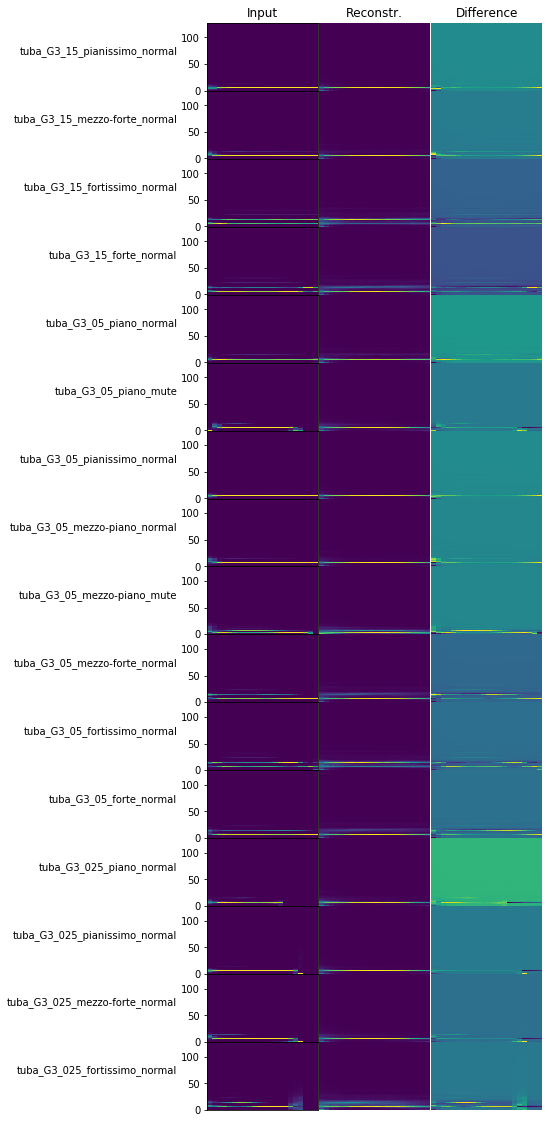

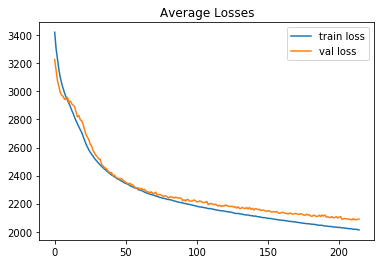

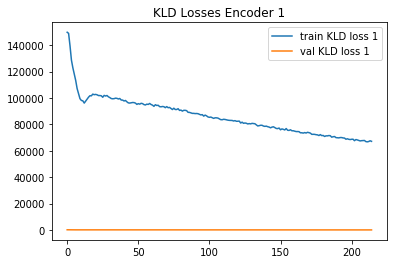

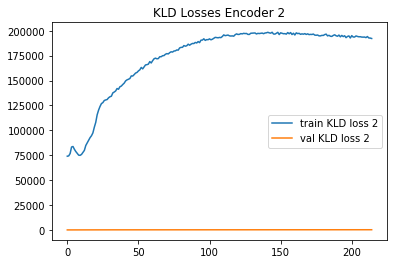

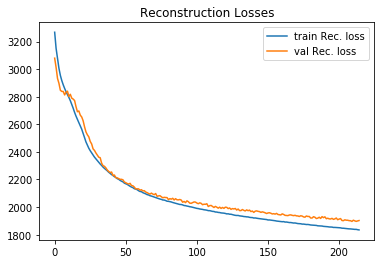

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 221


100%|██████████| 727/727 [00:09<00:00, 79.09it/s]

training_avg_loss=2011.62
 training_avg_kld1=66363.65
 training_avg_kld2=66363.65
 training_avg_rec=1833.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2092.57

Epoch: 222


100%|██████████| 727/727 [00:09<00:00, 74.91it/s]


training_avg_loss=2010.08
 training_avg_kld1=66432.83
 training_avg_kld2=66432.83
 training_avg_rec=1831.48



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2085.85

Epoch: 223


100%|██████████| 727/727 [00:09<00:00, 74.87it/s]


training_avg_loss=2008.47
 training_avg_kld1=65519.03
 training_avg_kld2=65519.03
 training_avg_rec=1830.66



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2090.70

Epoch: 224


100%|██████████| 727/727 [00:09<00:00, 74.68it/s]

training_avg_loss=2008.42
 training_avg_kld1=66188.01
 training_avg_kld2=66188.01
 training_avg_rec=1830.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2081.09

Epoch: 225


100%|██████████| 727/727 [00:09<00:00, 74.68it/s]

training_avg_loss=2005.52
 training_avg_kld1=65713.99
 training_avg_kld2=65713.99
 training_avg_rec=1828.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2081.02

Epoch: 226


100%|██████████| 727/727 [00:09<00:00, 74.45it/s]


training_avg_loss=2006.78
 training_avg_kld1=65505.81
 training_avg_kld2=65505.81
 training_avg_rec=1828.83



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2078.80

Epoch: 227


100%|██████████| 727/727 [00:09<00:00, 74.53it/s]


training_avg_loss=2003.85
 training_avg_kld1=66147.75
 training_avg_kld2=66147.75
 training_avg_rec=1826.38



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2081.46

Epoch: 228


100%|██████████| 727/727 [00:09<00:00, 74.71it/s]


training_avg_loss=2003.91
 training_avg_kld1=65084.10
 training_avg_kld2=65084.10
 training_avg_rec=1826.56



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2079.84

Epoch: 229


100%|██████████| 727/727 [00:09<00:00, 74.57it/s]

training_avg_loss=2001.83
 training_avg_kld1=65118.06
 training_avg_kld2=65118.06
 training_avg_rec=1824.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2079.64

Epoch: 230


100%|██████████| 727/727 [00:09<00:00, 74.68it/s]


training_avg_loss=2002.37
 training_avg_kld1=65361.86
 training_avg_kld2=65361.86
 training_avg_rec=1825.02

val_avg_loss=2081.22



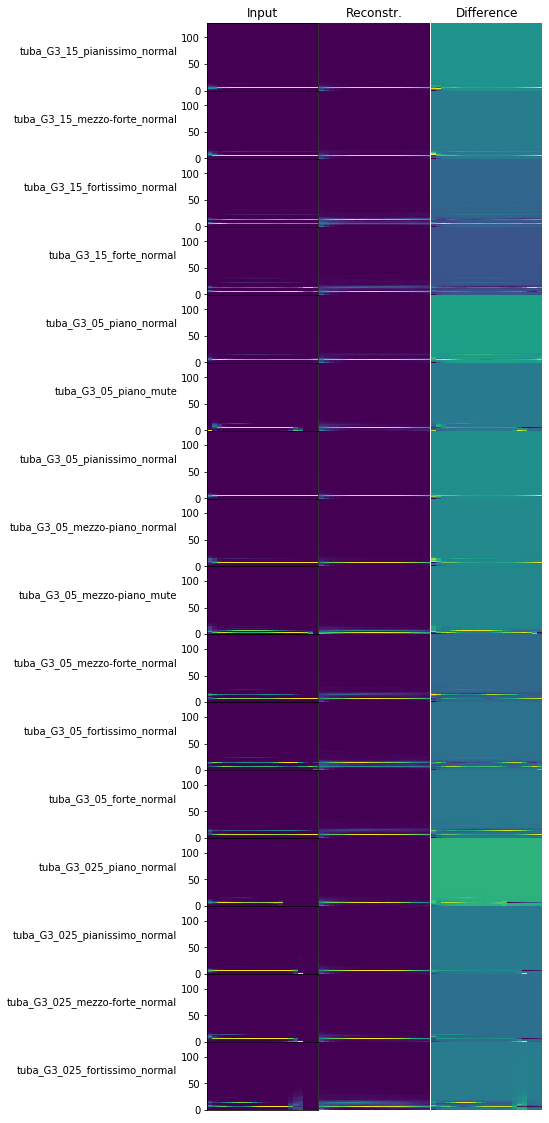

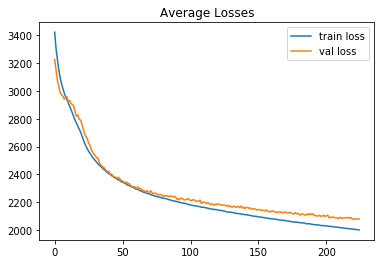

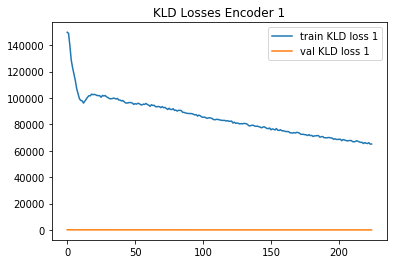

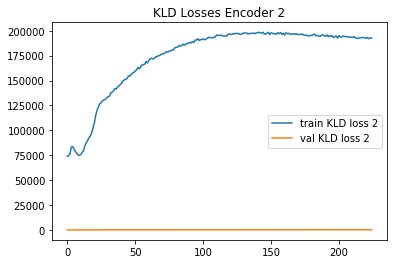

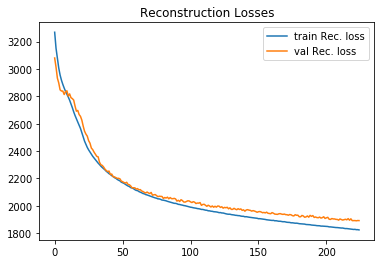

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 231


100%|██████████| 727/727 [00:09<00:00, 78.86it/s]

training_avg_loss=2001.31
 training_avg_kld1=65663.76
 training_avg_kld2=65663.76
 training_avg_rec=1823.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2076.94

Epoch: 232


100%|██████████| 727/727 [00:09<00:00, 74.00it/s]

training_avg_loss=2000.34
 training_avg_kld1=65049.65
 training_avg_kld2=65049.65
 training_avg_rec=1823.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2073.88

Epoch: 233


100%|██████████| 727/727 [00:09<00:00, 74.51it/s]


training_avg_loss=1998.29
 training_avg_kld1=64497.07
 training_avg_kld2=64497.07
 training_avg_rec=1821.67



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2076.95

Epoch: 234


100%|██████████| 727/727 [00:09<00:00, 74.58it/s]

training_avg_loss=1997.28
 training_avg_kld1=65114.04
 training_avg_kld2=65114.04
 training_avg_rec=1820.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2082.46

Epoch: 235


100%|██████████| 727/727 [00:09<00:00, 74.73it/s]


training_avg_loss=1996.33
 training_avg_kld1=64709.77
 training_avg_kld2=64709.77
 training_avg_rec=1819.60



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2081.01

Epoch: 236


100%|██████████| 727/727 [00:09<00:00, 74.10it/s]

training_avg_loss=1995.50
 training_avg_kld1=64666.37
 training_avg_kld2=64666.37
 training_avg_rec=1818.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2069.40

Epoch: 237


100%|██████████| 727/727 [00:09<00:00, 74.81it/s]


training_avg_loss=1994.06
 training_avg_kld1=64299.64
 training_avg_kld2=64299.64
 training_avg_rec=1817.97



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2074.50

Epoch: 238


100%|██████████| 727/727 [00:09<00:00, 74.94it/s]


training_avg_loss=1993.14
 training_avg_kld1=64739.04
 training_avg_kld2=64739.04
 training_avg_rec=1816.73



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2071.82

Epoch: 239


100%|██████████| 727/727 [00:09<00:00, 74.80it/s]

training_avg_loss=1992.19
 training_avg_kld1=63638.25
 training_avg_kld2=63638.25
 training_avg_rec=1815.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2070.98

Epoch: 240


100%|██████████| 727/727 [00:09<00:00, 75.00it/s]


training_avg_loss=1990.83
 training_avg_kld1=64338.68
 training_avg_kld2=64338.68
 training_avg_rec=1814.68

val_avg_loss=2065.94



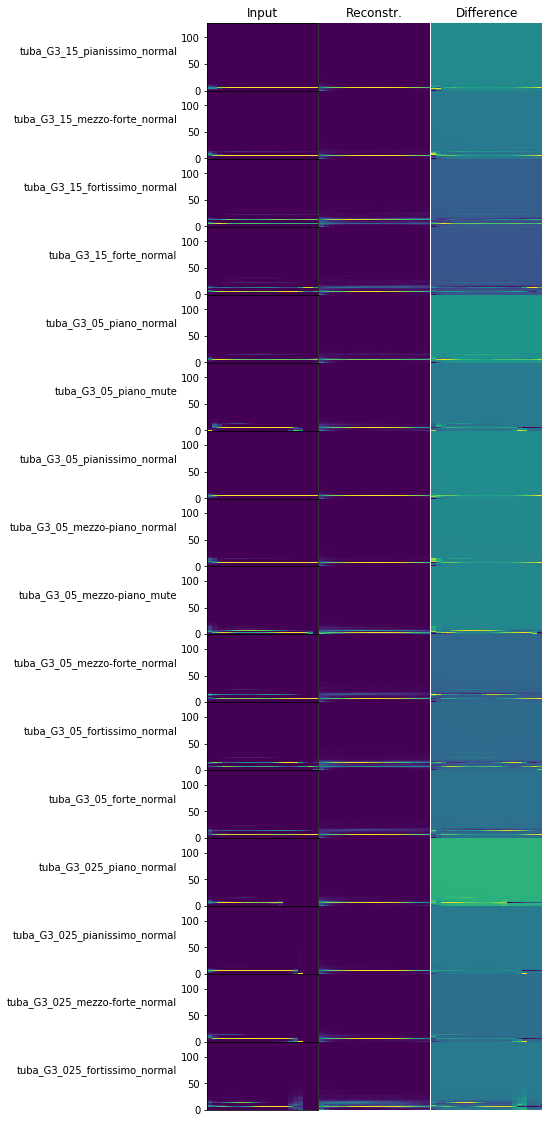

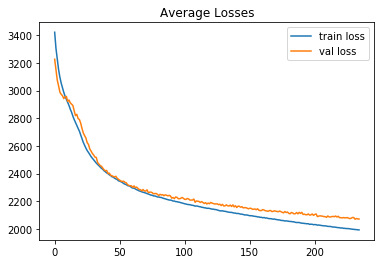

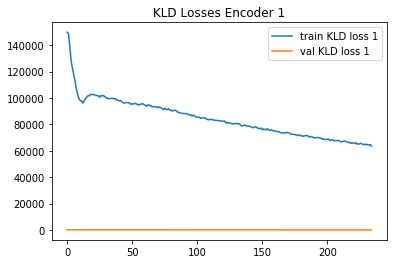

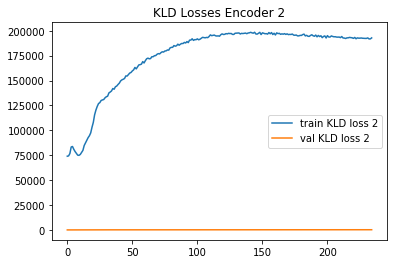

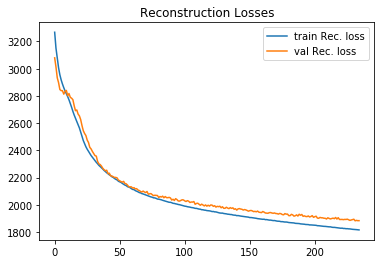

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 241


100%|██████████| 727/727 [00:09<00:00, 79.08it/s]

training_avg_loss=1990.99
 training_avg_kld1=64286.50
 training_avg_kld2=64286.50
 training_avg_rec=1814.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2075.84

Epoch: 242


100%|██████████| 727/727 [00:09<00:00, 74.53it/s]

training_avg_loss=1989.57
 training_avg_kld1=63837.19
 training_avg_kld2=63837.19
 training_avg_rec=1812.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2071.08

Epoch: 243


100%|██████████| 727/727 [00:09<00:00, 74.34it/s]

training_avg_loss=1987.78
 training_avg_kld1=63460.56
 training_avg_kld2=63460.56
 training_avg_rec=1812.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2068.00

Epoch: 244


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]

training_avg_loss=1986.25
 training_avg_kld1=63269.54
 training_avg_kld2=63269.54
 training_avg_rec=1810.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2069.10

Epoch: 245


100%|██████████| 727/727 [00:09<00:00, 74.37it/s]


training_avg_loss=1984.47
 training_avg_kld1=62875.26
 training_avg_kld2=62875.26
 training_avg_rec=1809.49



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2067.33

Epoch: 246


100%|██████████| 727/727 [00:09<00:00, 74.30it/s]

training_avg_loss=1984.84
 training_avg_kld1=63354.74
 training_avg_kld2=63354.74
 training_avg_rec=1809.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2065.45

Epoch: 247


100%|██████████| 727/727 [00:09<00:00, 74.68it/s]

training_avg_loss=1983.31
 training_avg_kld1=63136.73
 training_avg_kld2=63136.73
 training_avg_rec=1808.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2064.78

Epoch: 248


100%|██████████| 727/727 [00:09<00:00, 74.49it/s]

training_avg_loss=1981.81
 training_avg_kld1=62828.05
 training_avg_kld2=62828.05
 training_avg_rec=1807.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2066.37

Epoch: 249


100%|██████████| 727/727 [00:09<00:00, 74.64it/s]

training_avg_loss=1981.39
 training_avg_kld1=63300.02
 training_avg_kld2=63300.02
 training_avg_rec=1806.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2068.24

Epoch: 250


100%|██████████| 727/727 [00:09<00:00, 74.46it/s]


training_avg_loss=1980.48
 training_avg_kld1=63111.68
 training_avg_kld2=63111.68
 training_avg_rec=1805.18

val_avg_loss=2071.44



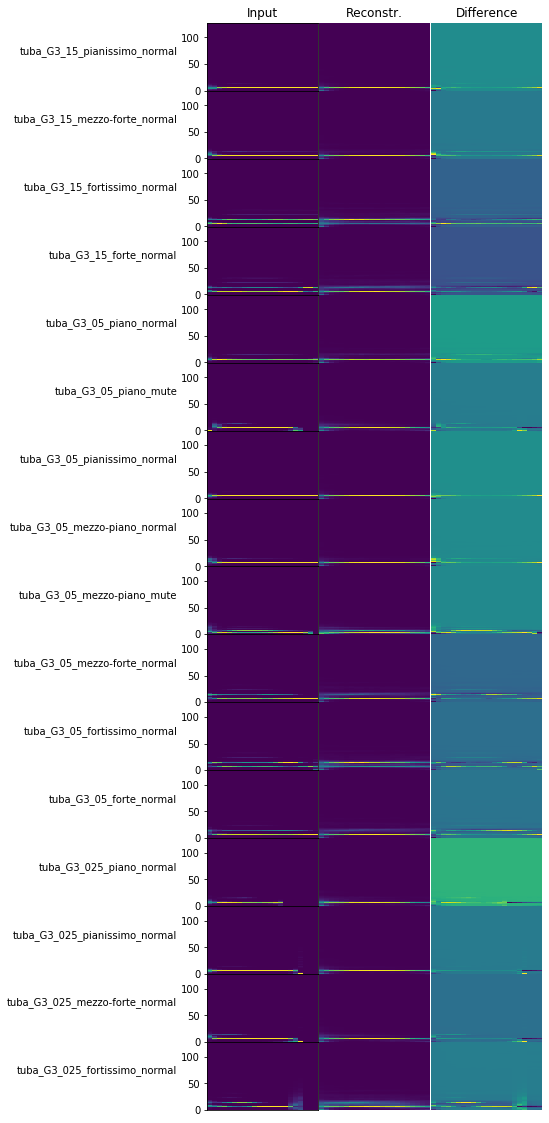

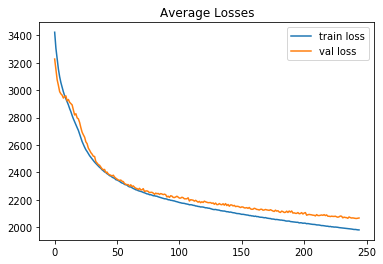

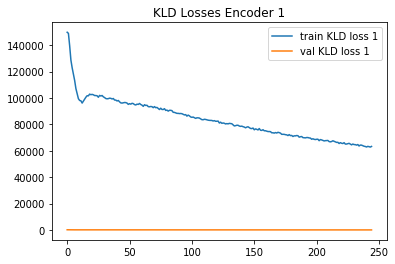

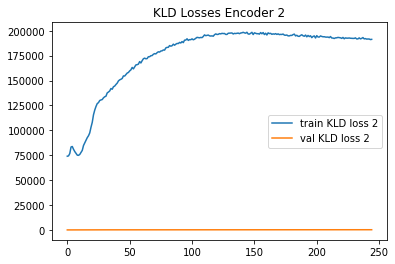

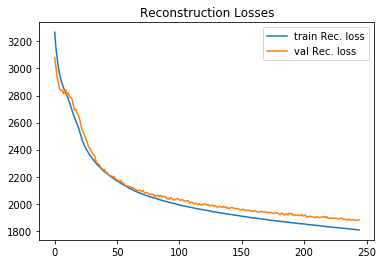

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 251


100%|██████████| 727/727 [00:09<00:00, 75.35it/s]

training_avg_loss=1979.22
 training_avg_kld1=62943.23
 training_avg_kld2=62943.23
 training_avg_rec=1804.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2065.32

Epoch: 252


100%|██████████| 727/727 [00:09<00:00, 74.30it/s]

training_avg_loss=1977.61
 training_avg_kld1=62161.12
 training_avg_kld2=62161.12
 training_avg_rec=1803.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2058.62

Epoch: 253


100%|██████████| 727/727 [00:09<00:00, 74.56it/s]


training_avg_loss=1977.95
 training_avg_kld1=62575.80
 training_avg_kld2=62575.80
 training_avg_rec=1803.19



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2057.44

Epoch: 254


100%|██████████| 727/727 [00:09<00:00, 74.42it/s]

training_avg_loss=1977.07
 training_avg_kld1=62874.32
 training_avg_kld2=62874.32
 training_avg_rec=1802.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2065.20

Epoch: 255


100%|██████████| 727/727 [00:09<00:00, 74.40it/s]

training_avg_loss=1975.51
 training_avg_kld1=62310.95
 training_avg_kld2=62310.95
 training_avg_rec=1800.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2061.66

Epoch: 256


100%|██████████| 727/727 [00:09<00:00, 74.84it/s]

training_avg_loss=1973.65
 training_avg_kld1=61503.80
 training_avg_kld2=61503.80
 training_avg_rec=1800.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2066.02

Epoch: 257


100%|██████████| 727/727 [00:09<00:00, 74.94it/s]

training_avg_loss=1974.06
 training_avg_kld1=61797.65
 training_avg_kld2=61797.65
 training_avg_rec=1799.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2060.11

Epoch: 258


100%|██████████| 727/727 [00:09<00:00, 74.39it/s]


training_avg_loss=1972.07
 training_avg_kld1=61734.71
 training_avg_kld2=61734.71
 training_avg_rec=1797.96



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2054.43

Epoch: 259


100%|██████████| 727/727 [00:09<00:00, 74.72it/s]

training_avg_loss=1971.69
 training_avg_kld1=62120.72
 training_avg_kld2=62120.72
 training_avg_rec=1797.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2058.00

Epoch: 260


100%|██████████| 727/727 [00:09<00:00, 74.26it/s]

training_avg_loss=1969.81
 training_avg_kld1=62026.62
 training_avg_kld2=62026.62
 training_avg_rec=1796.18



val_avg_loss=2059.19



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

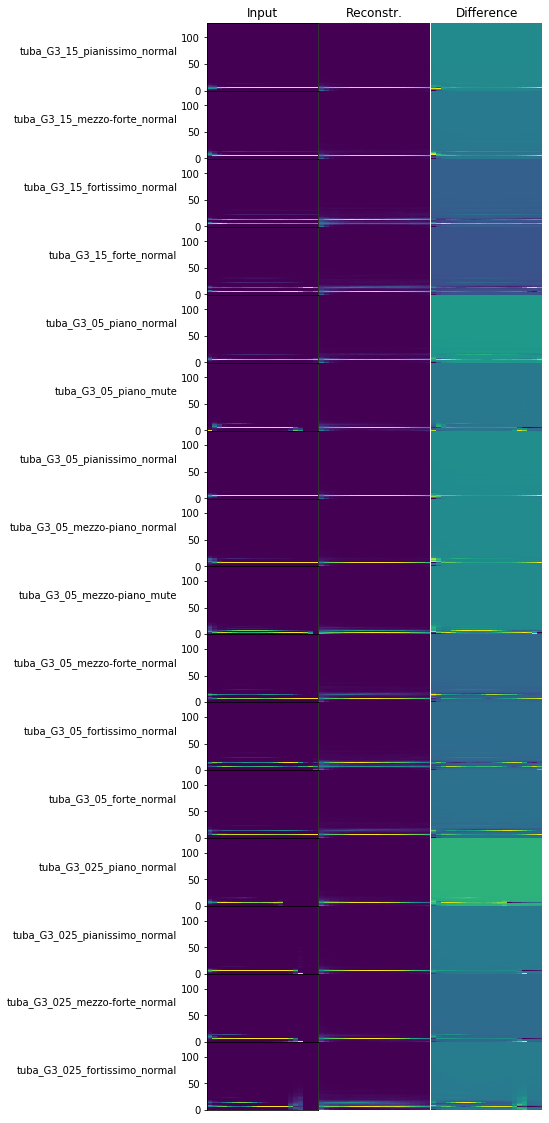

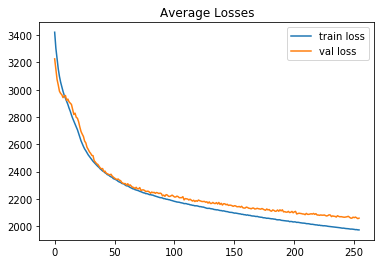

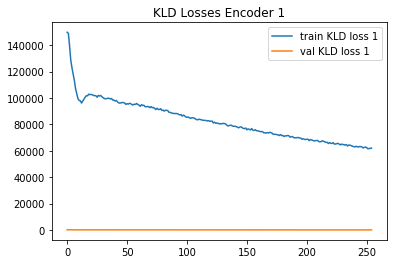

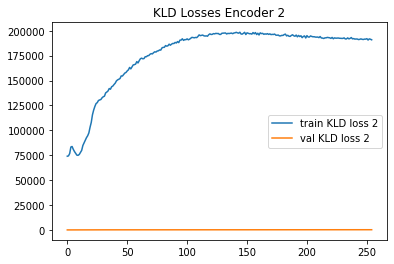

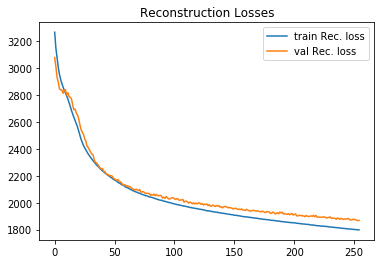

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 261


100%|██████████| 727/727 [00:09<00:00, 75.51it/s]

training_avg_loss=1969.49
 training_avg_kld1=61762.06
 training_avg_kld2=61762.06
 training_avg_rec=1795.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2052.02

Epoch: 262


100%|██████████| 727/727 [00:09<00:00, 74.24it/s]


training_avg_loss=1967.12
 training_avg_kld1=61957.27
 training_avg_kld2=61957.27
 training_avg_rec=1793.99



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2058.52

Epoch: 263


100%|██████████| 727/727 [00:09<00:00, 74.09it/s]

training_avg_loss=1967.50
 training_avg_kld1=61362.81
 training_avg_kld2=61362.81
 training_avg_rec=1793.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2058.21

Epoch: 264


100%|██████████| 727/727 [00:09<00:00, 74.42it/s]

training_avg_loss=1966.23
 training_avg_kld1=61432.61
 training_avg_kld2=61432.61
 training_avg_rec=1793.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2054.84

Epoch: 265


100%|██████████| 727/727 [00:09<00:00, 74.13it/s]

training_avg_loss=1964.80
 training_avg_kld1=60995.18
 training_avg_kld2=60995.18
 training_avg_rec=1792.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2056.26

Epoch: 266


100%|██████████| 727/727 [00:09<00:00, 74.23it/s]

training_avg_loss=1964.06
 training_avg_kld1=61177.69
 training_avg_kld2=61177.69
 training_avg_rec=1791.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2059.62

Epoch: 267


100%|██████████| 727/727 [00:09<00:00, 74.30it/s]


training_avg_loss=1962.67
 training_avg_kld1=60803.45
 training_avg_kld2=60803.45
 training_avg_rec=1790.08



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2055.98

Epoch: 268


100%|██████████| 727/727 [00:09<00:00, 74.43it/s]

training_avg_loss=1963.17
 training_avg_kld1=61276.10
 training_avg_kld2=61276.10
 training_avg_rec=1790.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2054.66

Epoch: 269


100%|██████████| 727/727 [00:09<00:00, 74.03it/s]


training_avg_loss=1960.81
 training_avg_kld1=60883.41
 training_avg_kld2=60883.41
 training_avg_rec=1787.80



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2050.16

Epoch: 270


100%|██████████| 727/727 [00:09<00:00, 73.95it/s]

training_avg_loss=1960.52
 training_avg_kld1=61121.02
 training_avg_kld2=61121.02
 training_avg_rec=1787.49



val_avg_loss=2050.05



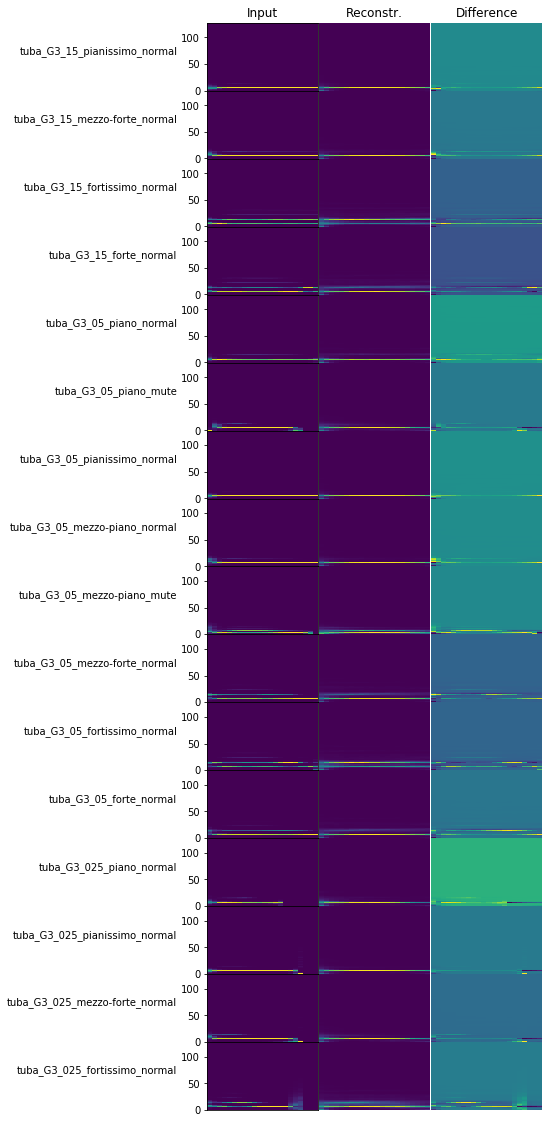

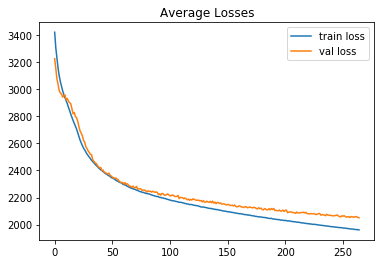

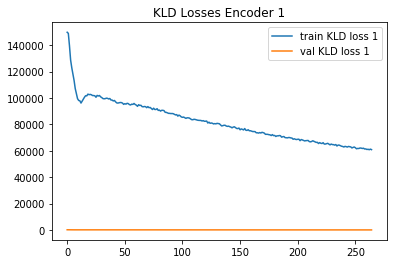

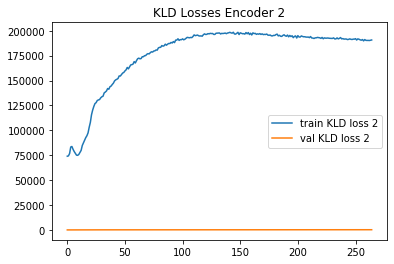

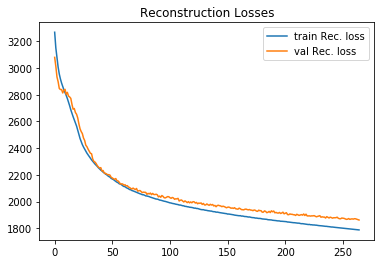

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 271


100%|██████████| 727/727 [00:09<00:00, 78.48it/s]

training_avg_loss=1960.49
 training_avg_kld1=60607.17
 training_avg_kld2=60607.17
 training_avg_rec=1787.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2048.30

Epoch: 272


100%|██████████| 727/727 [00:09<00:00, 73.87it/s]

training_avg_loss=1959.28
 training_avg_kld1=60526.92
 training_avg_kld2=60526.92
 training_avg_rec=1786.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2052.26

Epoch: 273


100%|██████████| 727/727 [00:09<00:00, 74.36it/s]

training_avg_loss=1957.44
 training_avg_kld1=60970.80
 training_avg_kld2=60970.80
 training_avg_rec=1785.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2048.57

Epoch: 274


100%|██████████| 727/727 [00:09<00:00, 74.00it/s]

training_avg_loss=1956.70
 training_avg_kld1=60031.08
 training_avg_kld2=60031.08
 training_avg_rec=1784.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2046.20

Epoch: 275


100%|██████████| 727/727 [00:09<00:00, 74.35it/s]

training_avg_loss=1955.69
 training_avg_kld1=59979.53
 training_avg_kld2=59979.53
 training_avg_rec=1783.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2042.71

Epoch: 276


100%|██████████| 727/727 [00:09<00:00, 74.15it/s]


training_avg_loss=1953.84
 training_avg_kld1=60071.70
 training_avg_kld2=60071.70
 training_avg_rec=1782.03



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2043.95

Epoch: 277


100%|██████████| 727/727 [00:09<00:00, 74.09it/s]

training_avg_loss=1954.02
 training_avg_kld1=59954.86
 training_avg_kld2=59954.86
 training_avg_rec=1781.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2039.63

Epoch: 278


100%|██████████| 727/727 [00:09<00:00, 74.13it/s]

training_avg_loss=1952.79
 training_avg_kld1=59839.13
 training_avg_kld2=59839.13
 training_avg_rec=1781.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2042.47

Epoch: 279


100%|██████████| 727/727 [00:09<00:00, 73.90it/s]

training_avg_loss=1951.61
 training_avg_kld1=59822.52
 training_avg_kld2=59822.52
 training_avg_rec=1779.89




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2042.54

Epoch: 280


100%|██████████| 727/727 [00:09<00:00, 74.26it/s]

training_avg_loss=1951.39
 training_avg_kld1=59421.47
 training_avg_kld2=59421.47
 training_avg_rec=1779.81



val_avg_loss=2045.34



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

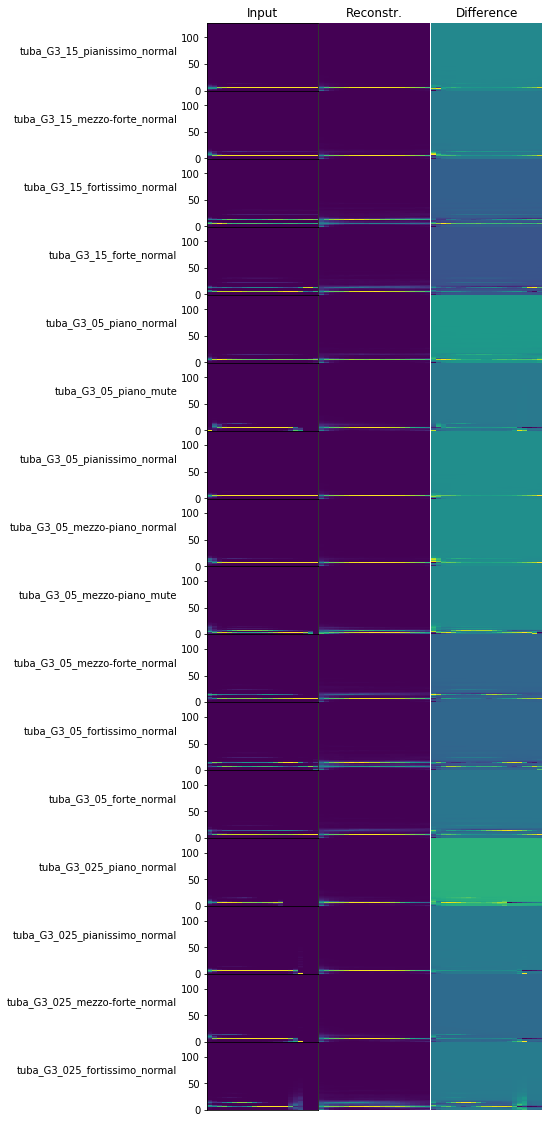

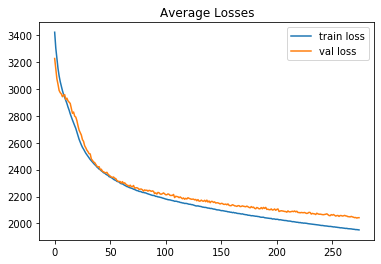

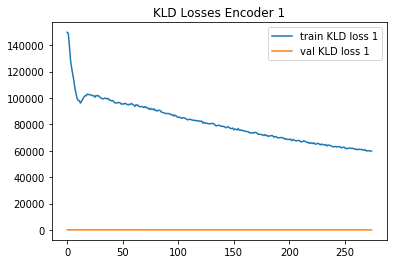

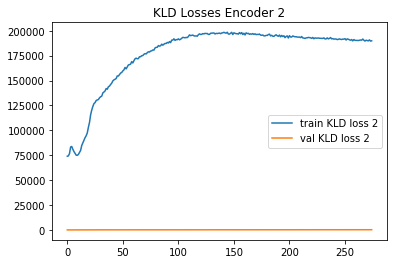

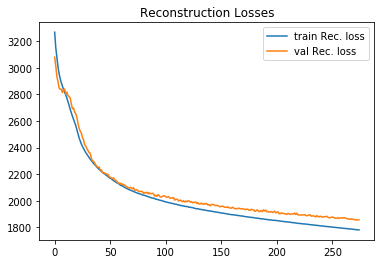

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 281


100%|██████████| 727/727 [00:09<00:00, 75.19it/s]

training_avg_loss=1950.27
 training_avg_kld1=59659.59
 training_avg_kld2=59659.59
 training_avg_rec=1778.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2046.80

Epoch: 282


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]


training_avg_loss=1948.59
 training_avg_kld1=59135.84
 training_avg_kld2=59135.84
 training_avg_rec=1777.49



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2041.00

Epoch: 283


100%|██████████| 727/727 [00:09<00:00, 74.58it/s]

training_avg_loss=1947.29
 training_avg_kld1=59138.62
 training_avg_kld2=59138.62
 training_avg_rec=1776.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2042.66

Epoch: 284


100%|██████████| 727/727 [00:09<00:00, 74.27it/s]


training_avg_loss=1947.41
 training_avg_kld1=59191.51
 training_avg_kld2=59191.51
 training_avg_rec=1775.58



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2044.22

Epoch: 285


100%|██████████| 727/727 [00:09<00:00, 74.41it/s]


training_avg_loss=1946.29
 training_avg_kld1=58798.62
 training_avg_kld2=58798.62
 training_avg_rec=1775.41



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2045.10

Epoch: 286


100%|██████████| 727/727 [00:09<00:00, 74.50it/s]

training_avg_loss=1946.68
 training_avg_kld1=59308.02
 training_avg_kld2=59308.02
 training_avg_rec=1775.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2040.57

Epoch: 287


100%|██████████| 727/727 [00:09<00:00, 74.34it/s]


training_avg_loss=1943.76
 training_avg_kld1=58968.99
 training_avg_kld2=58968.99
 training_avg_rec=1773.58



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2046.94

Epoch: 288


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]

training_avg_loss=1944.53
 training_avg_kld1=59440.53
 training_avg_kld2=59440.53
 training_avg_rec=1773.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2040.31

Epoch: 289


100%|██████████| 727/727 [00:09<00:00, 74.22it/s]

training_avg_loss=1944.45
 training_avg_kld1=59133.56
 training_avg_kld2=59133.56
 training_avg_rec=1773.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2036.58

Epoch: 290


100%|██████████| 727/727 [00:09<00:00, 74.04it/s]

training_avg_loss=1942.59
 training_avg_kld1=59484.50
 training_avg_kld2=59484.50
 training_avg_rec=1771.72



val_avg_loss=2039.35



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

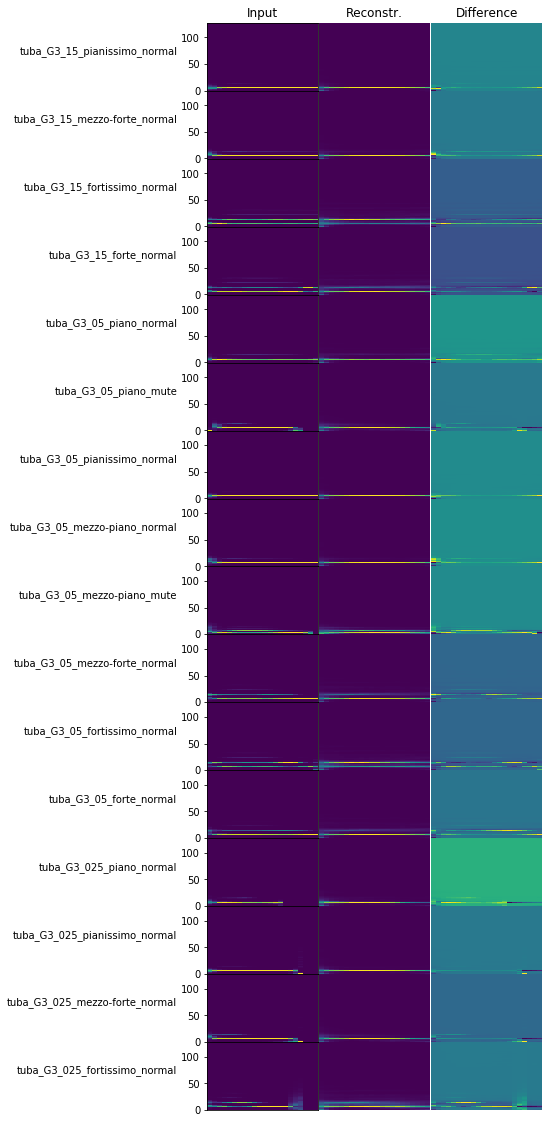

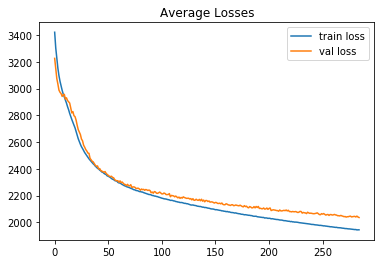

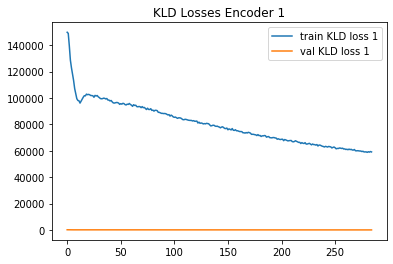

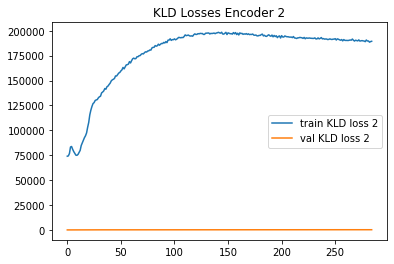

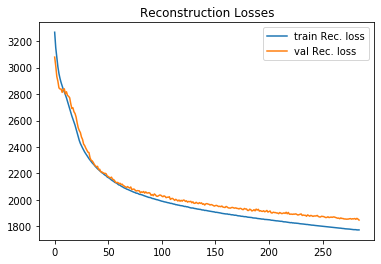

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 291


100%|██████████| 727/727 [00:09<00:00, 78.58it/s]

training_avg_loss=1942.15
 training_avg_kld1=58909.71
 training_avg_kld2=58909.71
 training_avg_rec=1772.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2038.60

Epoch: 292


100%|██████████| 727/727 [00:09<00:00, 74.42it/s]

training_avg_loss=1941.58
 training_avg_kld1=59213.74
 training_avg_kld2=59213.74
 training_avg_rec=1770.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2033.95

Epoch: 293


100%|██████████| 727/727 [00:09<00:00, 74.69it/s]


training_avg_loss=1940.83
 training_avg_kld1=59279.23
 training_avg_kld2=59279.23
 training_avg_rec=1770.47



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2036.03

Epoch: 294


100%|██████████| 727/727 [00:09<00:00, 73.87it/s]

training_avg_loss=1940.06
 training_avg_kld1=58892.43
 training_avg_kld2=58892.43
 training_avg_rec=1769.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2033.87

Epoch: 295


100%|██████████| 727/727 [00:09<00:00, 74.38it/s]

training_avg_loss=1939.68
 training_avg_kld1=58743.62
 training_avg_kld2=58743.62
 training_avg_rec=1768.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2037.57

Epoch: 296


100%|██████████| 727/727 [00:09<00:00, 74.75it/s]

training_avg_loss=1938.87
 training_avg_kld1=58920.47
 training_avg_kld2=58920.47
 training_avg_rec=1768.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2037.16

Epoch: 297


100%|██████████| 727/727 [00:09<00:00, 74.43it/s]


training_avg_loss=1937.38
 training_avg_kld1=58813.84
 training_avg_kld2=58813.84
 training_avg_rec=1766.86



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2032.33

Epoch: 298


100%|██████████| 727/727 [00:09<00:00, 74.22it/s]


training_avg_loss=1935.66
 training_avg_kld1=58386.75
 training_avg_kld2=58386.75
 training_avg_rec=1765.88



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2027.82

Epoch: 299


100%|██████████| 727/727 [00:09<00:00, 74.43it/s]


training_avg_loss=1935.64
 training_avg_kld1=58363.70
 training_avg_kld2=58363.70
 training_avg_rec=1765.62



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2029.50

Epoch: 300


100%|██████████| 727/727 [00:09<00:00, 74.15it/s]

training_avg_loss=1934.41
 training_avg_kld1=58630.34
 training_avg_kld2=58630.34
 training_avg_rec=1764.95



val_avg_loss=2032.55



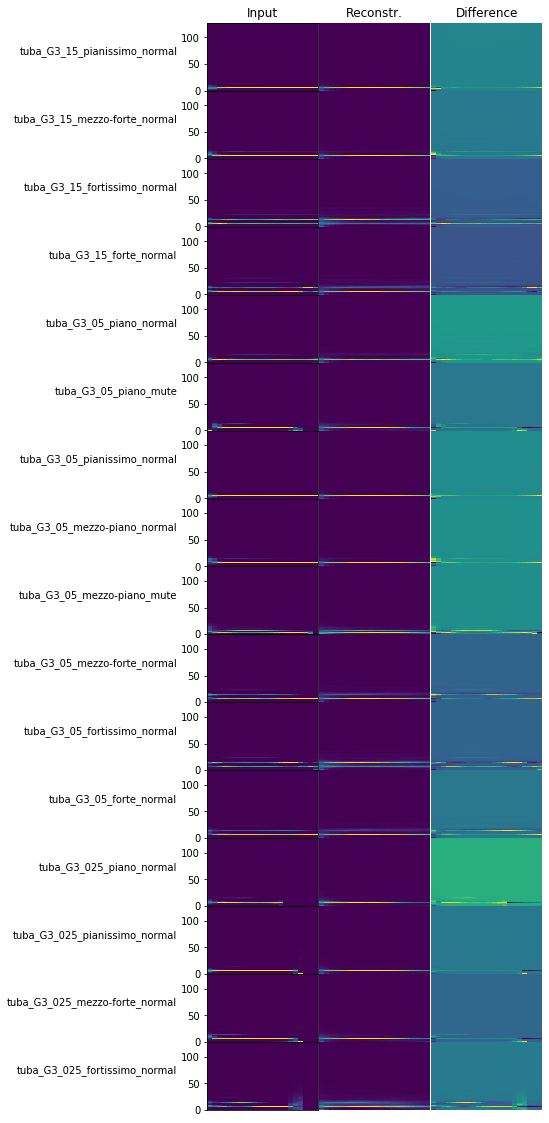

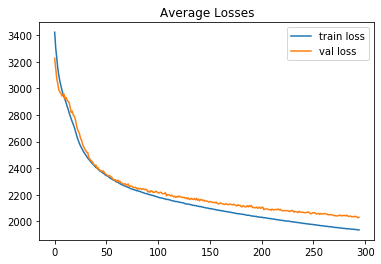

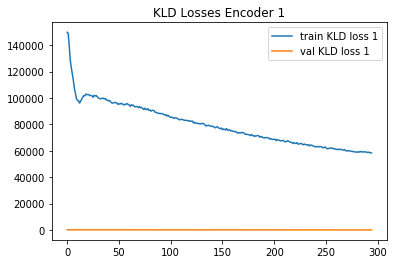

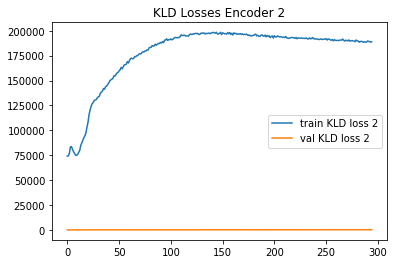

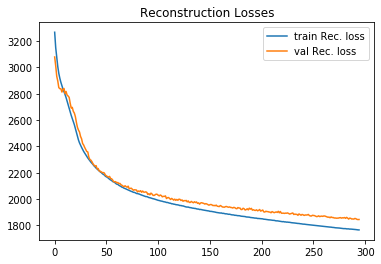

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 301


100%|██████████| 727/727 [00:09<00:00, 75.41it/s]

training_avg_loss=1933.61
 training_avg_kld1=58319.76
 training_avg_kld2=58319.76
 training_avg_rec=1764.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2029.44

Epoch: 302


100%|██████████| 727/727 [00:09<00:00, 74.14it/s]

training_avg_loss=1933.39
 training_avg_kld1=58461.29
 training_avg_kld2=58461.29
 training_avg_rec=1763.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2031.02

Epoch: 303


100%|██████████| 727/727 [00:09<00:00, 74.27it/s]


training_avg_loss=1931.86
 training_avg_kld1=58352.25
 training_avg_kld2=58352.25
 training_avg_rec=1762.76



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2025.37

Epoch: 304


100%|██████████| 727/727 [00:09<00:00, 74.42it/s]

training_avg_loss=1931.81
 training_avg_kld1=58455.36
 training_avg_kld2=58455.36
 training_avg_rec=1762.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2031.31

Epoch: 305


100%|██████████| 727/727 [00:09<00:00, 74.07it/s]

training_avg_loss=1930.97
 training_avg_kld1=58160.36
 training_avg_kld2=58160.36
 training_avg_rec=1761.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2033.89

Epoch: 306


100%|██████████| 727/727 [00:09<00:00, 73.90it/s]

training_avg_loss=1929.47
 training_avg_kld1=57510.97
 training_avg_kld2=57510.97
 training_avg_rec=1760.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2033.59

Epoch: 307


100%|██████████| 727/727 [00:09<00:00, 74.25it/s]

training_avg_loss=1929.62
 training_avg_kld1=58295.93
 training_avg_kld2=58295.93
 training_avg_rec=1760.40




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2026.55

Epoch: 308


100%|██████████| 727/727 [00:09<00:00, 73.95it/s]

training_avg_loss=1928.13
 training_avg_kld1=57967.41
 training_avg_kld2=57967.41
 training_avg_rec=1759.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2028.03

Epoch: 309


100%|██████████| 727/727 [00:09<00:00, 74.24it/s]

training_avg_loss=1927.91
 training_avg_kld1=58024.37
 training_avg_kld2=58024.37
 training_avg_rec=1758.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2029.81

Epoch: 310


100%|██████████| 727/727 [00:09<00:00, 74.56it/s]

training_avg_loss=1927.86
 training_avg_kld1=57977.85
 training_avg_kld2=57977.85
 training_avg_rec=1758.63



val_avg_loss=2030.21



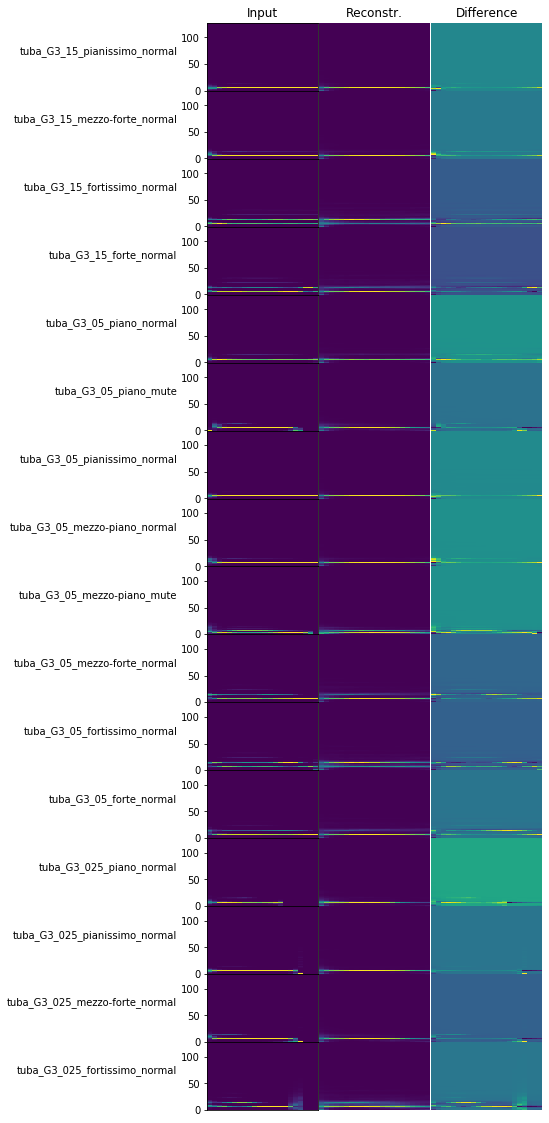

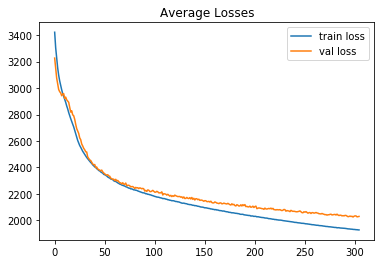

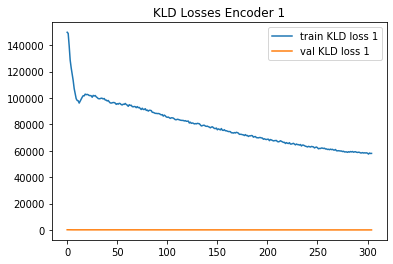

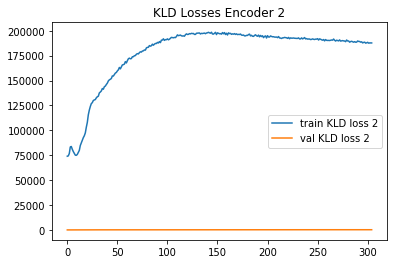

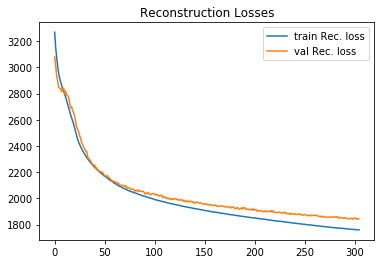

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 311


100%|██████████| 727/727 [00:09<00:00, 75.28it/s]

training_avg_loss=1926.75
 training_avg_kld1=58301.00
 training_avg_kld2=58301.00
 training_avg_rec=1757.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2027.15

Epoch: 312


100%|██████████| 727/727 [00:09<00:00, 74.23it/s]


training_avg_loss=1925.22
 training_avg_kld1=57680.90
 training_avg_kld2=57680.90
 training_avg_rec=1756.69



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2025.04

Epoch: 313


100%|██████████| 727/727 [00:09<00:00, 74.05it/s]

training_avg_loss=1925.06
 training_avg_kld1=57876.76
 training_avg_kld2=57876.76
 training_avg_rec=1756.25




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2028.05

Epoch: 314


100%|██████████| 727/727 [00:09<00:00, 73.91it/s]


training_avg_loss=1924.14
 training_avg_kld1=57408.44
 training_avg_kld2=57408.44
 training_avg_rec=1755.56



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2028.98

Epoch: 315


100%|██████████| 727/727 [00:09<00:00, 74.21it/s]

training_avg_loss=1922.74
 training_avg_kld1=57349.72
 training_avg_kld2=57349.72
 training_avg_rec=1754.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2026.49

Epoch: 316


100%|██████████| 727/727 [00:09<00:00, 74.50it/s]

training_avg_loss=1923.17
 training_avg_kld1=57986.87
 training_avg_kld2=57986.87
 training_avg_rec=1754.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2021.57

Epoch: 317


100%|██████████| 727/727 [00:09<00:00, 73.91it/s]

training_avg_loss=1922.76
 training_avg_kld1=57110.94
 training_avg_kld2=57110.94
 training_avg_rec=1754.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2027.75

Epoch: 318


100%|██████████| 727/727 [00:09<00:00, 74.32it/s]


training_avg_loss=1921.34
 training_avg_kld1=57743.90
 training_avg_kld2=57743.90
 training_avg_rec=1753.05



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2024.43

Epoch: 319


100%|██████████| 727/727 [00:09<00:00, 74.41it/s]

training_avg_loss=1921.93
 training_avg_kld1=57636.15
 training_avg_kld2=57636.15
 training_avg_rec=1753.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2024.67

Epoch: 320


100%|██████████| 727/727 [00:09<00:00, 74.24it/s]


training_avg_loss=1920.37
 training_avg_kld1=57329.01
 training_avg_kld2=57329.01
 training_avg_rec=1752.34

val_avg_loss=2023.25



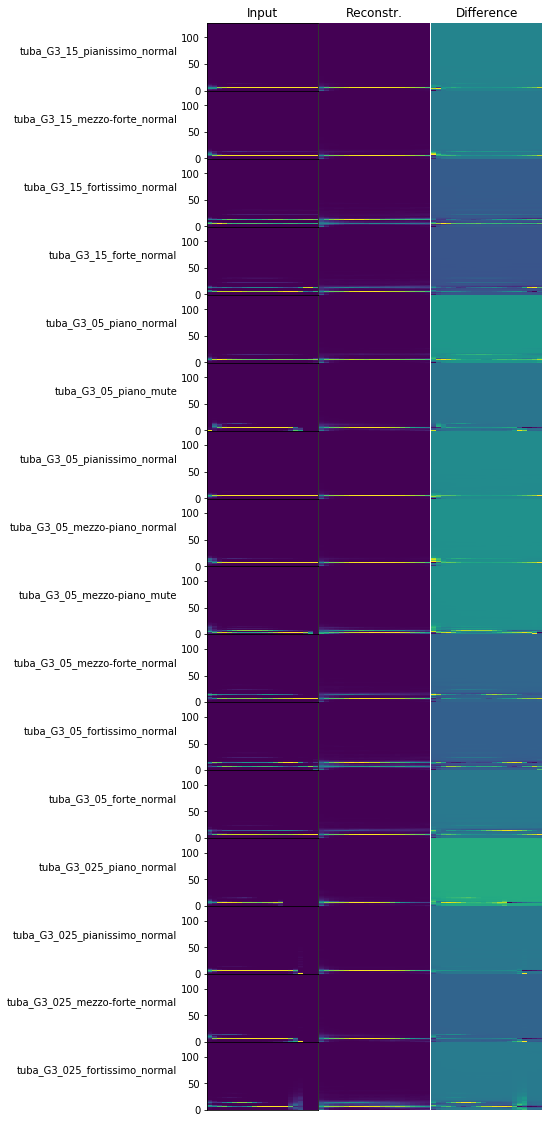

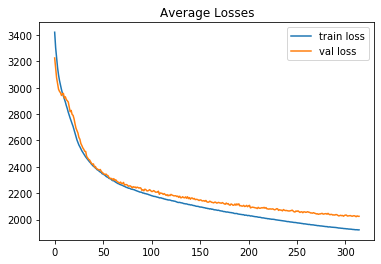

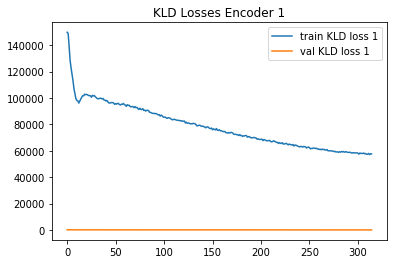

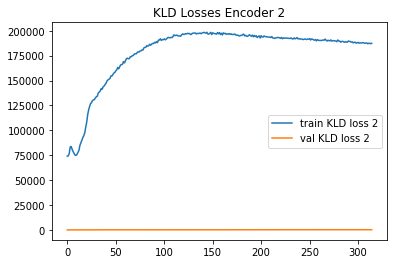

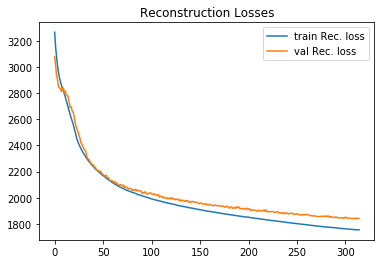

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 321


100%|██████████| 727/727 [00:09<00:00, 78.58it/s]

training_avg_loss=1919.41
 training_avg_kld1=57655.03
 training_avg_kld2=57655.03
 training_avg_rec=1751.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2023.52

Epoch: 322


100%|██████████| 727/727 [00:09<00:00, 74.02it/s]


training_avg_loss=1919.67
 training_avg_kld1=57492.24
 training_avg_kld2=57492.24
 training_avg_rec=1751.13



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2023.37

Epoch: 323


100%|██████████| 727/727 [00:09<00:00, 74.51it/s]

training_avg_loss=1918.36
 training_avg_kld1=57243.34
 training_avg_kld2=57243.34
 training_avg_rec=1750.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2021.68

Epoch: 324


100%|██████████| 727/727 [00:09<00:00, 74.20it/s]


training_avg_loss=1918.38
 training_avg_kld1=57613.36
 training_avg_kld2=57613.36
 training_avg_rec=1750.11



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2026.75

Epoch: 325


100%|██████████| 727/727 [00:09<00:00, 74.03it/s]

training_avg_loss=1917.92
 training_avg_kld1=57044.77
 training_avg_kld2=57044.77
 training_avg_rec=1749.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2024.85

Epoch: 326


100%|██████████| 727/727 [00:09<00:00, 74.06it/s]

training_avg_loss=1917.25
 training_avg_kld1=57247.58
 training_avg_kld2=57247.58
 training_avg_rec=1749.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2021.03

Epoch: 327


100%|██████████| 727/727 [00:09<00:00, 73.96it/s]

training_avg_loss=1915.08
 training_avg_kld1=56851.33
 training_avg_kld2=56851.33
 training_avg_rec=1747.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2021.32

Epoch: 328


100%|██████████| 727/727 [00:09<00:00, 74.10it/s]


training_avg_loss=1915.62
 training_avg_kld1=57261.59
 training_avg_kld2=57261.59
 training_avg_rec=1747.79



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2022.25

Epoch: 329


100%|██████████| 727/727 [00:09<00:00, 74.22it/s]

training_avg_loss=1915.60
 training_avg_kld1=57138.23
 training_avg_kld2=57138.23
 training_avg_rec=1747.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2019.33

Epoch: 330


100%|██████████| 727/727 [00:09<00:00, 74.13it/s]

training_avg_loss=1913.99
 training_avg_kld1=56621.81
 training_avg_kld2=56621.81
 training_avg_rec=1746.57



val_avg_loss=2016.63



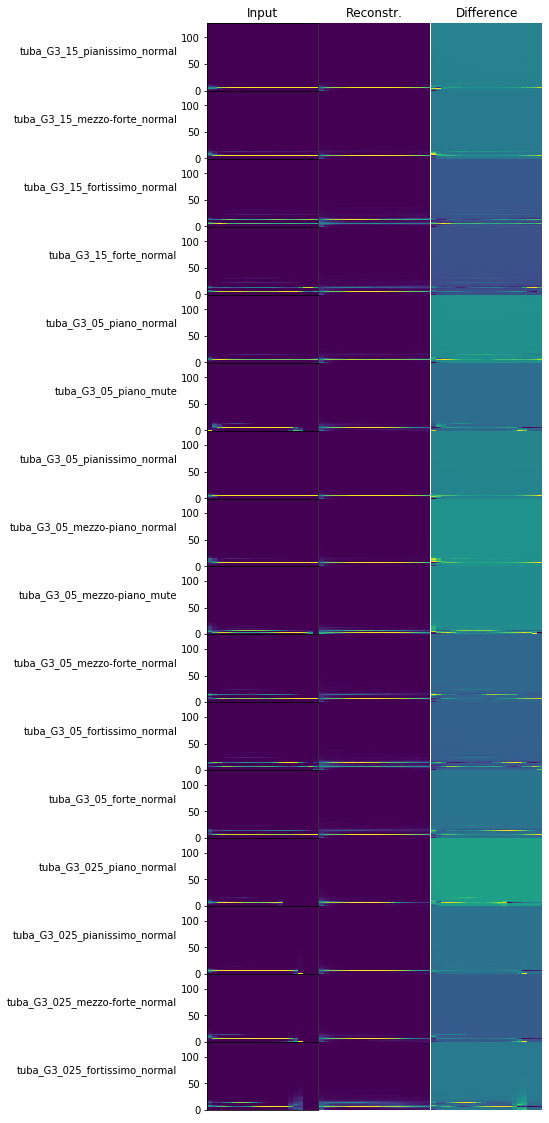

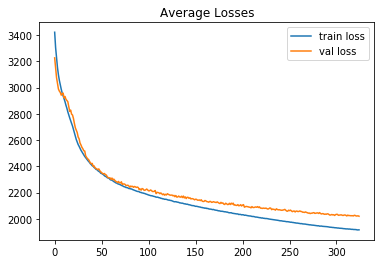

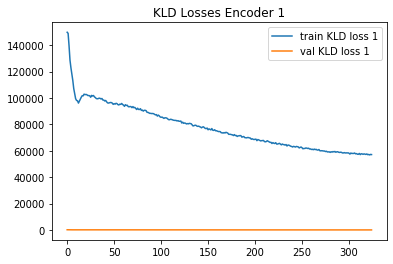

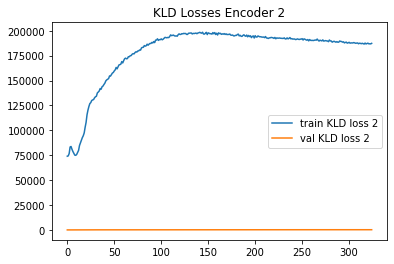

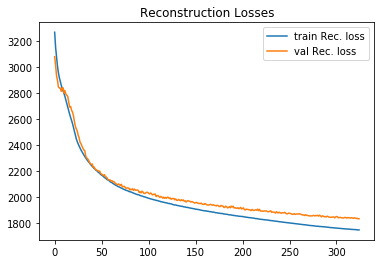

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 331


100%|██████████| 727/727 [00:09<00:00, 74.88it/s]

training_avg_loss=1913.02
 training_avg_kld1=56863.84
 training_avg_kld2=56863.84
 training_avg_rec=1745.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2017.86

Epoch: 332


100%|██████████| 727/727 [00:09<00:00, 74.14it/s]

training_avg_loss=1913.25
 training_avg_kld1=56978.80
 training_avg_kld2=56978.80
 training_avg_rec=1745.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2022.45

Epoch: 333


100%|██████████| 727/727 [00:09<00:00, 74.35it/s]

training_avg_loss=1912.10
 training_avg_kld1=56491.24
 training_avg_kld2=56491.24
 training_avg_rec=1744.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2019.79

Epoch: 334


100%|██████████| 727/727 [00:09<00:00, 73.97it/s]

training_avg_loss=1912.61
 training_avg_kld1=56685.33
 training_avg_kld2=56685.33
 training_avg_rec=1744.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2016.07

Epoch: 335


100%|██████████| 727/727 [00:09<00:00, 74.23it/s]

training_avg_loss=1912.19
 training_avg_kld1=56520.61
 training_avg_kld2=56520.61
 training_avg_rec=1745.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2020.01

Epoch: 336


100%|██████████| 727/727 [00:09<00:00, 74.24it/s]


training_avg_loss=1910.77
 training_avg_kld1=56552.14
 training_avg_kld2=56552.14
 training_avg_rec=1743.39



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2016.09

Epoch: 337


100%|██████████| 727/727 [00:09<00:00, 74.20it/s]

training_avg_loss=1910.56
 training_avg_kld1=56266.21
 training_avg_kld2=56266.21
 training_avg_rec=1743.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2016.21

Epoch: 338


100%|██████████| 727/727 [00:09<00:00, 73.86it/s]


training_avg_loss=1910.01
 training_avg_kld1=57003.38
 training_avg_kld2=57003.38
 training_avg_rec=1742.67



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2017.78

Epoch: 339


100%|██████████| 727/727 [00:09<00:00, 73.58it/s]

training_avg_loss=1909.27
 training_avg_kld1=56166.73
 training_avg_kld2=56166.73
 training_avg_rec=1742.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2018.36

Epoch: 340


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]

training_avg_loss=1908.39
 training_avg_kld1=56750.53
 training_avg_kld2=56750.53
 training_avg_rec=1741.06



val_avg_loss=2016.53



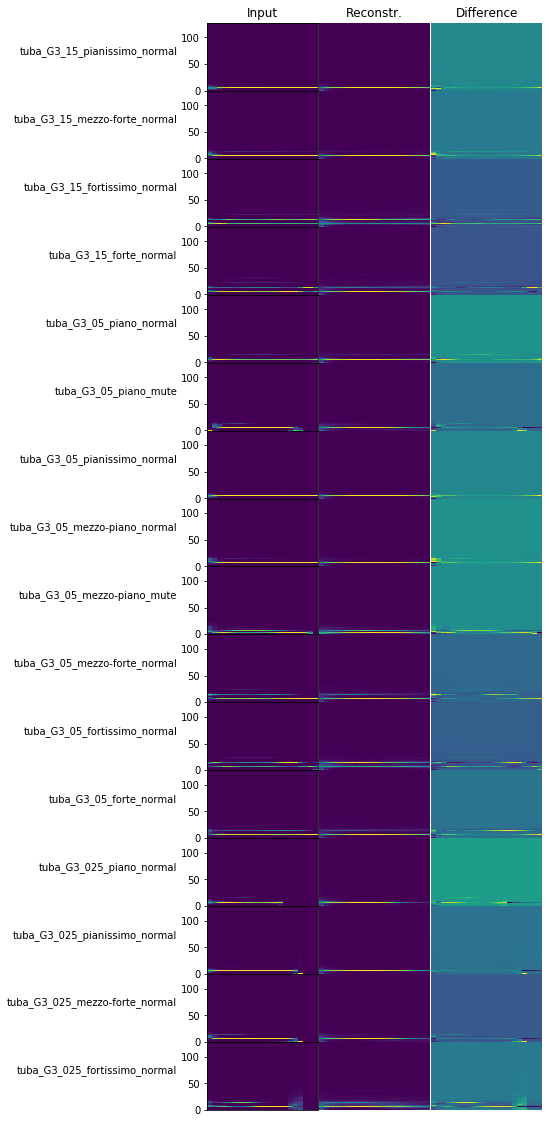

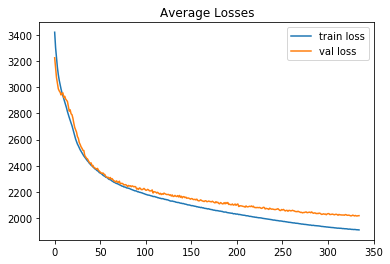

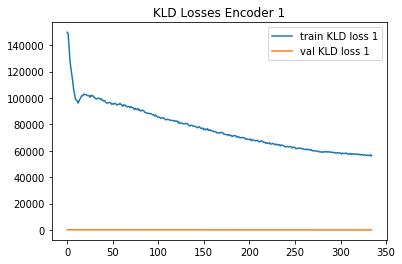

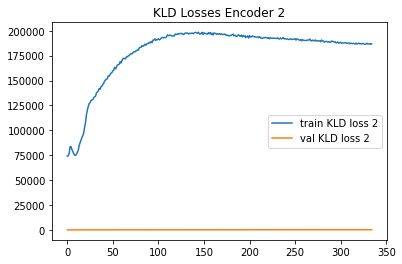

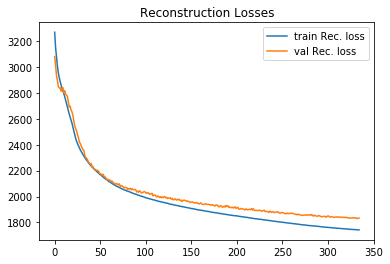

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 341


100%|██████████| 727/727 [00:09<00:00, 78.63it/s]

training_avg_loss=1908.61
 training_avg_kld1=56873.44
 training_avg_kld2=56873.44
 training_avg_rec=1741.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2015.15

Epoch: 342


100%|██████████| 727/727 [00:09<00:00, 74.40it/s]


training_avg_loss=1907.27
 training_avg_kld1=56515.50
 training_avg_kld2=56515.50
 training_avg_rec=1740.59



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2014.89

Epoch: 343


100%|██████████| 727/727 [00:09<00:00, 74.16it/s]

training_avg_loss=1906.24
 training_avg_kld1=56675.44
 training_avg_kld2=56675.44
 training_avg_rec=1739.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2017.56

Epoch: 344


100%|██████████| 727/727 [00:09<00:00, 74.09it/s]

training_avg_loss=1907.55
 training_avg_kld1=56736.27
 training_avg_kld2=56736.27
 training_avg_rec=1739.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2016.34

Epoch: 345


100%|██████████| 727/727 [00:09<00:00, 74.53it/s]

training_avg_loss=1905.10
 training_avg_kld1=56373.48
 training_avg_kld2=56373.48
 training_avg_rec=1738.19




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2019.14

Epoch: 346


100%|██████████| 727/727 [00:09<00:00, 74.05it/s]

training_avg_loss=1906.05
 training_avg_kld1=56195.85
 training_avg_kld2=56195.85
 training_avg_rec=1739.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2017.86

Epoch: 347


100%|██████████| 727/727 [00:09<00:00, 74.41it/s]

training_avg_loss=1905.08
 training_avg_kld1=56170.77
 training_avg_kld2=56170.77
 training_avg_rec=1738.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2015.15

Epoch: 348


100%|██████████| 727/727 [00:09<00:00, 74.38it/s]


training_avg_loss=1905.32
 training_avg_kld1=56237.15
 training_avg_kld2=56237.15
 training_avg_rec=1738.00



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2009.92

Epoch: 349


100%|██████████| 727/727 [00:09<00:00, 74.33it/s]


training_avg_loss=1904.06
 training_avg_kld1=56460.72
 training_avg_kld2=56460.72
 training_avg_rec=1737.59



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2011.77

Epoch: 350


100%|██████████| 727/727 [00:09<00:00, 74.54it/s]

training_avg_loss=1902.19
 training_avg_kld1=56186.33
 training_avg_kld2=56186.33
 training_avg_rec=1735.56



val_avg_loss=2014.92



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

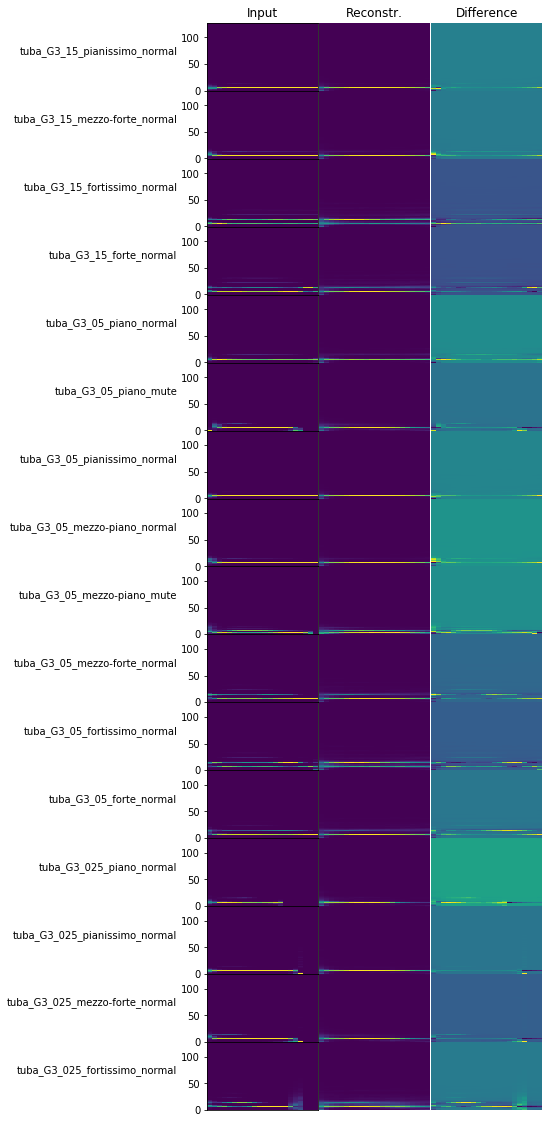

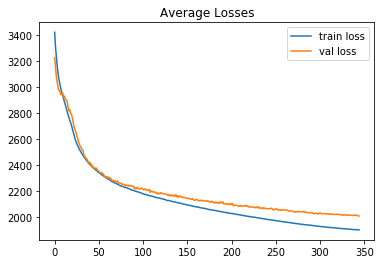

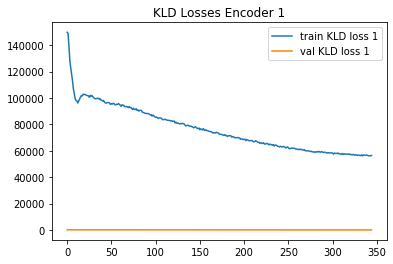

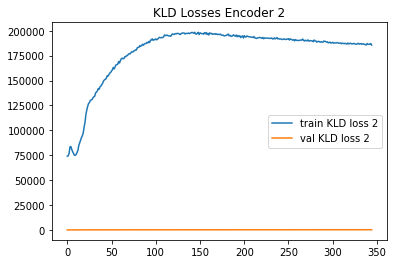

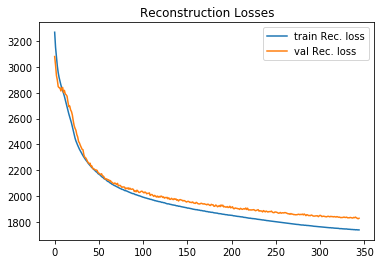

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 351


100%|██████████| 727/727 [00:09<00:00, 78.61it/s]

training_avg_loss=1902.74
 training_avg_kld1=56172.23
 training_avg_kld2=56172.23
 training_avg_rec=1735.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2012.54

Epoch: 352


100%|██████████| 727/727 [00:09<00:00, 74.10it/s]

training_avg_loss=1901.74
 training_avg_kld1=56107.34
 training_avg_kld2=56107.34
 training_avg_rec=1735.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2016.08

Epoch: 353


100%|██████████| 727/727 [00:09<00:00, 74.05it/s]

training_avg_loss=1900.85
 training_avg_kld1=56252.96
 training_avg_kld2=56252.96
 training_avg_rec=1734.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2012.70

Epoch: 354


100%|██████████| 727/727 [00:09<00:00, 74.19it/s]

training_avg_loss=1901.43
 training_avg_kld1=56032.48
 training_avg_kld2=56032.48
 training_avg_rec=1734.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2012.09

Epoch: 355


100%|██████████| 727/727 [00:09<00:00, 74.13it/s]

training_avg_loss=1900.37
 training_avg_kld1=55968.33
 training_avg_kld2=55968.33
 training_avg_rec=1734.16




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2013.93

Epoch: 356


100%|██████████| 727/727 [00:09<00:00, 73.63it/s]

training_avg_loss=1900.63
 training_avg_kld1=55912.84
 training_avg_kld2=55912.84
 training_avg_rec=1733.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2012.73

Epoch: 357


100%|██████████| 727/727 [00:09<00:00, 74.01it/s]

training_avg_loss=1899.61
 training_avg_kld1=56024.93
 training_avg_kld2=56024.93
 training_avg_rec=1733.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2017.15

Epoch: 358


100%|██████████| 727/727 [00:09<00:00, 74.10it/s]


training_avg_loss=1899.76
 training_avg_kld1=56353.35
 training_avg_kld2=56353.35
 training_avg_rec=1733.18



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2007.64

Epoch: 359


100%|██████████| 727/727 [00:09<00:00, 74.19it/s]

training_avg_loss=1898.53
 training_avg_kld1=55820.42
 training_avg_kld2=55820.42
 training_avg_rec=1732.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2009.31

Epoch: 360


100%|██████████| 727/727 [00:09<00:00, 74.14it/s]

training_avg_loss=1896.94
 training_avg_kld1=55914.85
 training_avg_kld2=55914.85
 training_avg_rec=1730.87



val_avg_loss=2013.38



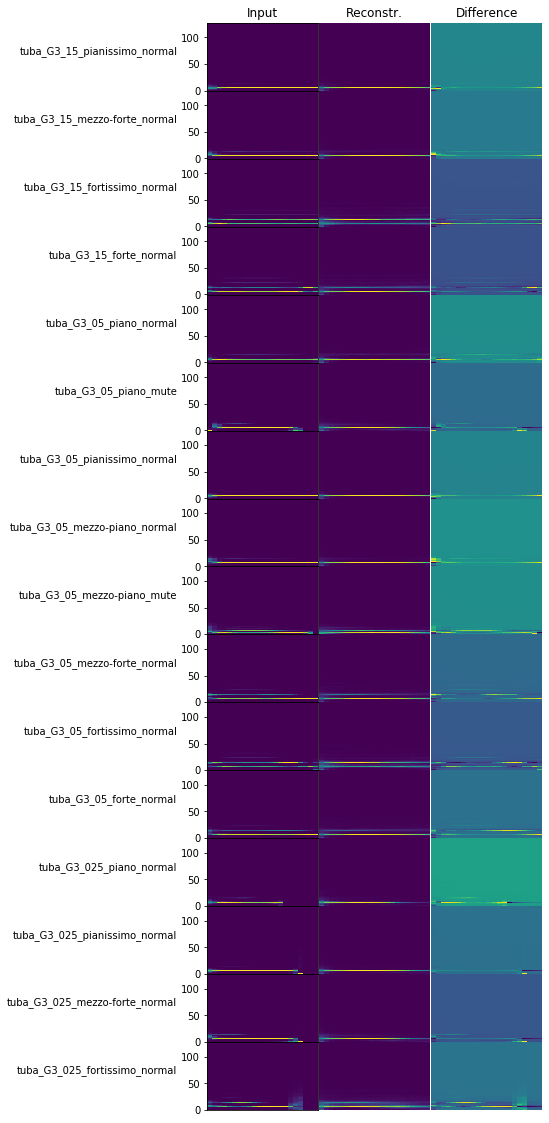

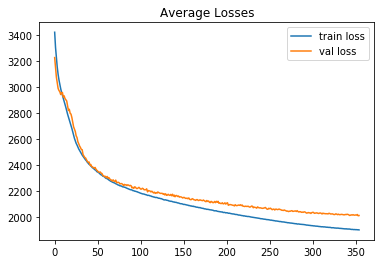

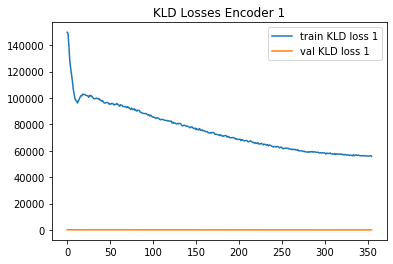

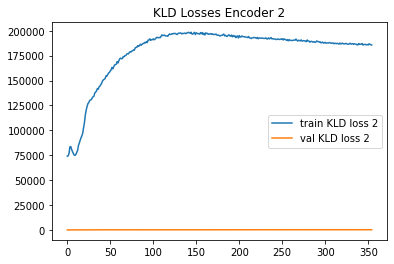

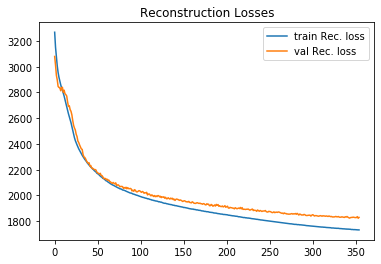

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 361


100%|██████████| 727/727 [00:09<00:00, 74.99it/s]

training_avg_loss=1897.48
 training_avg_kld1=56200.03
 training_avg_kld2=56200.03
 training_avg_rec=1731.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2010.18

Epoch: 362


100%|██████████| 727/727 [00:09<00:00, 73.90it/s]


training_avg_loss=1896.48
 training_avg_kld1=56010.54
 training_avg_kld2=56010.54
 training_avg_rec=1730.45



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2012.64

Epoch: 363


100%|██████████| 727/727 [00:09<00:00, 73.93it/s]


training_avg_loss=1896.01
 training_avg_kld1=55654.51
 training_avg_kld2=55654.51
 training_avg_rec=1729.99



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2017.80

Epoch: 364


100%|██████████| 727/727 [00:09<00:00, 74.02it/s]

training_avg_loss=1895.65
 training_avg_kld1=55907.72
 training_avg_kld2=55907.72
 training_avg_rec=1729.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2010.10

Epoch: 365


100%|██████████| 727/727 [00:09<00:00, 74.15it/s]


training_avg_loss=1895.23
 training_avg_kld1=55888.31
 training_avg_kld2=55888.31
 training_avg_rec=1728.88



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2008.06

Epoch: 366


100%|██████████| 727/727 [00:09<00:00, 73.89it/s]


training_avg_loss=1894.98
 training_avg_kld1=55537.13
 training_avg_kld2=55537.13
 training_avg_rec=1729.02



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2012.30

Epoch: 367


100%|██████████| 727/727 [00:09<00:00, 74.08it/s]

training_avg_loss=1893.69
 training_avg_kld1=55468.47
 training_avg_kld2=55468.47
 training_avg_rec=1728.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2010.45

Epoch: 368


100%|██████████| 727/727 [00:09<00:00, 74.08it/s]

training_avg_loss=1894.30
 training_avg_kld1=55876.18
 training_avg_kld2=55876.18
 training_avg_rec=1727.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2006.28

Epoch: 369


100%|██████████| 727/727 [00:09<00:00, 74.06it/s]

training_avg_loss=1893.58
 training_avg_kld1=55438.50
 training_avg_kld2=55438.50
 training_avg_rec=1727.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2008.52

Epoch: 370


100%|██████████| 727/727 [00:09<00:00, 73.90it/s]


training_avg_loss=1891.88
 training_avg_kld1=55424.04
 training_avg_kld2=55424.04
 training_avg_rec=1726.40

val_avg_loss=2006.86



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

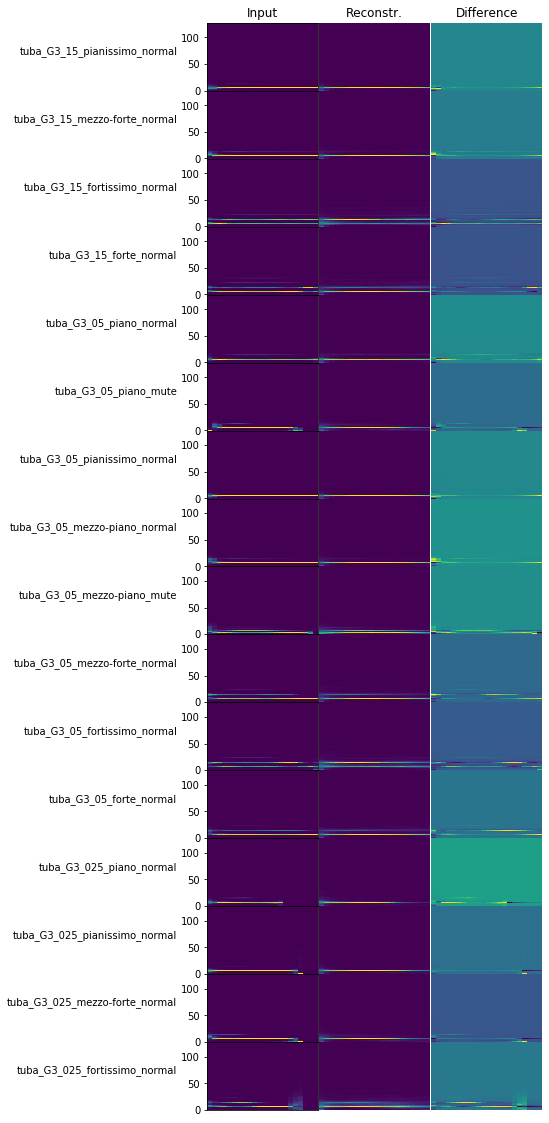

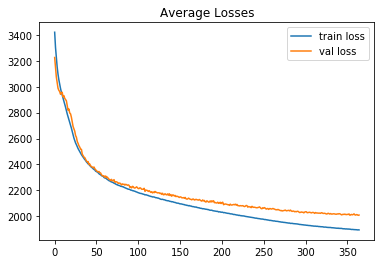

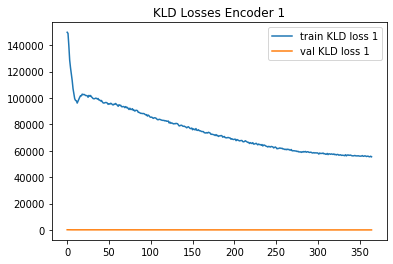

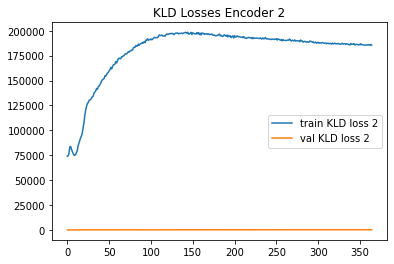

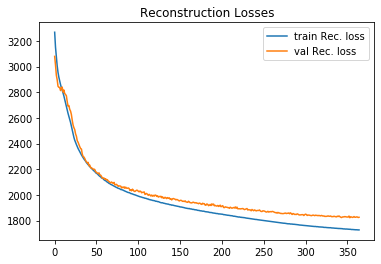

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 371


100%|██████████| 727/727 [00:09<00:00, 78.65it/s]

training_avg_loss=1892.69
 training_avg_kld1=55877.17
 training_avg_kld2=55877.17
 training_avg_rec=1726.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2006.75

Epoch: 372


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]

training_avg_loss=1891.97
 training_avg_kld1=55718.29
 training_avg_kld2=55718.29
 training_avg_rec=1725.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2008.48

Epoch: 373


100%|██████████| 727/727 [00:09<00:00, 74.38it/s]


training_avg_loss=1891.55
 training_avg_kld1=55626.13
 training_avg_kld2=55626.13
 training_avg_rec=1725.64



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2006.31

Epoch: 374


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]

training_avg_loss=1891.91
 training_avg_kld1=55602.82
 training_avg_kld2=55602.82
 training_avg_rec=1725.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2005.97

Epoch: 375


100%|██████████| 727/727 [00:09<00:00, 74.07it/s]

training_avg_loss=1890.80
 training_avg_kld1=55808.50
 training_avg_kld2=55808.50
 training_avg_rec=1724.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2004.71

Epoch: 376


100%|██████████| 727/727 [00:09<00:00, 73.82it/s]

training_avg_loss=1888.89
 training_avg_kld1=55316.66
 training_avg_kld2=55316.66
 training_avg_rec=1723.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2005.45

Epoch: 377


100%|██████████| 727/727 [00:09<00:00, 74.29it/s]

training_avg_loss=1889.62
 training_avg_kld1=55253.34
 training_avg_kld2=55253.34
 training_avg_rec=1723.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2002.49

Epoch: 378


100%|██████████| 727/727 [00:09<00:00, 74.36it/s]

training_avg_loss=1889.80
 training_avg_kld1=55492.17
 training_avg_kld2=55492.17
 training_avg_rec=1723.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2005.45

Epoch: 379


100%|██████████| 727/727 [00:09<00:00, 74.06it/s]

training_avg_loss=1888.62
 training_avg_kld1=55685.56
 training_avg_kld2=55685.56
 training_avg_rec=1722.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2006.88

Epoch: 380


100%|██████████| 727/727 [00:09<00:00, 74.37it/s]


training_avg_loss=1886.85
 training_avg_kld1=55304.01
 training_avg_kld2=55304.01
 training_avg_rec=1721.69

val_avg_loss=2008.45



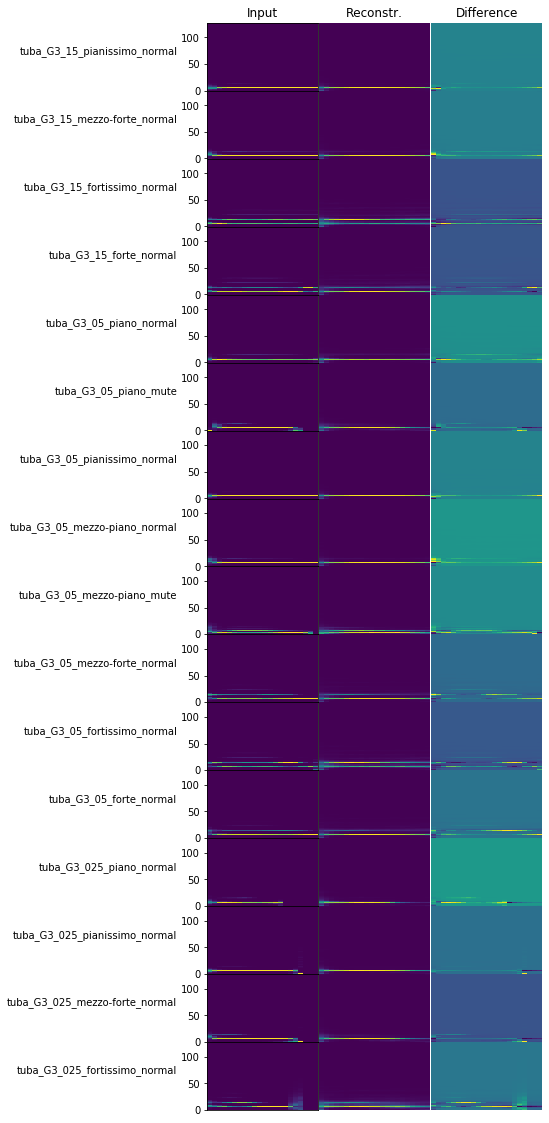

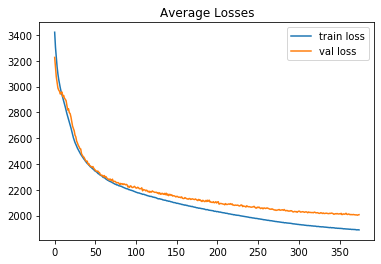

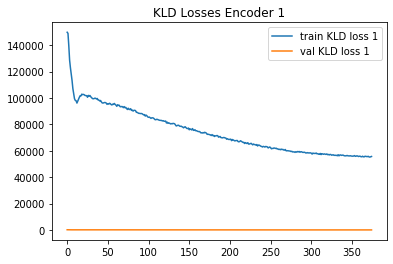

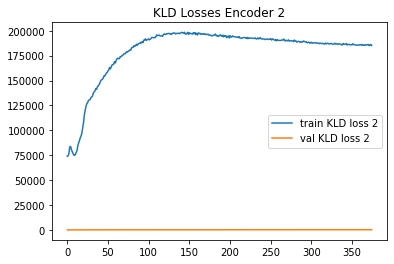

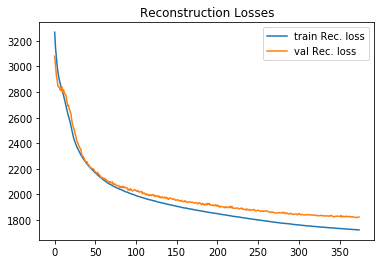

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 381


100%|██████████| 727/727 [00:09<00:00, 78.41it/s]

training_avg_loss=1887.47
 training_avg_kld1=55398.52
 training_avg_kld2=55398.52
 training_avg_rec=1721.98




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2004.64

Epoch: 382


100%|██████████| 727/727 [00:09<00:00, 73.84it/s]


training_avg_loss=1886.60
 training_avg_kld1=55341.75
 training_avg_kld2=55341.75
 training_avg_rec=1721.28



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2006.65

Epoch: 383


100%|██████████| 727/727 [00:09<00:00, 74.41it/s]


training_avg_loss=1886.66
 training_avg_kld1=55334.55
 training_avg_kld2=55334.55
 training_avg_rec=1721.08



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=1999.91

Epoch: 384


100%|██████████| 727/727 [00:09<00:00, 73.92it/s]

training_avg_loss=1886.82
 training_avg_kld1=55368.99
 training_avg_kld2=55368.99
 training_avg_rec=1721.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2007.24

Epoch: 385


100%|██████████| 727/727 [00:09<00:00, 74.02it/s]

training_avg_loss=1885.90
 training_avg_kld1=55560.50
 training_avg_kld2=55560.50
 training_avg_rec=1720.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2003.03

Epoch: 386


100%|██████████| 727/727 [00:09<00:00, 73.98it/s]

training_avg_loss=1884.34
 training_avg_kld1=55517.08
 training_avg_kld2=55517.08
 training_avg_rec=1719.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2001.28

Epoch: 387


100%|██████████| 727/727 [00:09<00:00, 74.35it/s]


training_avg_loss=1884.55
 training_avg_kld1=55578.91
 training_avg_kld2=55578.91
 training_avg_rec=1719.30



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2005.22

Epoch: 388


100%|██████████| 727/727 [00:09<00:00, 74.22it/s]

training_avg_loss=1883.93
 training_avg_kld1=54878.63
 training_avg_kld2=54878.63
 training_avg_rec=1718.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2007.72

Epoch: 389


100%|██████████| 727/727 [00:09<00:00, 74.18it/s]

training_avg_loss=1883.62
 training_avg_kld1=54915.04
 training_avg_kld2=54915.04
 training_avg_rec=1718.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2006.67

Epoch: 390


100%|██████████| 727/727 [00:09<00:00, 73.86it/s]

training_avg_loss=1883.67
 training_avg_kld1=55110.25
 training_avg_kld2=55110.25
 training_avg_rec=1718.64



val_avg_loss=2010.83



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f06594acd90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

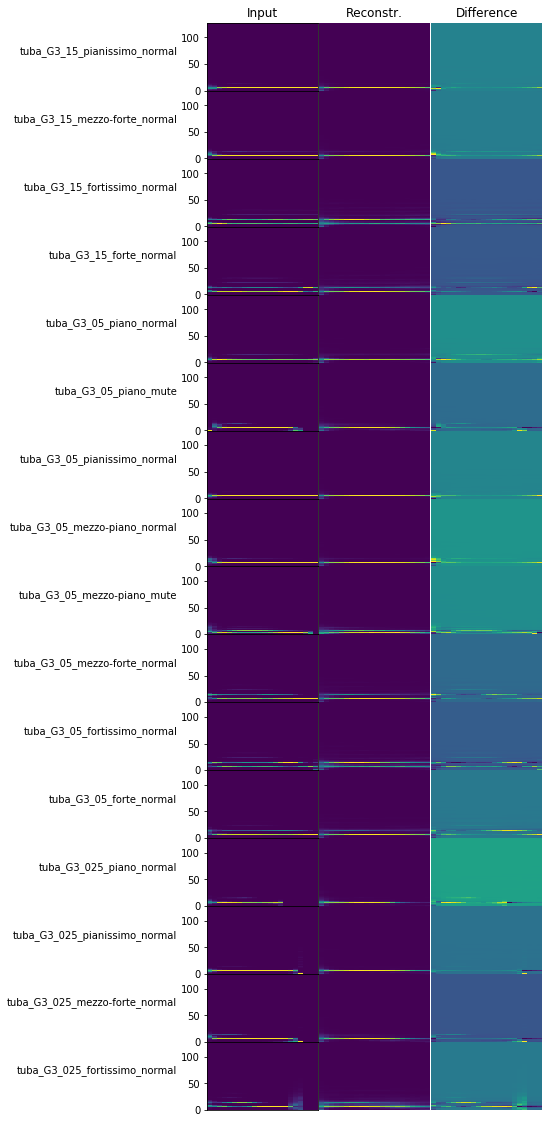

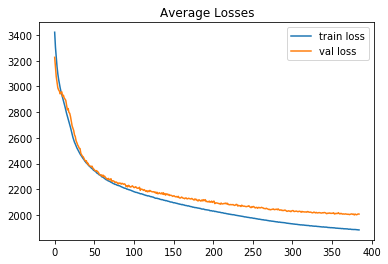

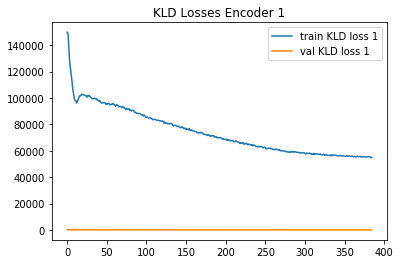

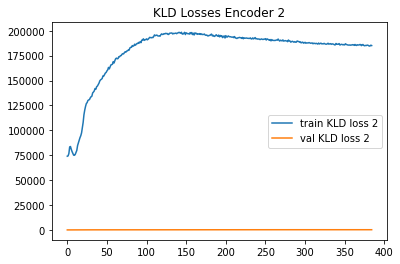

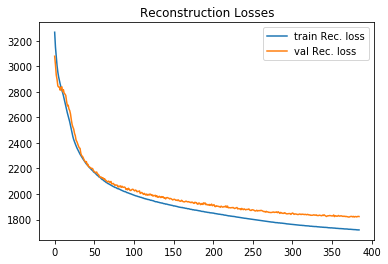

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 391


100%|██████████| 727/727 [00:09<00:00, 78.84it/s]

training_avg_loss=1882.40
 training_avg_kld1=55712.83
 training_avg_kld2=55712.83
 training_avg_rec=1717.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2005.24

Epoch: 392


100%|██████████| 727/727 [00:09<00:00, 74.14it/s]


training_avg_loss=1882.16
 training_avg_kld1=55116.21
 training_avg_kld2=55116.21
 training_avg_rec=1717.37



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2002.28

Epoch: 393


100%|██████████| 727/727 [00:09<00:00, 74.07it/s]

training_avg_loss=1882.39
 training_avg_kld1=55311.38
 training_avg_kld2=55311.38
 training_avg_rec=1717.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2003.38

Epoch: 394


100%|██████████| 727/727 [00:09<00:00, 73.68it/s]


training_avg_loss=1881.38
 training_avg_kld1=55251.88
 training_avg_kld2=55251.88
 training_avg_rec=1716.71



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2005.66

Epoch: 395


100%|██████████| 727/727 [00:09<00:00, 73.83it/s]


training_avg_loss=1880.80
 training_avg_kld1=54968.45
 training_avg_kld2=54968.45
 training_avg_rec=1715.55



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2007.44

Epoch: 396


100%|██████████| 727/727 [00:09<00:00, 74.37it/s]

training_avg_loss=1879.89
 training_avg_kld1=54705.25
 training_avg_kld2=54705.25
 training_avg_rec=1715.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2002.46

Epoch: 397


100%|██████████| 727/727 [00:09<00:00, 73.92it/s]

training_avg_loss=1879.92
 training_avg_kld1=55217.56
 training_avg_kld2=55217.56
 training_avg_rec=1715.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2005.48

Epoch: 398


100%|██████████| 727/727 [00:09<00:00, 74.31it/s]

training_avg_loss=1879.50
 training_avg_kld1=55033.78
 training_avg_kld2=55033.78
 training_avg_rec=1714.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2003.16

Epoch: 399


100%|██████████| 727/727 [00:09<00:00, 73.75it/s]


training_avg_loss=1879.25
 training_avg_kld1=55495.01
 training_avg_kld2=55495.01
 training_avg_rec=1714.32

val_avg_loss=2001.64



In [9]:
training.train_model(input='mel_cut', model_name='TimeConv2D_cut', loss_f='bce')

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>

<button type="button" class="btn btn-primary" style="float:right; background-color:#BA55D3; border:0"><a href="2-chord_prediction.ipynb" style="color:white; text-decoration: none">Go to Chord Detection ⇒</a></button>
    
</div>